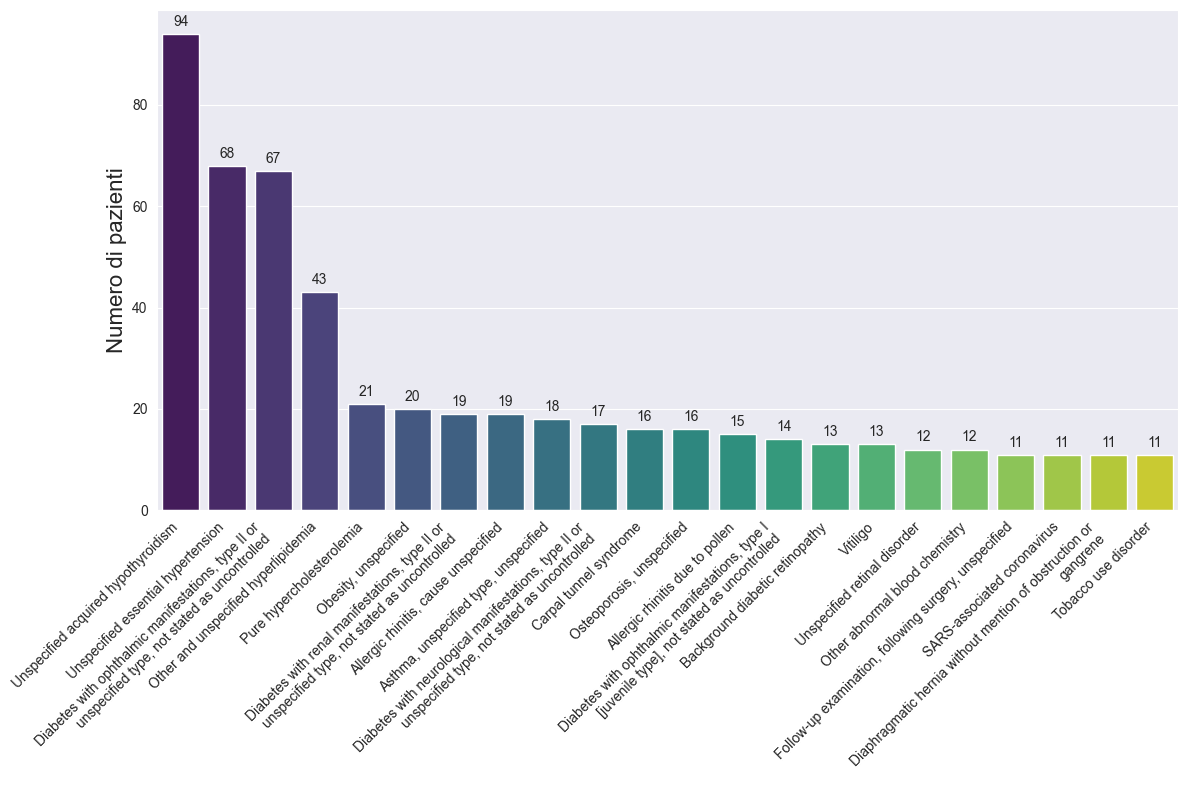

Description
Unspecified acquired hypothyroidism                                                                   94
Unspecified essential hypertension                                                                    68
Diabetes with ophthalmic manifestations, type II or unspecified type, not stated as uncontrolled      67
Other and unspecified hyperlipidemia                                                                  43
Pure hypercholesterolemia                                                                             21
Obesity, unspecified                                                                                  20
Diabetes with renal manifestations, type II or unspecified type, not stated as uncontrolled           19
Allergic rhinitis, cause unspecified                                                                  19
Asthma, unspecified type, unspecified                                                                 18
Diabetes with neurological manifestations, 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#CREAZIONE GRAFICO SULLE PRIME 22 DIAGNOSI CON PIU PAZIENTI AFFETTI
############################################################################################
# Raggruppa per la colonna 'Description' e conta il numero di pazienti in ogni gruppo
df = pd.read_csv("Excel/Diagnostics.csv")
grouped = df.groupby('Description').size()

# Ordina i dati in ordine decrescente
top_22_descriptions = grouped.sort_values(ascending=False).head(22)

fig, ax = plt.subplots(figsize=(12,8))

# disegna il barplot
sns.barplot(
    x=top_22_descriptions.index,
    y=top_22_descriptions.values,
    hue=top_22_descriptions.index,
    palette="viridis",
    legend=False,
    ax=ax
)



# prendi le etichette originali, applica wrapping ogni 15 caratteri
wrapped = top_22_descriptions.index.to_series().str.wrap(55)

# impostale sull'asse x, con rotazione
ax.set_xticks(range(len(wrapped)))
ax.set_xticklabels(wrapped, rotation=45, ha='right')
ax.set_ylabel('Numero di pazienti', fontsize=16)
ax.set_xlabel('')  # niente label orizzontale

# Etichette numeriche
for i, v in enumerate(top_22_descriptions.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()

print(top_22_descriptions)
############################################################################################

In [ ]:
#MERGE DELLE TABELLE Diagnostics.csv E Biochemical_parameters.csv E STAMPA DELLE STATISTICHE E
#DEI PAZIENTI CHE HANNO UNO SPECIFICA COMPLICAZIONE, IN QUESTO CASO: "Other and unspecified hyperlipidemia"
############################################################################################
diagnostics_df = pd.read_csv("Excel/Diagnostics.csv")
biochemical_df = pd.read_csv("Excel/Biochemical_parameters.csv")
# pivot dei parametri
bio_wide = biochemical_df.pivot_table(
    index="Patient_ID",
    columns="Name",
    values="Value",
    aggfunc="mean"
).reset_index()

# merge wide
merged_wide = pd.merge(
    diagnostics_df,
    bio_wide,
    on="Patient_ID",
    how="left"
)

#PRINT STATISTICHE
# print()
# print('numero di righe e colonne')
# print(merged_wide.shape)
# print()
# print('tipi e missing')
# print(merged_wide.info())
# print()
# print('statistiche numeriche di base')
# print(merged_wide.describe()) #viene eseguito solo sulle colonne numeriche es:int64
# print()


# filtri solo le righe con Description == 'Other and unspecified hyperlipidemia'
subset = merged_wide[ merged_wide['Description'] == 'Other and unspecified hyperlipidemia' ]


#PRINT DI QUANTI VALORI NULLI HA OGNI COLONNA DELLA TABELLA
print("VALORI NULLI")
nan_mask = subset.isna()
nan_count = nan_mask.sum()
print(nan_count)



#PRINT LISTA PAZIENTI CON QUESTA COMPLICAZIONE (Other and unspecified hyperlipidemia)
from IPython.display import display
display(subset)

############################################################################################

In [ ]:
#GRAFICI DI SESSO E ETA DEI PAZIENTI AFFETTI DA UNA CERTA COMPLICANZA, IN QUESTO CASO LA COMPLICANZA CON CODICE 272.4, OVVERO "Other and unspecified hyperlipidemia"
############################################################################################
diagnostics_df = pd.read_csv("Excel/Diagnostics.csv")
patient_df = pd.read_csv("Excel/Patient_info.csv")

#Merge dei dataset su Patient_ID
merged = pd.merge(
    diagnostics_df,
    patient_df,
    on="Patient_ID",
    how="left"
)

# STAMPA DEI CODICI CHE HANNO COME DESCRIZIONE DELLA PATOLOGIA "Other and unspecified hyperlipidemia"
# df_hp = merged[merged["Description"] == "Other and unspecified hyperlipidemia"].copy()
#
# print(df_hp["Code"].tolist())
# print("Codici unici:", df_hp["Code"].unique())
# print(df_hp[["Patient_ID","Code"]])


df_hp = merged[merged["Code"] == "272.4"].copy()

#calcola l'età (anno corrente 2025)
df_hp["Età"] = 2025 - df_hp["Birth_year"]

#Grafico distribuzione del sesso

light_blue = "#ADD8E6"   # “lightblue”
light_red  = "#FFB6C1"   # “lightpink”

# Conta e ordina (per sicurezza) i due valori
counts = df_hp["Sex"].value_counts()

# Definisci un dizionario di colori
color_map = {"M": light_blue, "F": light_red}
colors = [color_map[label] for label in counts.index]

# Pie‐chart con colori personalizzati
plt.figure(figsize=(6,6))
counts.plot.pie(
    colors=colors,
    autopct="%1.1f%%",
    startangle=90,
    legend=False
)
plt.ylabel("")
plt.title("")
plt.axis("equal")
plt.tight_layout()
plt.show()

#Grafico distribuzione dell'età
plt.figure(figsize=(8,5))
sns.kdeplot(
    data=df_hp,
    x="Età",
    fill=True,        # area sotto la curva colorata
    alpha=0.4,        # trasparenza
    linewidth=2
)
plt.title("")
plt.xlabel("Età")
plt.ylabel("Densità stimata")
plt.tight_layout()
plt.show()

#Istogramma con numero di pazienti per etá
plt.figure(figsize=(8,5))
sns.histplot(
    data=df_hp,
    x="Età",
    bins=10,          # numero di barre (regola a piacere)
    stat="count",     # indica di mostrare conteggi anziché densità
    discrete=False    # False di default: barre continue
)
plt.xlabel("Età")
plt.ylabel("Numero di pazienti")
plt.tight_layout()
plt.show()
############################################################################################

In [ ]:
import numpy as np

#GRAFICO CHE MOSTRA LA DISTRIBUZIONE DI COMPLICANZE, SESSO ED ETA SU TUTTI I PAZIENTI
############################################################################################
# 1) Caricamento
diagnostics_df = pd.read_csv("Excel/Diagnostics.csv")
patient_df     = pd.read_csv("Excel/Patient_info.csv")

# 2) Costruisci il flag "has complication" ONE‑ROW‑PER‑PATIENT
diagnostics_df["Has_complication"] = diagnostics_df["Description"].notna()
complication_flag = (
    diagnostics_df
    .groupby("Patient_ID")["Has_complication"]
    .any()
    .reset_index()
)

# 3) Merge: UNA riga per paziente
merged = pd.merge(
    patient_df,
    complication_flag,
    on="Patient_ID",
    how="left"
)
# i pazienti senza diagnosi avranno NaN → False
merged["Has_complication"] = (
    merged["Has_complication"]
      .astype("boolean")      # diventa BooleanDtype (nullable)
      .fillna(False)          # i NaN diventano False, senza warning
)
merged["Complicanza"] = merged["Has_complication"].map({True:"Sì", False:"No"})

# verifica
assert len(merged) == 736, f"Righe in merged = {len(merged)} (attesi 736)"

# 4) Calcola età e fasce
merged["Eta"] = 2025 - merged["Birth_year"]
bins   = [0,20,30,40,50,60,70,80,90,120]
labels = ['0-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91+']
merged["Eta_bin"] = pd.cut(merged["Eta"], bins=bins, labels=labels, right=True)

# 5) Tabella di contingenza
table = (
    merged
    .groupby(["Eta_bin","Sex","Complicanza"], observed=True)
    .size()
    .unstack(fill_value=0)
)

# 6) Estrai M e F e reindicizza tutte le fasce
table_M = table.xs("M", level="Sex").reindex(labels, fill_value=0)
table_F = table.xs("F", level="Sex").reindex(labels, fill_value=0)

# 7) Prepara i vettori per il plot
x      = np.arange(len(labels))
width  = 0.35
no_M   = table_M["No"];   yes_M = table_M["Sì"]
no_F   = table_F["No"];   yes_F = table_F["Sì"]

colors = {
    'M_no':  '#ADD8E6',  # lightblue
    'M_yes': '#4682B4',  # steelblue
    'F_no':  '#FFB6C1',  # lightpink
    'F_yes': '#FF69B4',  # hotpink
}

# 8) Disegna il bar‑chart impilato
fig, ax = plt.subplots(figsize=(10,6))

bars_M_no  = ax.bar(x - width/2, no_M,  width, label='Maschi senza complicanze', color=colors['M_no'])
bars_M_yes = ax.bar(x - width/2, yes_M, width, bottom=no_M, label='Maschi con complicanze',    color=colors['M_yes'])
bars_F_no  = ax.bar(x + width/2, no_F,  width, label='Femmine senza complicanze', color=colors['F_no'])
bars_F_yes = ax.bar(x + width/2, yes_F, width, bottom=no_F, label='Femmine con complicanze',    color=colors['F_yes'])

# 9) Annotazioni dei valori dentro le barre
def annotate_bars(bars):
    for bar in bars:
        h = bar.get_height()
        if h>0:
            ax.annotate(f'{int(h)}',
                        xy=(bar.get_x()+bar.get_width()/2, bar.get_y()+h/2),
                        ha='center', va='center', fontsize=8)

for grp in (bars_M_no, bars_M_yes, bars_F_no, bars_F_yes):
    annotate_bars(grp)

# 10) Etichette e stile
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel("Fascia d'età")
ax.set_ylabel("Numero pazienti")
ax.legend(title="Legenda")

plt.tight_layout()
plt.show()
############################################################################################

    Patient_ID       %TIR
0    LIB193263  52.567473
1    LIB193264  62.474335
2    LIB193265  64.462384
3    LIB193266  68.606712
4    LIB193267  52.204465
..         ...        ...
731  LIB194162  64.291268
732  LIB194163  66.662912
733  LIB194164  65.681234
734  LIB194165  48.547961
735  LIB194166  85.637660

[736 rows x 2 columns]


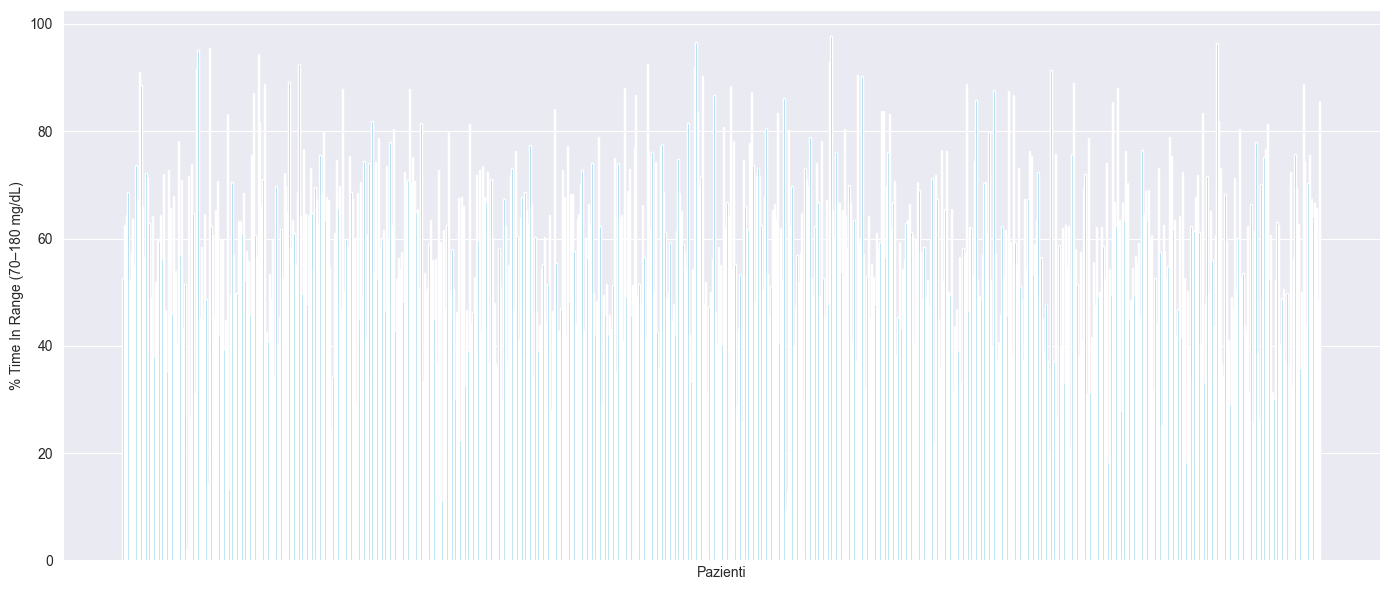

count    736.000000
mean      58.506127
std       15.705978
min        2.175836
25%       48.233346
50%       59.478182
75%       69.117657
max       97.715121
Name: %TIR, dtype: float64


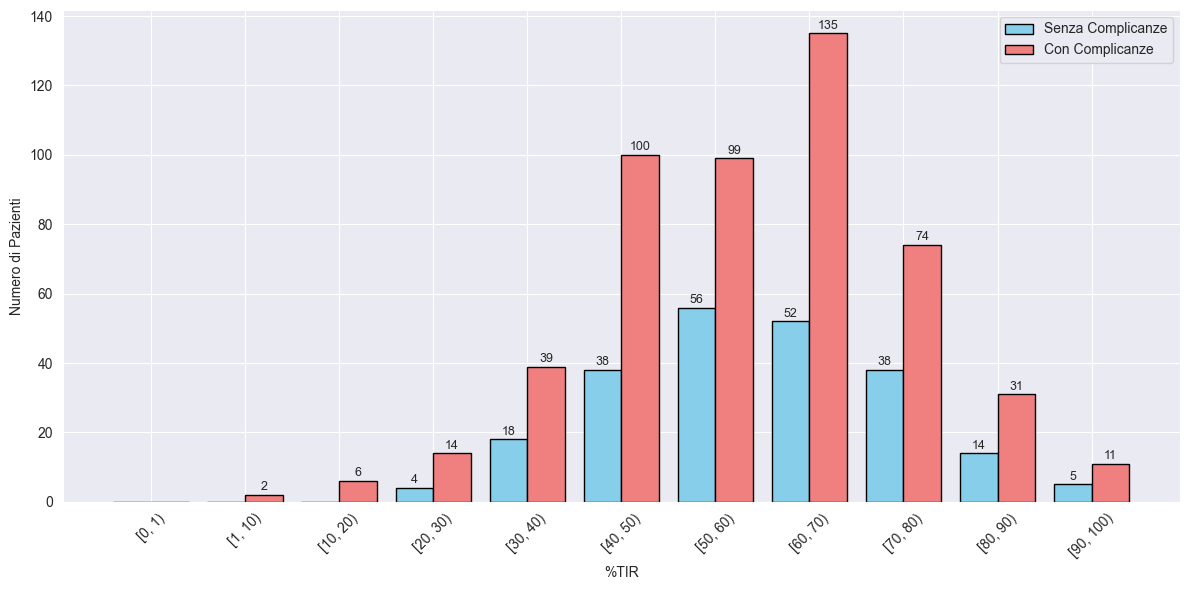

U-statistic = 59501.00
p-value      = 0.4487

Statistiche per il gruppo 'Senza Complicanze':
 - Media:   59.39
 - Mediana: 59.28
 - IQR:     20.63 (Q3: 70.16, Q1: 49.53)

Statistiche per il gruppo 'Con Complicanze':
 - Media:   58.12
 - Mediana: 59.50
 - IQR:     21.46 (Q3: 68.75, Q1: 47.29)
Media: 58.51
Mediana: 59.48
Asimmetria (skewness): -0.18
Curtosi (kurtosis): 0.07
Numero di outlier: 6
Moda: [62.0]
Q1:  48.23
Q3:  69.12
IQR: 20.88


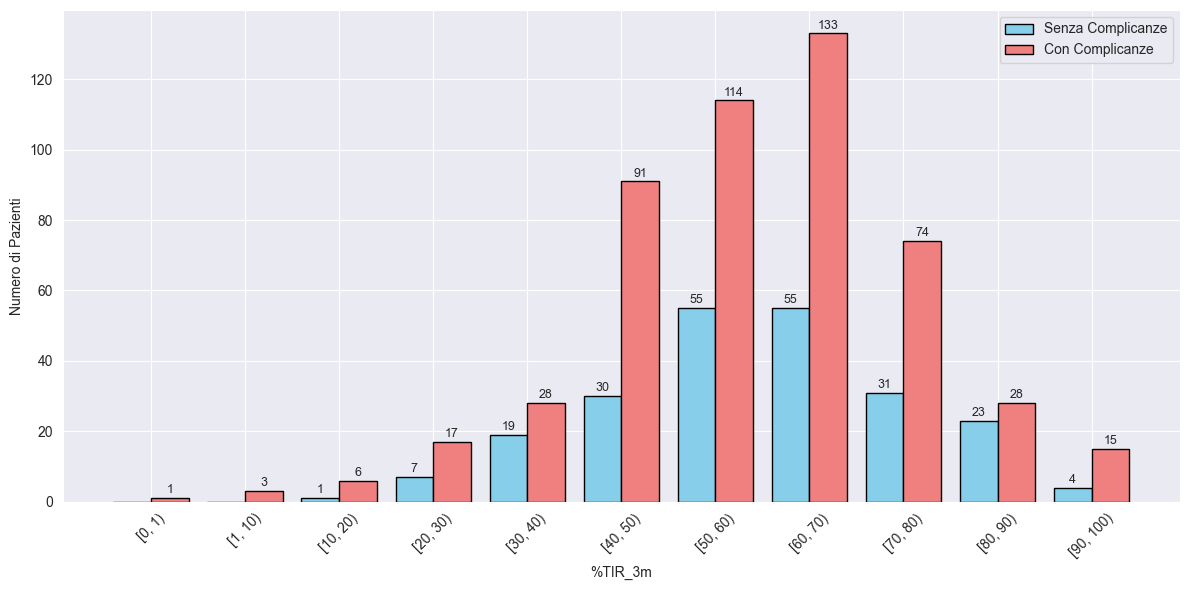

count    736.000000
mean      59.078697
std       16.275946
min        0.000000
25%       49.054784
50%       59.905338
75%       69.517486
max      100.000000
Name: %TIR_3m, dtype: float64


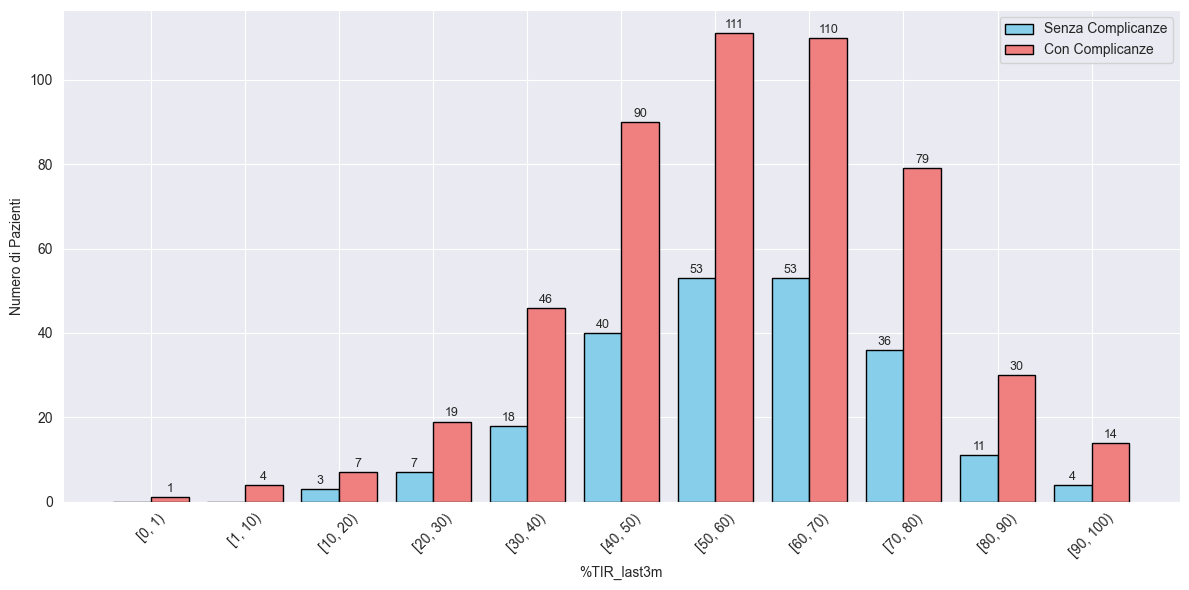

count    736.000000
mean      57.445243
std       16.941921
min        0.706215
25%       46.160972
50%       57.727208
75%       69.060569
max       97.514764
Name: %TIR_last3m, dtype: float64


In [3]:
from scipy.stats import mannwhitneyu
from scipy.stats import skew, kurtosis
import pandas as pd
import matplotlib.pyplot as plt

# ANALISI TIR
############################################################################################
# ------------------------------------------------------------------------------------------------
# 1) CARICAMENTO DEI DATI
# ------------------------------------------------------------------------------------------------
df = pd.read_csv("Excel/Glucose_measurements.csv")
diagnostics = pd.read_csv("Excel/Diagnostics.csv")

# ------------------------------------------------------------------------------------------------
# 2) FUNZIONE PER CALCOLARE IL TIR DI UN PAZIENTE
#    Prende in ingresso il DataFrame delle misurazioni di un singolo paziente
# ------------------------------------------------------------------------------------------------
def calculate_tir(misurazioni):
    totale = len(misurazioni)  # numero totale di misurazioni
    righe_valide = misurazioni[
        (misurazioni['Measurement'] >= 70) &
        (misurazioni['Measurement'] <= 180)
    ]  # seleziona le misurazioni in range 70-180 mg/dL
    tir = len(righe_valide) / totale * 100  # percentuale Time In Range
    return tir

# ------------------------------------------------------------------------------------------------
# 3) CALCOLO TIR COMPLESSIVO PER OGNI PAZIENTE
#    Uso include_groups=False per evitare il DeprecationWarning
# ------------------------------------------------------------------------------------------------
pazienti = df.groupby('Patient_ID')
tir_by_paziente = pazienti.apply(
    calculate_tir,
    include_groups=False              # evita warning su grouping columns
).reset_index(name='%TIR')

# Stampa del DataFrame %TIR
print(tir_by_paziente)

# ------------------------------------------------------------------------------------------------
# 4) GRAFICO BAR PLOT PER %TIR DI OGNI PAZIENTE
# ------------------------------------------------------------------------------------------------
plt.figure(figsize=(14, 6))
plt.bar(tir_by_paziente['Patient_ID'], tir_by_paziente['%TIR'], color='skyblue')
plt.xticks([])  # nasconde le etichette X per chiarezza
plt.ylabel('% Time In Range (70–180 mg/dL)')
plt.xlabel('Pazienti')
plt.tight_layout()
plt.show()

# Statistiche descrittive di %TIR
print(tir_by_paziente['%TIR'].describe())

# ------------------------------------------------------------------------------------------------
# 5) RAGGRUPPAMENTO IN INTERVALLI E CONTEGGIO PAZIENTI
#    Uso observed=False per evitare il FutureWarning
# ------------------------------------------------------------------------------------------------
bins = [0, 1] + list(range(10, 110, 10))
tir_by_paziente['Interval'] = pd.cut(
    tir_by_paziente['%TIR'],
    bins=bins,
    right=False
)

# Flag per presenza di diagnosi
pazienti_con_diagnosi = set(diagnostics['Patient_ID'])
tir_by_paziente['Has_Diagnosis'] = tir_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)

# Conteggio per ciascun intervallo e condizione
conta_per_interval = (
    tir_by_paziente
      .groupby(
          ['Interval', 'Has_Diagnosis'],
          observed=False              # evita warning su observed default
      )
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

# ------------------------------------------------------------------------------------------------
# 6) ISTOGRAMMA A BARRE AFFIANCATE PER INTERVALLO
# ------------------------------------------------------------------------------------------------
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = list(range(len(conta_per_interval)))

bar1 = plt.bar(
    [i - bar_width/2 for i in index],
    conta_per_interval[False],
    width=bar_width,
    label='Senza Complicanze',
    color='skyblue',
    edgecolor='black'
)
bar2 = plt.bar(
    [i + bar_width/2 for i in index],
    conta_per_interval[True],
    width=bar_width,
    label='Con Complicanze',
    color='lightcoral',
    edgecolor='black'
)

# Aggiunta etichette numeriche sopra le barre
for bars in (bar1, bar2):
    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(
                bar.get_x() + bar.get_width()/2,
                h + 0.5,
                str(int(h)),
                ha='center', va='bottom', fontsize=9
            )

plt.xticks(index, [str(i) for i in conta_per_interval.index], rotation=45)
plt.xlabel('%TIR')
plt.ylabel('Numero di Pazienti')
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------------------------
# 7) TEST STATISTICO MANN–WHITNEY U
# ------------------------------------------------------------------------------------------------
g0 = tir_by_paziente.loc[~tir_by_paziente['Has_Diagnosis'], '%TIR']
g1 = tir_by_paziente.loc[ tir_by_paziente['Has_Diagnosis'], '%TIR']
u_stat, p_value = mannwhitneyu(g0, g1, alternative='two-sided')
print(f"U-statistic = {u_stat:.2f}")
print(f"p-value      = {p_value:.4f}")

# STATISTICHE PER GRUPPO
for nome_gruppo, gruppo in zip(["Senza Complicanze", "Con Complicanze"], [g0, g1]):
    media   = gruppo.mean()
    mediana = gruppo.median()
    q1      = gruppo.quantile(0.25)
    q3      = gruppo.quantile(0.75)
    iqr     = q3 - q1

    print(f"\nStatistiche per il gruppo '{nome_gruppo}':")
    print(f" - Media:   {media:.2f}")
    print(f" - Mediana: {mediana:.2f}")
    print(f" - IQR:     {iqr:.2f} (Q3: {q3:.2f}, Q1: {q1:.2f})")

# ------------------------------------------------------------------------------------------------
# 8) STATISTICHE AGGIUNTIVE: MEDIA, MEDIANA, ASIMMETRIA, CURTOSI, OUTLIER, MODA
# ------------------------------------------------------------------------------------------------
tir_values = tir_by_paziente['%TIR']
media    = tir_values.mean()
mediana  = tir_values.median()
asim     = skew(tir_values)
curto    = kurtosis(tir_values)
moda     = tir_values.round().mode()
q1, q3   = tir_values.quantile([0.25, 0.75])
iqr      = q3 - q1
outliers = tir_values[
    (tir_values < q1 - 1.5 * iqr) |
    (tir_values > q3 + 1.5 * iqr)
]

print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Asimmetria (skewness): {asim:.2f}")
print(f"Curtosi (kurtosis): {curto:.2f}")
print(f"Numero di outlier: {len(outliers)}")
print("Moda:", moda.tolist())

q1_total, q3_total = tir_values.quantile([0.25, 0.75])
iqr_total = q3_total - q1_total
print(f"Q1:  {q1_total:.2f}")
print(f"Q3:  {q3_total:.2f}")
print(f"IQR: {iqr_total:.2f}")

# ------------------------------------------------------------------------------------------------
# 9) CALCOLO TIR SUI PRIMI 3 MESI
# ------------------------------------------------------------------------------------------------
df['Measurement_date'] = pd.to_datetime(df['Measurement_date']) # trasforma la colonna Measurement_date del glucosio in oggetti datetime
first_dates = df.groupby('Patient_ID')['Measurement_date'].min().rename('FirstDate')    # per ogni paziente calcola la data della prima misurazione
df = df.join(first_dates, on='Patient_ID')  # aggiunge al dataset di partenza la colonna che indica la prima data di misurazione del glucosio

df_3m = df[df['Measurement_date'] <= df['FirstDate'] + pd.DateOffset(months=3)] #crea un sotto-dataset che cotiene solo le righe in cui la data di misurazione é ≤ (prima data + 3 mesi)
pazienti_3m = df_3m.groupby('Patient_ID')   # ragruppa il risultato per paziente
tir3m_by_paziente = pazienti_3m.apply(      # sul dataset ottenuto che contiene solo i primi 3 mesi di misurazioni per paziente calcola il TIR e lo aggiunge come colonna
    calculate_tir,
    include_groups=False              # evita warning anche qui
).reset_index(name='%TIR_3m')

# Al dataset aggiunge anche il campo Has_Diagnosis che indica se il paziente ha o meno una complicanza
tir3m_by_paziente['Has_Diagnosis'] = tir3m_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)
tir3m_by_paziente['Interval'] = pd.cut(     # raggruppa i valori di TIR in intervalli da 10
    tir3m_by_paziente['%TIR_3m'],
    bins=bins,
    right=False
)


conta_per_interval_3m = (
    tir3m_by_paziente
      .groupby(
          ['Interval', 'Has_Diagnosis'],
          observed=False              # evita FutureWarning anche qui
      )
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

# Istogramma primi 3 mesi
plt.figure(figsize=(12, 6))
bar_width = 0.4
index_3m = list(range(len(conta_per_interval_3m)))

bar1_3m = plt.bar(
    [i - bar_width/2 for i in index_3m],
    conta_per_interval_3m[False],
    width=bar_width,
    label='Senza Complicanze', edgecolor='black', color='skyblue',
)
bar2_3m = plt.bar(
    [i + bar_width/2 for i in index_3m],
    conta_per_interval_3m[True],
    width=bar_width,
    label='Con Complicanze', edgecolor='black', color='lightcoral',
)
for bars in (bar1_3m, bar2_3m):
    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(bar.get_x() + bar.get_width()/2, h + 0.5,
                     str(int(h)), ha='center', va='bottom', fontsize=9)

plt.xticks(index_3m, [str(i) for i in conta_per_interval_3m.index], rotation=45)
plt.xlabel('%TIR_3m')
plt.ylabel('Numero di Pazienti')
plt.legend()
plt.tight_layout()
plt.show()

# Statistiche descrittive %TIR_3m
print(tir3m_by_paziente['%TIR_3m'].describe())


# ------------------------------------------------------------------------------------------------
# 10) CALCOLO TIR SUGLI ULTIMI 3 MESI
# ------------------------------------------------------------------------------------------------
df['Measurement_date'] = pd.to_datetime(df['Measurement_date'])  # datetime
# Calcolo per ogni paziente la data dell'ultima misurazione
last_dates = df.groupby('Patient_ID')['Measurement_date'].max().rename('LastDate')
# Aggiungo la colonna LastDate al dataset
df = df.join(last_dates, on='Patient_ID')

# Filtro alle righe in cui la data di misurazione è ≥ (ultima data - 3 mesi)
df_last3m = df[df['Measurement_date'] >= df['LastDate'] - pd.DateOffset(months=3)]
# Raggruppo per paziente
pazienti_last3m = df_last3m.groupby('Patient_ID')

# Calcolo %TIR sugli ultimi 3 mesi per ciascun paziente
tir_last3m_by_paziente = pazienti_last3m.apply(
    calculate_tir,
    include_groups=False
).reset_index(name='%TIR_last3m')

# Aggiungo flag complicanze e fasce di %TIR
tir_last3m_by_paziente['Has_Diagnosis'] = tir_last3m_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)
tir_last3m_by_paziente['Interval'] = pd.cut(
    tir_last3m_by_paziente['%TIR_last3m'],
    bins=bins,
    right=False
)

# Conteggio per intervallo e condizione
conta_per_interval_last3m = (
    tir_last3m_by_paziente
      .groupby(['Interval', 'Has_Diagnosis'], observed=False)
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

# Istogramma ultimi 3 mesi
plt.figure(figsize=(12, 6))
bar_width = 0.4
index_l3m = range(len(conta_per_interval_last3m))

bar1_l3m = plt.bar(
    [i - bar_width/2 for i in index_l3m],
    conta_per_interval_last3m[False],
    width=bar_width,
    label='Senza Complicanze', edgecolor='black', color='skyblue'
)
bar2_l3m = plt.bar(
    [i + bar_width/2 for i in index_l3m],
    conta_per_interval_last3m[True],
    width=bar_width,
    label='Con Complicanze', edgecolor='black', color='lightcoral'
)
for bars in (bar1_l3m, bar2_l3m):
    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(
                bar.get_x() + bar.get_width()/2,
                h + 0.5,
                str(int(h)),
                ha='center', va='bottom', fontsize=9
            )

plt.xticks(index_l3m, [str(i) for i in conta_per_interval_last3m.index], rotation=45)
plt.xlabel('%TIR_last3m')
plt.ylabel('Numero di Pazienti')
plt.legend()
plt.tight_layout()
plt.show()

# Statistiche descrittive %TIR_last3m
print(tir_last3m_by_paziente['%TIR_last3m'].describe())

############################################################################################

    Patient_ID       %TAR
0    LIB193263  45.490699
1    LIB193264  29.491918
2    LIB193265  19.872896
3    LIB193266  29.690099
4    LIB193267  46.202771
..         ...        ...
731  LIB194162  28.151914
732  LIB194163  28.437060
733  LIB194164  29.928021
734  LIB194165  46.951347
735  LIB194166  11.986096

[736 rows x 2 columns]


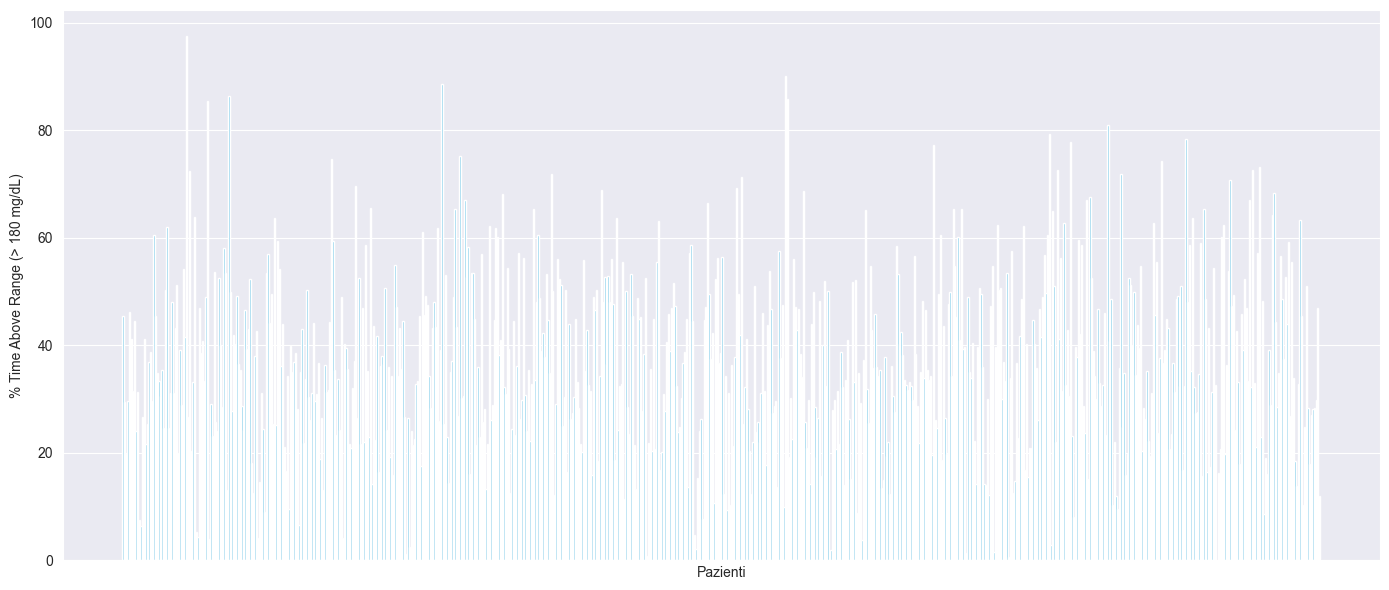

count    736.000000
mean      37.074497
std       16.546869
min        0.000000
25%       25.397180
50%       35.578774
75%       48.197259
max       97.541129
Name: %TAR, dtype: float64


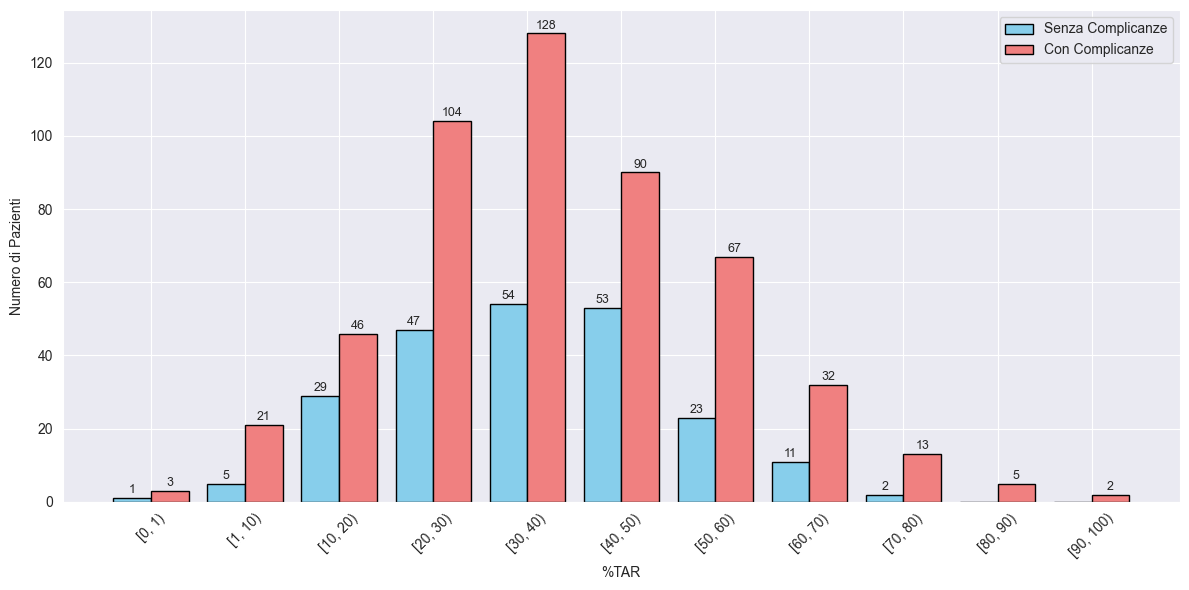

Q1 = 25.40%, Q3 = 48.20%, IQR = 22.80%
Soglia inferiore = -8.80%, soglia superiore = 82.40%
Valori TAR considerati outlier:
[85.43413912185495, 85.87212911235258, 86.37653736991486, 88.58062025479346, 90.10088272383354, 97.54112860428091]
Media: 37.07
Mediana: 35.58
Asimmetria (skewness): 0.33
Curtosi (kurtosis): 0.09
Numero di outlier: 6
Moda: [33.0, 34.0]
U-statistic = 54737.00
p-value      = 0.3007

Statistiche per il gruppo 'Senza Complicanze':
 - Media:   35.90
 - Mediana: 35.19
 - IQR:     22.37 (Q3: 46.95, Q1: 24.58)

Statistiche per il gruppo 'Con Complicanze':
 - Media:   37.59
 - Mediana: 35.84
 - IQR:     23.40 (Q3: 49.08, Q1: 25.68)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu

df = pd.read_csv("Excel/Glucose_measurements.csv")
diagnostics = pd.read_csv("Excel/Diagnostics.csv")

# ANALISI TAR
############################################################################################
# Funzione per calcolare il TAR di un paziente
def calculate_tar(misurazioni): # Prende in ingresso l'insieme di misurazioni di un singolo paziente
    totale = len(misurazioni)   # Calcola il numero totale di misurazioni del paziente
    righe_valide = misurazioni[(misurazioni['Measurement'] > 180)] # Seleziona solo le righe che nel campo Measurement hanno un valore maggiore di 180 mg/dL
    tar = len(righe_valide)/totale * 100 # Calcola il %TAR facendo Misurazioni Valide/Misurazioni Totali
    return tar

pazienti = df.groupby('Patient_ID') # Dividiamo il dataset per paziente, ogni gruppo contiene le misurazioni di un singolo paziente
tar_by_paziente = pazienti.apply(calculate_tar,include_groups=False ).reset_index(name='%TAR') # Calcoliamo il TAR di ogni paziente e creiamo un nuovo dataset con 2 colonne: Ptient_ID e %TAR
# tar_by_paziente = tar_by_paziente.sort_values(by='%TAR', ascending=False)
print(tar_by_paziente)

# Grafico per la percentuale di ogni paziente
plt.figure(figsize=(14, 6))
plt.bar(tar_by_paziente['Patient_ID'], tar_by_paziente['%TAR'], color='skyblue')
plt.xticks([])
plt.ylabel('% Time Above Range (> 180 mg/dL)')
plt.xlabel('Pazienti')
plt.title('')
plt.tight_layout()
plt.show()

# Statistiche descrittive di %TAR
print(tar_by_paziente['%TAR'].describe())

bins = [0, 1] + list(range(10, 110, 10))
tar_intervals = pd.cut(tar_by_paziente['%TAR'], bins=bins, right=False)
#Notazione [0,10) 0 é incluso ma 10 no

# Aggiungiamo colonna per sapere se il paziente ha almeno una diagnosi
pazienti_con_diagnosi = set(diagnostics['Patient_ID'])
tar_by_paziente['Has_Diagnosis'] = tar_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)

# Aggiungiamo anche gli intervalli nel dataframe
tar_by_paziente['Interval'] = tar_intervals

# Calcoliamo il numero di pazienti CON e SENZA diagnosi per ogni intervallo
conta_per_interval = tar_by_paziente.groupby(['Interval', 'Has_Diagnosis'],observed=False  ).size().unstack(fill_value=0)
conta_per_interval = conta_per_interval.sort_index()

# Istogramma con due barre affiancate per ogni intervallo, con etichette
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = range(len(conta_per_interval))

bar1 = plt.bar([i - bar_width/2 for i in index], conta_per_interval[False], width=bar_width, label='Senza Complicanze', color='skyblue', edgecolor='black')
bar2 = plt.bar([i + bar_width/2 for i in index], conta_per_interval[True], width=bar_width, label='Con Complicanze', color='lightcoral', edgecolor='black')

# Aggiunta delle etichette numeriche sopra ogni barra
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)), ha='center', va='bottom', fontsize=9)


plt.xticks(index, [str(i) for i in conta_per_interval.index], rotation=45)
plt.xlabel('%TAR')
plt.ylabel('Numero di Pazienti')
plt.title('')
plt.legend()
plt.tight_layout()
plt.show()



tar_values = tar_by_paziente['%TAR']

# Statistiche descrittive
media = tar_values.mean()
mediana = tar_values.median()
asimmetria = skew(tar_values) #skewness
curtosi = kurtosis(tar_values)

tar_arrotondato = tar_values.round()
moda = tar_arrotondato.mode()

# Outlier con metodo IQR (Interquartile Range)
# calcola Q1, Q3 e IQR
q1 = tar_values.quantile(0.25)
q3 = tar_values.quantile(0.75)
iqr = q3 - q1

# soglie per outlier
lower_thr = q1 - 1.5 * iqr
upper_thr = q3 + 1.5 * iqr

print(f"Q1 = {q1:.2f}%, Q3 = {q3:.2f}%, IQR = {iqr:.2f}%")
print(f"Soglia inferiore = {lower_thr:.2f}%, soglia superiore = {upper_thr:.2f}%")
outliers = tar_values[(tar_values < lower_thr) | (tar_values > upper_thr)]
print("Valori TAR considerati outlier:")
print(outliers.sort_values().to_list())



# Output
print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Asimmetria (skewness): {asimmetria:.2f}")
print(f"Curtosi (kurtosis): {curtosi:.2f}")
print(f"Numero di outlier: {len(outliers)}")
print("Moda:", moda.tolist())


# Estrai le due serie
g0 = tar_by_paziente.loc[ tar_by_paziente['Has_Diagnosis']==False, '%TAR']
g1 = tar_by_paziente.loc[ tar_by_paziente['Has_Diagnosis']==True,  '%TAR']

# Esegui il test two-sided
u_stat, p_value = mannwhitneyu(g0, g1, alternative='two-sided')

print(f"U-statistic = {u_stat:.2f}")
print(f"p-value      = {p_value:.4f}")

# STATISTICHE PER GRUPPO
for nome_gruppo, gruppo in zip(["Senza Complicanze", "Con Complicanze"], [g0, g1]):
    media   = gruppo.mean()
    mediana = gruppo.median()
    q1      = gruppo.quantile(0.25)
    q3      = gruppo.quantile(0.75)
    iqr     = q3 - q1

    print(f"\nStatistiche per il gruppo '{nome_gruppo}':")
    print(f" - Media:   {media:.2f}")
    print(f" - Mediana: {mediana:.2f}")
    print(f" - IQR:     {iqr:.2f} (Q3: {q3:.2f}, Q1: {q1:.2f})")
############################################################################################

    Patient_ID    %TARLV1
0    LIB193263  32.187427
1    LIB193264  21.868817
2    LIB193265  13.305136
3    LIB193266  23.562595
4    LIB193267  29.505775
..         ...        ...
731  LIB194162  20.858254
732  LIB194163  20.405520
733  LIB194164  24.978578
734  LIB194165  29.262876
735  LIB194166  10.964281

[736 rows x 2 columns]


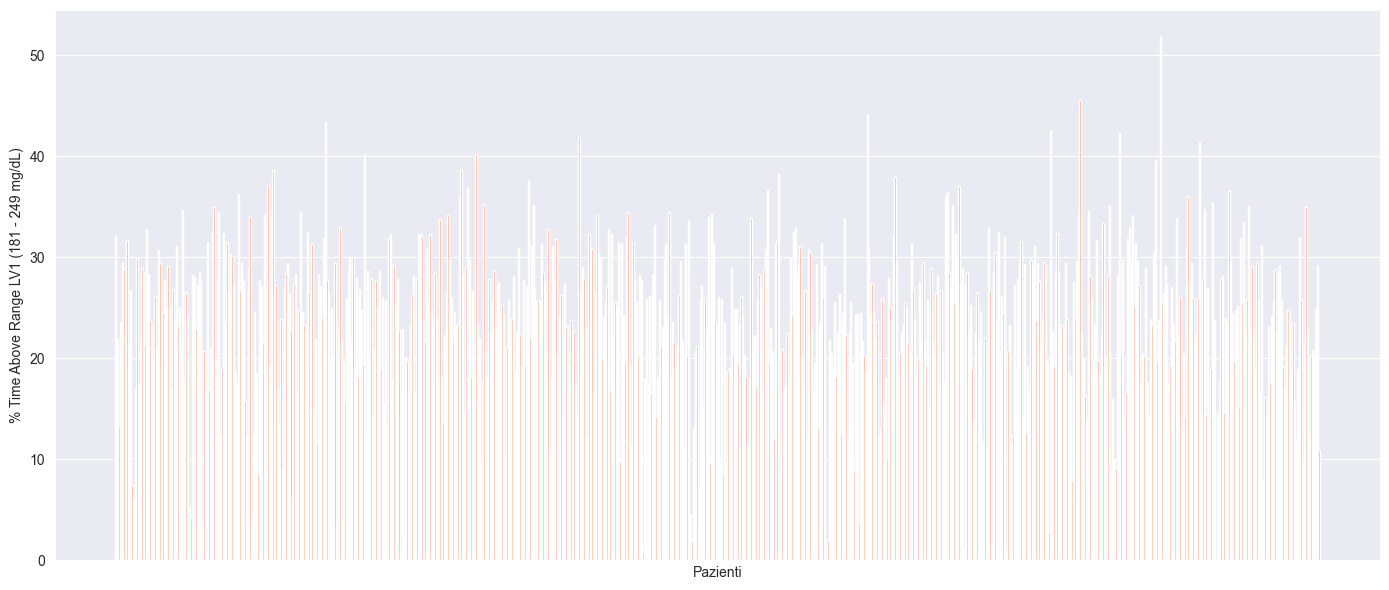

count    736.000000
mean      23.764796
std        7.534126
min        0.000000
25%       19.397705
50%       24.300905
75%       28.590132
max       51.869369
Name: %TARLV1, dtype: float64


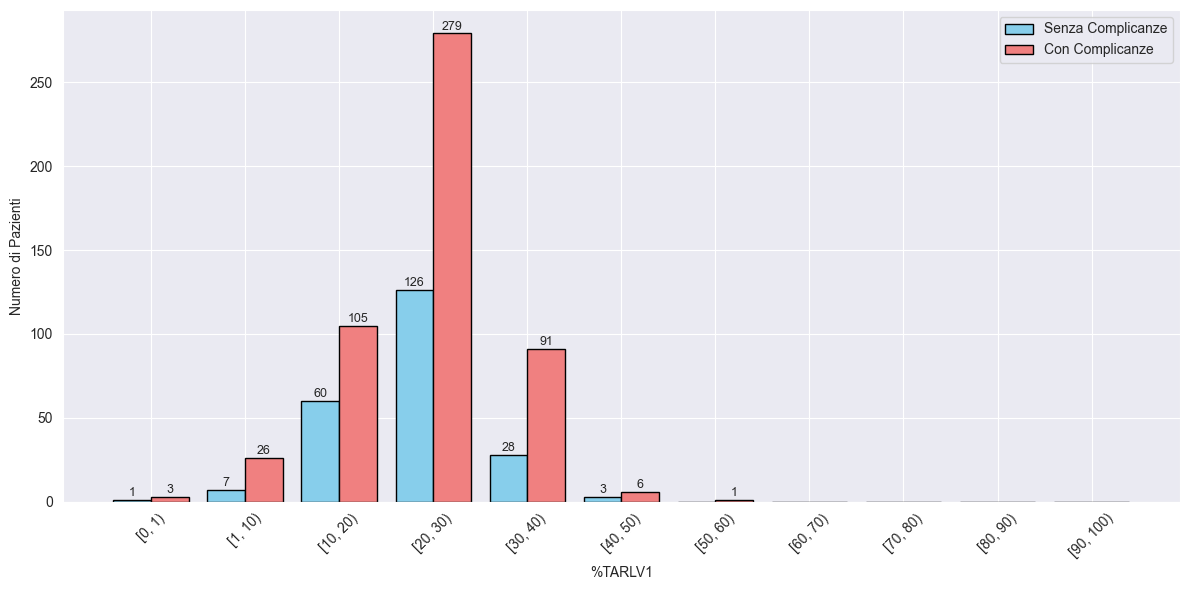

Q1 = 19.40%, Q3 = 28.59%, IQR = 9.19%
Soglia inferiore = 5.61%, soglia superiore = 42.38%
Valori TARLV1 considerati outlier:
[0.0, 0.0, 0.6885266147956033, 0.8106050427694926, 1.1597556709630548, 1.2704686617730097, 1.6025641025641024, 1.9639934533551555, 2.000230795861061, 2.3134608173978255, 2.765546543066821, 3.683265449130644, 3.7522268408551067, 3.7906779429071897, 4.1478612179796155, 4.272042621764725, 4.614590280317535, 5.279503105590062, 42.54737437541246, 43.402061855670105, 44.13838120104438, 45.51114255394411, 51.869369369369366]
Media: 23.76
Mediana: 24.30
Asimmetria (skewness): -0.41
Curtosi (kurtosis): 0.78
Numero di outlier: 23
Moda: [26.0]


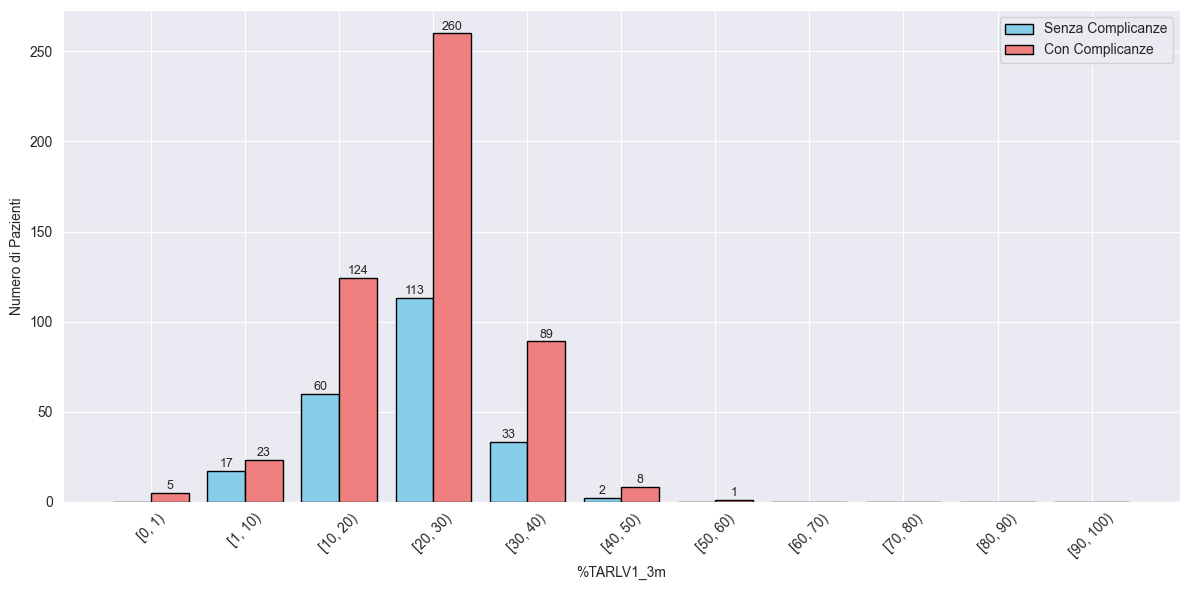

count    736.000000
mean      23.425696
std        8.488217
min        0.000000
25%       18.759577
50%       24.177579
75%       28.481424
max      100.000000
Name: %TARLV1_3m, dtype: float64


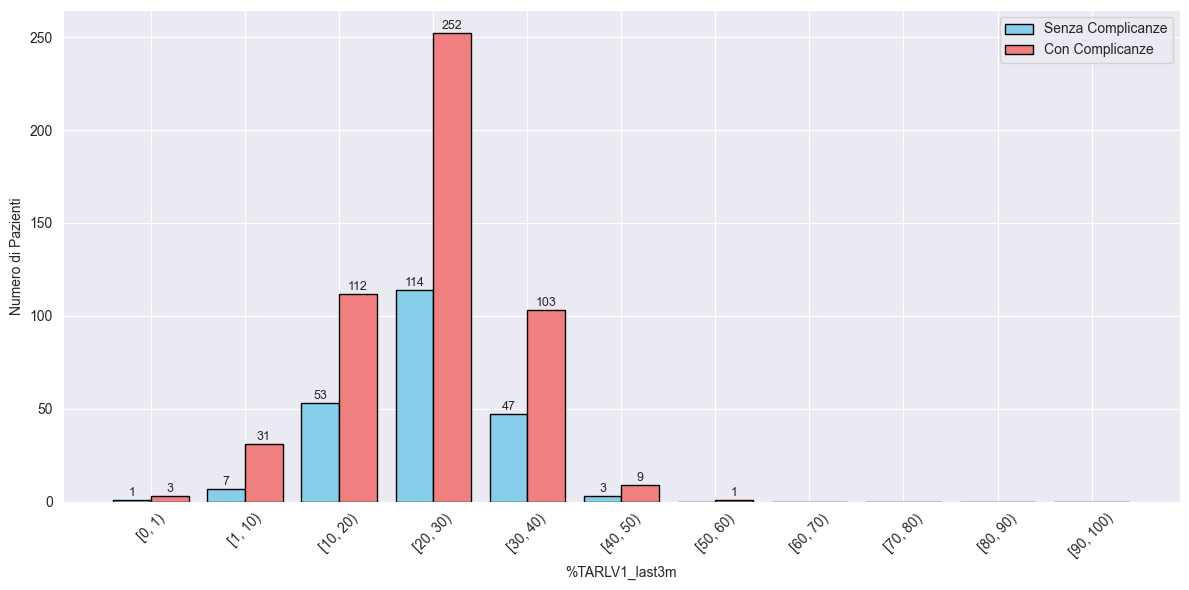

count    736.000000
mean      24.087956
std        8.056958
min        0.000000
25%       19.526608
50%       24.571310
75%       29.452771
max       56.580427
Name: %TARLV1_last3m, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# ANALISI TAR LV1
############################################################################################

df = pd.read_csv("Excel/Glucose_measurements.csv")
diagnostics = pd.read_csv("Excel/Diagnostics.csv")

# Funzione per calcolare il TARLV1 di un paziente
def calculate_tar(misurazioni): # Prende in ingresso l'insieme di misurazioni di un singolo paziente
    totale = len(misurazioni)   # Calcola il numero totale di misurazioni del paziente
    righe_valide = misurazioni[(misurazioni['Measurement'] >= 181) & (misurazioni['Measurement'] <= 249)] # Seleziona solo le righe che nel campo Measurement hanno un valore compreso tra 181 e 249 mg/dL
    tar = len(righe_valide)/totale * 100 # Calcola il %TARLV1 facendo Misurazioni Valide/Misurazioni Totali
    return tar

pazienti = df.groupby('Patient_ID') # Dividiamo il dataset per paziente, ogni gruppo contiene le misurazioni di un singolo paziente
tar_by_paziente = pazienti.apply(calculate_tar, include_groups=False).reset_index(name='%TARLV1') # Calcoliamo il TARLV1 di ogni paziente e creiamo un nuovo dataset con 2 colonne: Ptient_ID e %TARLV1
# tar_by_paziente = tar_by_paziente.sort_values(by='%TARLV1', ascending=False)
print(tar_by_paziente)

# Grafico per la percentuale di ogni paziente
plt.figure(figsize=(14, 6))
plt.bar(tar_by_paziente['Patient_ID'], tar_by_paziente['%TARLV1'], color='#ffa07a')
plt.xticks([])
plt.ylabel('% Time Above Range LV1 (181 - 249 mg/dL)')
plt.xlabel('Pazienti')
plt.title('')
plt.tight_layout()
plt.show()

# Statistiche descrittive di %TARLV1
print(tar_by_paziente['%TARLV1'].describe())

bins = [0, 1] + list(range(10, 110, 10))
tar_intervals = pd.cut(tar_by_paziente['%TARLV1'], bins=bins, right=False)
#Notazione [0,10) 0 é incluso ma 10 no

# Aggiungiamo colonna per sapere se il paziente ha almeno una diagnosi
pazienti_con_diagnosi = set(diagnostics['Patient_ID'])
tar_by_paziente['Has_Diagnosis'] = tar_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)

# Aggiungiamo anche gli intervalli nel dataframe
tar_by_paziente['Interval'] = tar_intervals

# Calcoliamo il numero di pazienti CON e SENZA diagnosi per ogni intervallo
conta_per_interval = tar_by_paziente.groupby(['Interval', 'Has_Diagnosis'], observed=False).size().unstack(fill_value=0)
conta_per_interval = conta_per_interval.sort_index()


# Istogramma con due barre affiancate per ogni intervallo, con etichette
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = range(len(conta_per_interval))

bar1 = plt.bar([i - bar_width/2 for i in index], conta_per_interval[False], width=bar_width, label='Senza Complicanze', color='skyblue', edgecolor='black')
bar2 = plt.bar([i + bar_width/2 for i in index], conta_per_interval[True], width=bar_width, label='Con Complicanze', color='lightcoral', edgecolor='black')

# Aggiunta delle etichette numeriche sopra ogni barra
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)), ha='center', va='bottom', fontsize=9)


plt.xticks(index, [str(i) for i in conta_per_interval.index], rotation=45)
plt.xlabel('%TARLV1')
plt.ylabel('Numero di Pazienti')
plt.title('')
plt.legend()
plt.tight_layout()
plt.show()


tar_values = tar_by_paziente['%TARLV1']

# Statistiche descrittive
media = tar_values.mean()
mediana = tar_values.median()
asimmetria = skew(tar_values) #skewness
curtosi = kurtosis(tar_values)

tar_arrotondato = tar_values.round()
moda = tar_arrotondato.mode()

# Outlier con metodo IQR (Interquartile Range)
# calcola Q1, Q3 e IQR
q1 = tar_values.quantile(0.25)
q3 = tar_values.quantile(0.75)
iqr = q3 - q1

# soglie per outlier
lower_thr = q1 - 1.5 * iqr
upper_thr = q3 + 1.5 * iqr

print(f"Q1 = {q1:.2f}%, Q3 = {q3:.2f}%, IQR = {iqr:.2f}%")
print(f"Soglia inferiore = {lower_thr:.2f}%, soglia superiore = {upper_thr:.2f}%")
outliers = tar_values[(tar_values < lower_thr) | (tar_values > upper_thr)]
print("Valori TARLV1 considerati outlier:")
print(outliers.sort_values().to_list())



# Output
print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Asimmetria (skewness): {asimmetria:.2f}")
print(f"Curtosi (kurtosis): {curtosi:.2f}")
print(f"Numero di outlier: {len(outliers)}")
print("Moda:", moda.tolist())

# ------------------------------------------------------------------------------------------------
# CALCOLO TAR SUI PRIMI 3 MESI
# ------------------------------------------------------------------------------------------------

# 1) Converto Measurement_date in datetime
df['Measurement_date'] = pd.to_datetime(df['Measurement_date'])

# 2) Calcolo la prima data di misurazione per ogni paziente
first_dates = df.groupby('Patient_ID')['Measurement_date'].min().rename('FirstDate')
df = df.join(first_dates, on='Patient_ID')

# 3) Seleziono misurazioni entro 3 mesi dalla data iniziale
df_3m = df[df['Measurement_date'] <= df['FirstDate'] + pd.DateOffset(months=3)]

# 4) Calcolo il TIR sui primi 3 mesi
pazienti_3m = df_3m.groupby('Patient_ID')
tar3m_by_paziente = pazienti_3m.apply(calculate_tar, include_groups=False ).reset_index(name='%TARLV1_3m')

# 5) Aggiungo il flag di diagnosi
tar3m_by_paziente['Has_Diagnosis'] = tar3m_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)

# 6) Creo gli stessi intervalli usati prima su %TIR_3m
tar3m_by_paziente['Interval'] = pd.cut(tar3m_by_paziente['%TARLV1_3m'], bins=bins, right=False)

# 7) Raggruppo e conto
conta_per_interval_3m = tar3m_by_paziente.groupby(['Interval', 'Has_Diagnosis'], observed=False).size().unstack(fill_value=0).sort_index()

# 8) Disegno l’istogramma a barre affiancate
plt.figure(figsize=(12, 6))
bar_width = 0.4
index_3m = range(len(conta_per_interval_3m))

bar1_3m = plt.bar([i - bar_width/2 for i in index_3m], conta_per_interval_3m[False],
                   width=bar_width, label='Senza Complicanze', color='skyblue', edgecolor='black')
bar2_3m = plt.bar([i + bar_width/2 for i in index_3m], conta_per_interval_3m[True],
                   width=bar_width, label='Con Complicanze', color='lightcoral', edgecolor='black')

for bars in (bar1_3m, bar2_3m):
    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(bar.get_x() + bar.get_width()/2, h + 0.5, str(int(h)),
                     ha='center', va='bottom', fontsize=9)

plt.xticks(index_3m, [str(i) for i in conta_per_interval_3m.index], rotation=45)
plt.xlabel('%TARLV1_3m')
plt.ylabel('Numero di Pazienti')
plt.title('')
plt.legend()
plt.tight_layout()
plt.show()

# 9) Statistiche descrittive per %TIR_3m (facoltativo)
print(tar3m_by_paziente['%TARLV1_3m'].describe())



# ------------------------------------------------------------------------------------------------
# CALCOLO TAR SUGLI ULTIMI 3 MESI
# ------------------------------------------------------------------------------------------------

# 1) Converto Measurement_date in datetime
df['Measurement_date'] = pd.to_datetime(df['Measurement_date'])

# 2) Calcolo l'ultima data di misurazione per ogni paziente
first_dates = df.groupby('Patient_ID')['Measurement_date'].max().rename('LastDate')
df = df.join(first_dates, on='Patient_ID')

# 3) Seleziono misurazioni entro 3 mesi dalla data finale
df_3m = df[df['Measurement_date'] >= df['LastDate'] - pd.DateOffset(months=3)]

# 4) Calcolo il TIR sugli ultimi 3 mesi
pazienti_3m = df_3m.groupby('Patient_ID')
tar3m_by_paziente = pazienti_3m.apply(calculate_tar, include_groups=False ).reset_index(name='%TARLV1_last3m')

# 5) Aggiungo il flag di diagnosi
tar3m_by_paziente['Has_Diagnosis'] = tar3m_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)

# 6) Creo gli stessi intervalli usati prima su %TIR_3m
tar3m_by_paziente['Interval'] = pd.cut(tar3m_by_paziente['%TARLV1_last3m'], bins=bins, right=False)

# 7) Raggruppo e conto
conta_per_interval_3m = tar3m_by_paziente.groupby(['Interval', 'Has_Diagnosis'], observed=False).size().unstack(fill_value=0).sort_index()

# 8) Disegno l’istogramma a barre affiancate
plt.figure(figsize=(12, 6))
bar_width = 0.4
index_3m = range(len(conta_per_interval_3m))

bar1_3m = plt.bar([i - bar_width/2 for i in index_3m], conta_per_interval_3m[False],
                   width=bar_width, label='Senza Complicanze', color='skyblue', edgecolor='black')
bar2_3m = plt.bar([i + bar_width/2 for i in index_3m], conta_per_interval_3m[True],
                   width=bar_width, label='Con Complicanze', color='lightcoral', edgecolor='black')

for bars in (bar1_3m, bar2_3m):
    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(bar.get_x() + bar.get_width()/2, h + 0.5, str(int(h)),
                     ha='center', va='bottom', fontsize=9)

plt.xticks(index_3m, [str(i) for i in conta_per_interval_3m.index], rotation=45)
plt.xlabel('%TARLV1_last3m')
plt.ylabel('Numero di Pazienti')
plt.title('')
plt.legend()
plt.tight_layout()
plt.show()

# 9) Statistiche descrittive per %TIR_3m (facoltativo)
print(tar3m_by_paziente['%TARLV1_last3m'].describe())
############################################################################################

    Patient_ID    %TARLV2
0    LIB193263  13.303271
1    LIB193264   7.623101
2    LIB193265   6.567760
3    LIB193266   6.127504
4    LIB193267  16.696996
..         ...        ...
731  LIB194162   7.293660
732  LIB194163   8.031540
733  LIB194164   4.949443
734  LIB194165  17.688472
735  LIB194166   1.021815

[736 rows x 2 columns]


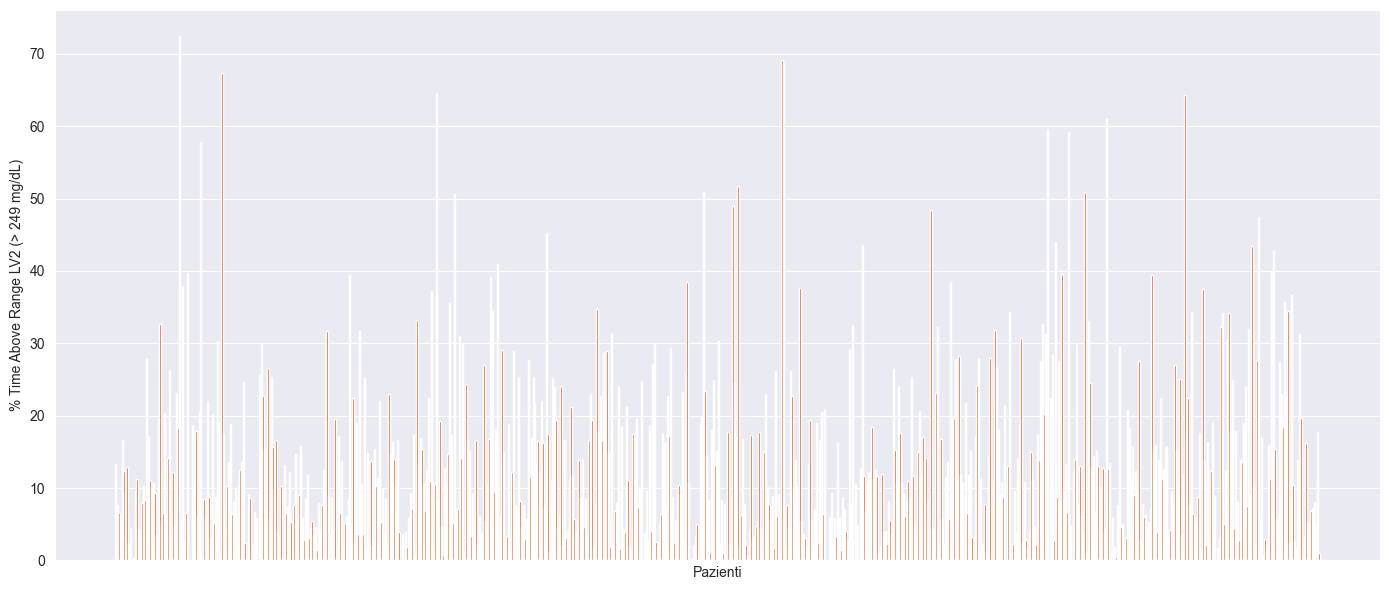

count    736.000000
mean      13.309700
std       11.938113
min        0.000000
25%        4.645998
50%       10.246298
75%       17.923225
max       72.439413
Name: %TARLV2, dtype: float64


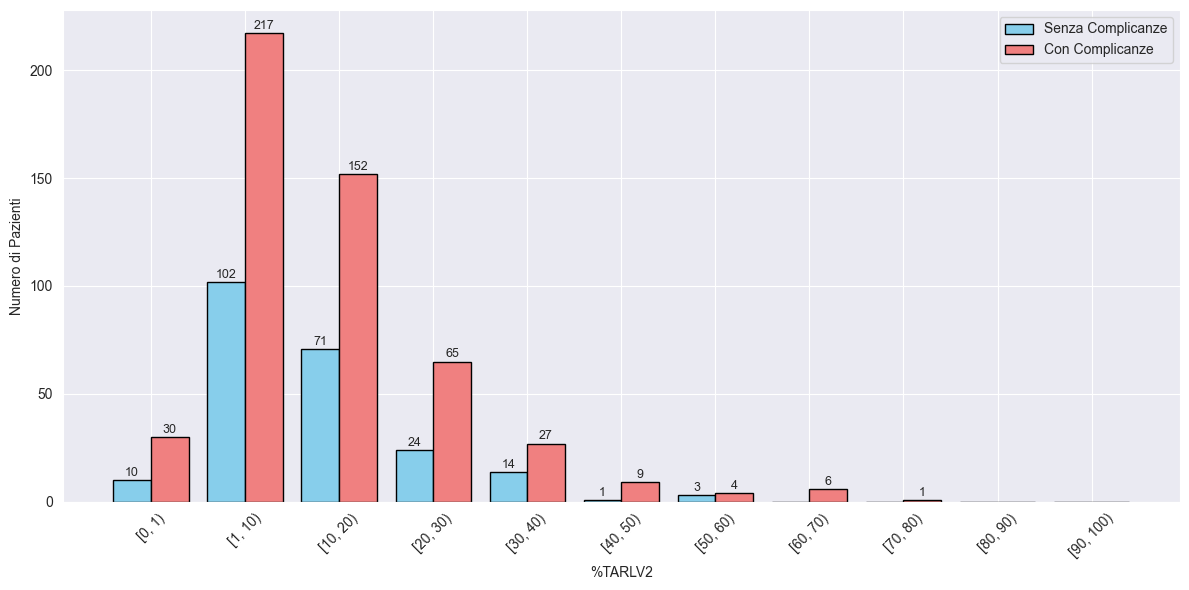

Q1 = 4.65%, Q3 = 17.92%, IQR = 13.28%
Soglia inferiore = -15.27%, soglia superiore = 37.84%
Valori TARLV2 considerati outlier:
[37.87262183335029, 38.42431645212816, 38.51095197978096, 39.14450035945363, 39.4694315522747, 39.50806003335186, 39.55368605064052, 39.67611336032389, 40.05708848715509, 40.9841372612496, 42.73729894185813, 43.50363827386279, 43.53741496598639, 43.945810864132575, 45.24793388429752, 47.48743718592965, 48.38344344074423, 48.97184435305283, 50.633035626656195, 50.84470435347629, 50.87281795511222, 51.796875, 57.77010360138135, 59.14285714285714, 59.66481595722804, 60.986301369863014, 64.34102544313241, 64.57598764637756, 67.36045411542099, 68.76474239602732, 69.13619167717529, 72.43941270122059]
Media: 13.31
Mediana: 10.25
Asimmetria (skewness): 1.73
Curtosi (kurtosis): 3.99
Numero di outlier: 32
Moda: [2.0]


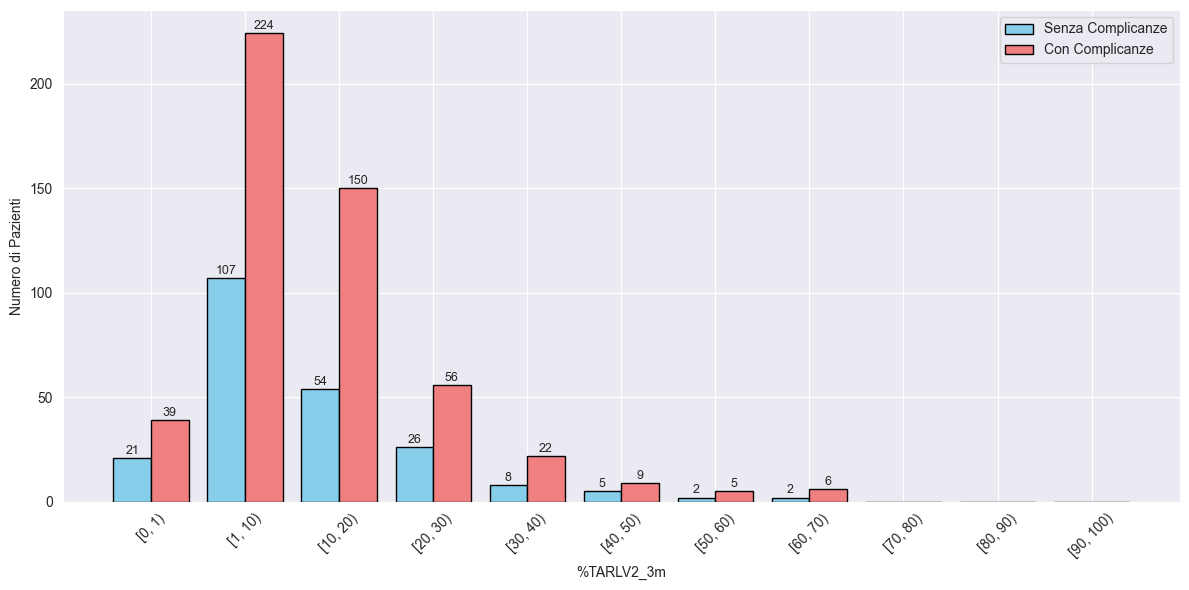

count    736.000000
mean      12.583098
std       12.091392
min        0.000000
25%        4.230082
50%        9.339258
75%       17.132323
max       69.136192
Name: %TARLV2_3m, dtype: float64


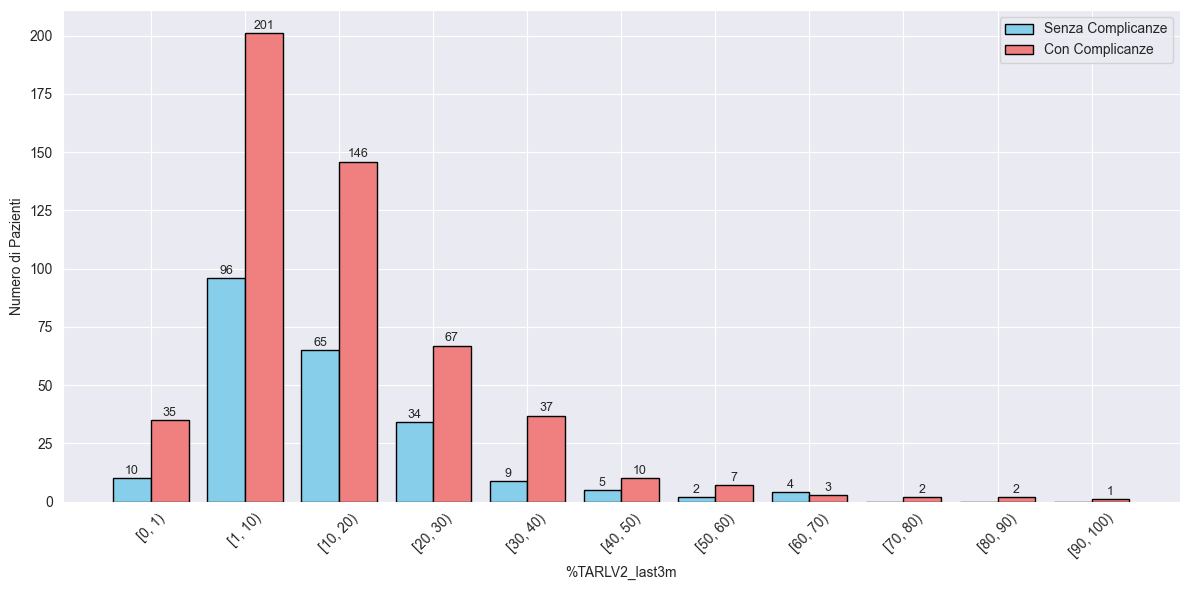

count    736.000000
mean      14.502538
std       13.619544
min        0.000000
25%        4.667122
50%       11.195356
75%       19.819495
max       92.069632
Name: %TARLV2_last3m, dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

df = pd.read_csv("Excel/Glucose_measurements.csv")
diagnostics = pd.read_csv("Excel/Diagnostics.csv")

# ANALISI TAR LV2
############################################################################################
# Funzione per calcolare il TARLV2 di un paziente
def calculate_tar(misurazioni): # Prende in ingresso l'insieme di misurazioni di un singolo paziente
    totale = len(misurazioni)   # Calcola il numero totale di misurazioni del paziente
    righe_valide = misurazioni[(misurazioni['Measurement'] >= 250)] # Seleziona solo le righe che nel campo Measurement hanno un valore maggiore di 250 mg/dL
    tar = len(righe_valide)/totale * 100 # Calcola il %TARLV2 facendo Misurazioni Valide/Misurazioni Totali
    return tar

pazienti = df.groupby('Patient_ID') # Dividiamo il dataset per paziente, ogni gruppo contiene le misurazioni di un singolo paziente
tar_by_paziente = pazienti.apply(calculate_tar, include_groups=False).reset_index(name='%TARLV2') # Calcoliamo il TARLV2 di ogni paziente e creiamo un nuovo dataset con 2 colonne: Ptient_ID e %TARLV2
# tar_by_paziente = tar_by_paziente.sort_values(by='%TARLV2', ascending=False)
print(tar_by_paziente)

# Grafico per la percentuale di ogni paziente
plt.figure(figsize=(14, 6))
plt.bar(tar_by_paziente['Patient_ID'], tar_by_paziente['%TARLV2'], color='#e64100')
plt.xticks([])
plt.ylabel('% Time Above Range LV2 (> 249 mg/dL)')
plt.xlabel('Pazienti')
plt.title('')
plt.tight_layout()
plt.show()

# Statistiche descrittive di %TARLV2
print(tar_by_paziente['%TARLV2'].describe())

bins = [0, 1] + list(range(10, 110, 10))
tar_intervals = pd.cut(tar_by_paziente['%TARLV2'], bins=bins, right=False)
#Notazione [0,10) 0 é incluso ma 10 no

# Aggiungiamo colonna per sapere se il paziente ha almeno una diagnosi
pazienti_con_diagnosi = set(diagnostics['Patient_ID'])
tar_by_paziente['Has_Diagnosis'] = tar_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)

# Aggiungiamo anche gli intervalli nel dataframe
tar_by_paziente['Interval'] = tar_intervals

# Calcoliamo il numero di pazienti CON e SENZA diagnosi per ogni intervallo
conta_per_interval = tar_by_paziente.groupby(['Interval', 'Has_Diagnosis'], observed=False).size().unstack(fill_value=0)
conta_per_interval = conta_per_interval.sort_index()

# Istogramma con due barre affiancate per ogni intervallo, con etichette
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = range(len(conta_per_interval))

bar1 = plt.bar([i - bar_width/2 for i in index], conta_per_interval[False], width=bar_width, label='Senza Complicanze', color='skyblue', edgecolor='black')
bar2 = plt.bar([i + bar_width/2 for i in index], conta_per_interval[True], width=bar_width, label='Con Complicanze', color='lightcoral', edgecolor='black')

# Aggiunta delle etichette numeriche sopra ogni barra
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)), ha='center', va='bottom', fontsize=9)


plt.xticks(index, [str(i) for i in conta_per_interval.index], rotation=45)
plt.xlabel('%TARLV2')
plt.ylabel('Numero di Pazienti')
plt.title('')
plt.legend()
plt.tight_layout()
plt.show()


tar_values = tar_by_paziente['%TARLV2']

# Statistiche descrittive
media = tar_values.mean()
mediana = tar_values.median()
asimmetria = skew(tar_values) #skewness
curtosi = kurtosis(tar_values)

tar_arrotondato = tar_values.round()
moda = tar_arrotondato.mode()

# Outlier con metodo IQR (Interquartile Range)
# calcola Q1, Q3 e IQR
q1 = tar_values.quantile(0.25)
q3 = tar_values.quantile(0.75)
iqr = q3 - q1

# soglie per outlier
lower_thr = q1 - 1.5 * iqr
upper_thr = q3 + 1.5 * iqr

print(f"Q1 = {q1:.2f}%, Q3 = {q3:.2f}%, IQR = {iqr:.2f}%")
print(f"Soglia inferiore = {lower_thr:.2f}%, soglia superiore = {upper_thr:.2f}%")
outliers = tar_values[(tar_values < lower_thr) | (tar_values > upper_thr)]
print("Valori TARLV2 considerati outlier:")
print(outliers.sort_values().to_list())



# Output
print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Asimmetria (skewness): {asimmetria:.2f}")
print(f"Curtosi (kurtosis): {curtosi:.2f}")
print(f"Numero di outlier: {len(outliers)}")
print("Moda:", moda.tolist())


# ------------------------------------------------------------------------------------------------
# CALCOLO TAR SUI PRIMI 3 MESI
# ------------------------------------------------------------------------------------------------


# 1) Converto Measurement_date in datetime
df['Measurement_date'] = pd.to_datetime(df['Measurement_date'])

# 2) Calcolo la prima data di misurazione per ogni paziente
first_dates = df.groupby('Patient_ID')['Measurement_date'].min().rename('FirstDate')
df = df.join(first_dates, on='Patient_ID')

# 3) Seleziono misurazioni entro 3 mesi dalla data iniziale
df_3m = df[df['Measurement_date'] <= df['FirstDate'] + pd.DateOffset(months=3)]

# 4) Calcolo il TIR sui primi 3 mesi
pazienti_3m = df_3m.groupby('Patient_ID')
tar3m_by_paziente = pazienti_3m.apply(calculate_tar, include_groups=False).reset_index(name='%TARLV2_3m')

# 5) Aggiungo il flag di diagnosi
tar3m_by_paziente['Has_Diagnosis'] = tar3m_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)

# 6) Creo gli stessi intervalli usati prima su %TIR_3m
tar3m_by_paziente['Interval'] = pd.cut(tar3m_by_paziente['%TARLV2_3m'], bins=bins, right=False)

# 7) Raggruppo e conto
conta_per_interval_3m = tar3m_by_paziente.groupby(['Interval', 'Has_Diagnosis'], observed=False).size().unstack(fill_value=0).sort_index()

# 8) Disegno l’istogramma a barre affiancate
plt.figure(figsize=(12, 6))
bar_width = 0.4
index_3m = range(len(conta_per_interval_3m))

bar1_3m = plt.bar([i - bar_width/2 for i in index_3m], conta_per_interval_3m[False],
                   width=bar_width, label='Senza Complicanze', color='skyblue', edgecolor='black')
bar2_3m = plt.bar([i + bar_width/2 for i in index_3m], conta_per_interval_3m[True],
                   width=bar_width, label='Con Complicanze', color='lightcoral', edgecolor='black')

for bars in (bar1_3m, bar2_3m):
    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(bar.get_x() + bar.get_width()/2, h + 0.5, str(int(h)),
                     ha='center', va='bottom', fontsize=9)

plt.xticks(index_3m, [str(i) for i in conta_per_interval_3m.index], rotation=45)
plt.xlabel('%TARLV2_3m')
plt.ylabel('Numero di Pazienti')
plt.title('')
plt.legend()
plt.tight_layout()
plt.show()

# 9) Statistiche descrittive per %TIR_3m (facoltativo)
print(tar3m_by_paziente['%TARLV2_3m'].describe())


# ------------------------------------------------------------------------------------------------
# CALCOLO TAR SUGLI ULTIMI 3 MESI
# ------------------------------------------------------------------------------------------------

# 1) Converto Measurement_date in datetime
df['Measurement_date'] = pd.to_datetime(df['Measurement_date'])

# 2) Calcolo l'ultima data di misurazione per ogni paziente
first_dates = df.groupby('Patient_ID')['Measurement_date'].max().rename('LastDate')
df = df.join(first_dates, on='Patient_ID')

# 3) Seleziono misurazioni entro 3 mesi dalla data finale
df_3m = df[df['Measurement_date'] >= df['LastDate'] - pd.DateOffset(months=3)]

# 4) Calcolo il TIR sugli ultimi 3 mesi
pazienti_3m = df_3m.groupby('Patient_ID')
tar3m_by_paziente = pazienti_3m.apply(calculate_tar, include_groups=False ).reset_index(name='%TARLV2_last3m')

# 5) Aggiungo il flag di diagnosi
tar3m_by_paziente['Has_Diagnosis'] = tar3m_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)

# 6) Creo gli stessi intervalli usati prima su %TIR_3m
tar3m_by_paziente['Interval'] = pd.cut(tar3m_by_paziente['%TARLV2_last3m'], bins=bins, right=False)

# 7) Raggruppo e conto
conta_per_interval_3m = tar3m_by_paziente.groupby(['Interval', 'Has_Diagnosis'], observed=False).size().unstack(fill_value=0).sort_index()

# 8) Disegno l’istogramma a barre affiancate
plt.figure(figsize=(12, 6))
bar_width = 0.4
index_3m = range(len(conta_per_interval_3m))

bar1_3m = plt.bar([i - bar_width/2 for i in index_3m], conta_per_interval_3m[False],
                   width=bar_width, label='Senza Complicanze', color='skyblue', edgecolor='black')
bar2_3m = plt.bar([i + bar_width/2 for i in index_3m], conta_per_interval_3m[True],
                   width=bar_width, label='Con Complicanze', color='lightcoral', edgecolor='black')

for bars in (bar1_3m, bar2_3m):
    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(bar.get_x() + bar.get_width()/2, h + 0.5, str(int(h)),
                     ha='center', va='bottom', fontsize=9)

plt.xticks(index_3m, [str(i) for i in conta_per_interval_3m.index], rotation=45)
plt.xlabel('%TARLV2_last3m')
plt.ylabel('Numero di Pazienti')
plt.title('')
plt.legend()
plt.tight_layout()
plt.show()

# 9) Statistiche descrittive per %TIR_3m (facoltativo)
print(tar3m_by_paziente['%TARLV2_last3m'].describe())
############################################################################################

    Patient_ID       %TBR
0    LIB193263   1.941828
1    LIB193264   8.033748
2    LIB193265  15.664720
3    LIB193266   1.703189
4    LIB193267   1.592764
..         ...        ...
731  LIB194162   7.556818
732  LIB194163   4.900028
733  LIB194164   4.390746
734  LIB194165   4.500691
735  LIB194166   2.376244

[736 rows x 2 columns]


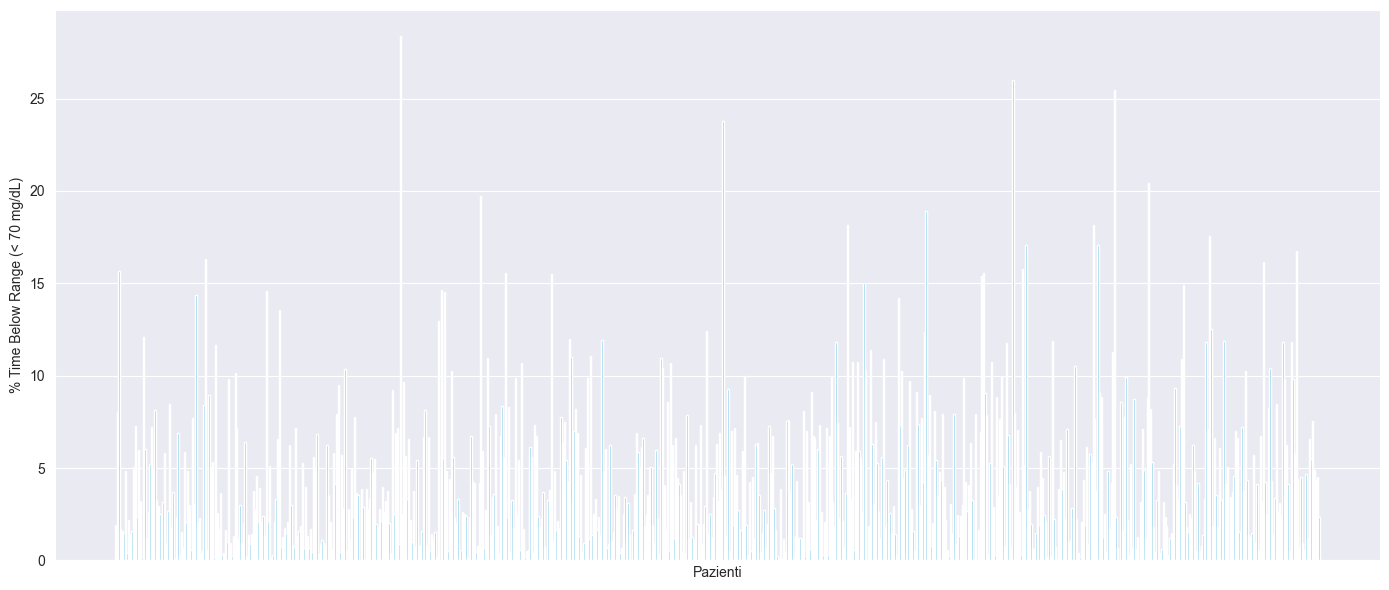

count    736.000000
mean       4.419377
std        4.088829
min        0.000000
25%        1.431836
50%        3.263448
75%        6.307359
max       28.377687
Name: %TBR, dtype: float64


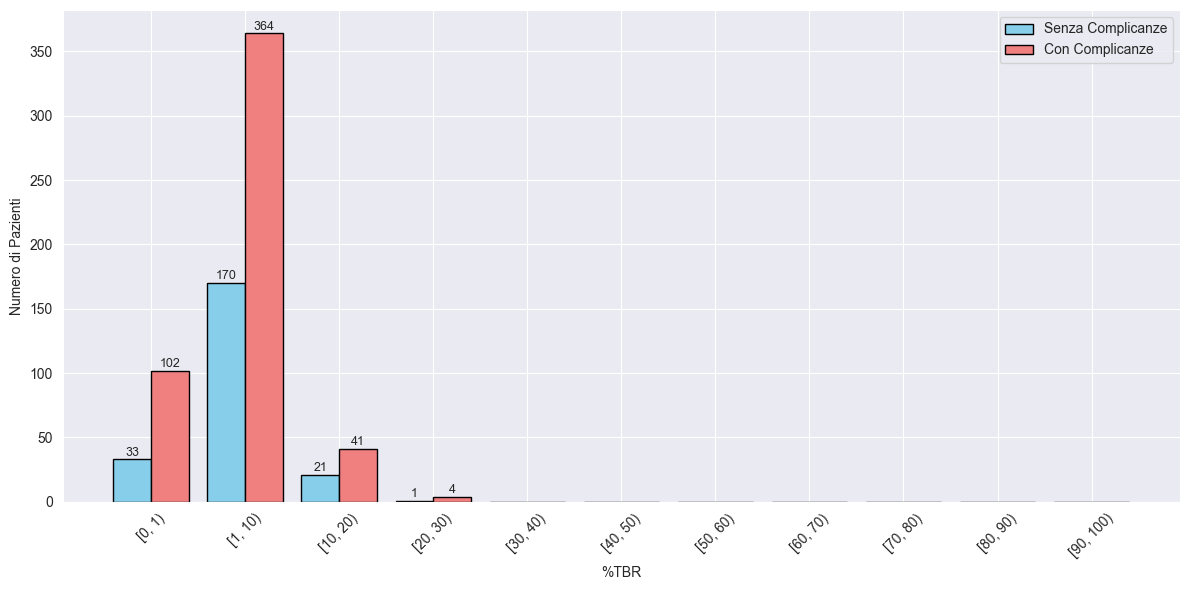

Q1 = 1.43%, Q3 = 6.31%, IQR = 4.88%
Soglia inferiore = -5.88%, soglia superiore = 13.62%
Valori TBR considerati outlier:
[14.21617197260156, 14.344456745215878, 14.550095724313975, 14.588197757893056, 14.63461973926827, 14.932540589983992, 15.017262501392137, 15.409309791332262, 15.519536903039075, 15.55351093638911, 15.58093171890117, 15.664720027481966, 15.798371947401376, 16.129928920303378, 16.29176052539738, 16.736062493091122, 17.08963911525029, 17.0994806232521, 17.537227421511226, 18.158390039090776, 18.163738813390786, 18.934010152284266, 19.75337417056951, 20.448611440778542, 23.807756541102247, 25.48882175226586, 26.019323671497585, 28.377687484863976]
Media: 4.42
Mediana: 3.26
Asimmetria (skewness): 1.81
Curtosi (kurtosis): 4.79
Numero di outlier: 28
Moda: [1.0]

Statistiche per il gruppo 'Senza Complicanze':
 - Media:   4.71
 - Mediana: 3.95
 - IQR:     4.83 (Q3: 6.65, Q1: 1.82)

Statistiche per il gruppo 'Con Complicanze':
 - Media:   4.29
 - Mediana: 3.09
 - IQR:     4.8

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu

df = pd.read_csv("Excel/Glucose_measurements.csv")
diagnostics = pd.read_csv("Excel/Diagnostics.csv")

# ANALISI TBR
############################################################################################
# Funzione per calcolare il TBR di un paziente
def calculate_tbr(misurazioni): # Prende in ingresso l'insieme di misurazioni di un singolo paziente
    totale = len(misurazioni)   # Calcola il numero totale di misurazioni del paziente
    righe_valide = misurazioni[(misurazioni['Measurement'] < 70)] # Seleziona solo le righe che nel campo Measurement hanno un valore minore di 70 mg/dL
    tbr = len(righe_valide)/totale * 100 # Calcola il %TBR facendo Misurazioni Valide/Misurazioni Totali
    return tbr

pazienti = df.groupby('Patient_ID') # Dividiamo il dataset per paziente, ogni gruppo contiene le misurazioni di un singolo paziente
tbr_by_paziente = pazienti.apply(calculate_tbr, include_groups=False).reset_index(name='%TBR') # Calcoliamo il TBR di ogni paziente e creiamo un nuovo dataset con 2 colonne: Ptient_ID e %TBR
# tbr_by_paziente = tbr_by_paziente.sort_values(by='%TBR', ascending=False)
print(tbr_by_paziente)

# Grafico per la percentuale di ogni paziente
plt.figure(figsize=(14, 6))
plt.bar(tbr_by_paziente['Patient_ID'], tbr_by_paziente['%TBR'], color='skyblue')
plt.xticks([])
plt.ylabel('% Time Below Range (< 70 mg/dL)')
plt.xlabel('Pazienti')
plt.title('')
plt.tight_layout()
plt.show()

# Statistiche descrittive di %TBR
print(tbr_by_paziente['%TBR'].describe())

bins = [0, 1] + list(range(10, 110, 10))
tbr_intervals = pd.cut(tbr_by_paziente['%TBR'], bins=bins, right=False)
#Notazione [0,10) 0 é incluso ma 10 no

# Aggiungiamo colonna per sapere se il paziente ha almeno una diagnosi
pazienti_con_diagnosi = set(diagnostics['Patient_ID'])
tbr_by_paziente['Has_Diagnosis'] = tbr_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)

# Aggiungiamo anche gli intervalli nel dataframe
tbr_by_paziente['Interval'] = tbr_intervals

# Calcoliamo il numero di pazienti CON e SENZA diagnosi per ogni intervallo
conta_per_interval = tbr_by_paziente.groupby(['Interval', 'Has_Diagnosis'], observed=False).size().unstack(fill_value=0)
conta_per_interval = conta_per_interval.sort_index()


# Istogramma con due barre affiancate per ogni intervallo, con etichette
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = range(len(conta_per_interval))

bar1 = plt.bar([i - bar_width/2 for i in index], conta_per_interval[False], width=bar_width, label='Senza Complicanze', color='skyblue', edgecolor='black')
bar2 = plt.bar([i + bar_width/2 for i in index], conta_per_interval[True], width=bar_width, label='Con Complicanze', color='lightcoral', edgecolor='black')

# Aggiunta delle etichette numeriche sopra ogni barra
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)), ha='center', va='bottom', fontsize=9)


plt.xticks(index, [str(i) for i in conta_per_interval.index], rotation=45)
plt.xlabel('%TBR')
plt.ylabel('Numero di Pazienti')
plt.title('')
plt.legend()
plt.tight_layout()
plt.show()



tbr_values = tbr_by_paziente['%TBR']

# Statistiche descrittive
media = tbr_values.mean()
mediana = tbr_values.median()
asimmetria = skew(tbr_values) #skewness
curtosi = kurtosis(tbr_values)

tar_arrotondato = tbr_values.round()
moda = tar_arrotondato.mode()

# Outlier con metodo IQR (Interquartile Range)
# calcola Q1, Q3 e IQR
q1 = tbr_values.quantile(0.25)
q3 = tbr_values.quantile(0.75)
iqr = q3 - q1

# soglie per outlier
lower_thr = q1 - 1.5 * iqr
upper_thr = q3 + 1.5 * iqr

print(f"Q1 = {q1:.2f}%, Q3 = {q3:.2f}%, IQR = {iqr:.2f}%")
print(f"Soglia inferiore = {lower_thr:.2f}%, soglia superiore = {upper_thr:.2f}%")
outliers = tbr_values[(tbr_values < lower_thr) | (tbr_values > upper_thr)]
print("Valori TBR considerati outlier:")
print(outliers.sort_values().to_list())



# Output
print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Asimmetria (skewness): {asimmetria:.2f}")
print(f"Curtosi (kurtosis): {curtosi:.2f}")
print(f"Numero di outlier: {len(outliers)}")
print("Moda:", moda.tolist())

# Estrai le due serie
g0 = tbr_by_paziente.loc[ tbr_by_paziente['Has_Diagnosis']==False, '%TBR']
g1 = tbr_by_paziente.loc[ tbr_by_paziente['Has_Diagnosis']==True,  '%TBR']

# Esegui il test two-sided
u_stat, p_value = mannwhitneyu(g0, g1, alternative='two-sided')

# STATISTICHE PER GRUPPO
for nome_gruppo, gruppo in zip(["Senza Complicanze", "Con Complicanze"], [g0, g1]):
    media   = gruppo.mean()
    mediana = gruppo.median()
    q1      = gruppo.quantile(0.25)
    q3      = gruppo.quantile(0.75)
    iqr     = q3 - q1

    print(f"\nStatistiche per il gruppo '{nome_gruppo}':")
    print(f" - Media:   {media:.2f}")
    print(f" - Mediana: {mediana:.2f}")
    print(f" - IQR:     {iqr:.2f} (Q3: {q3:.2f}, Q1: {q1:.2f})")

print(f"U-statistic = {u_stat:.2f}")
print(f"p-value      = {p_value:.4f}")
############################################################################################

    Patient_ID    %TBRLV1
0    LIB193263   1.520849
1    LIB193264   6.790607
2    LIB193265  12.109241
3    LIB193266   1.554929
4    LIB193267   1.466640
..         ...        ...
731  LIB194162   6.252990
732  LIB194163   4.522670
733  LIB194164   4.121680
734  LIB194165   4.010393
735  LIB194166   2.187463

[736 rows x 2 columns]


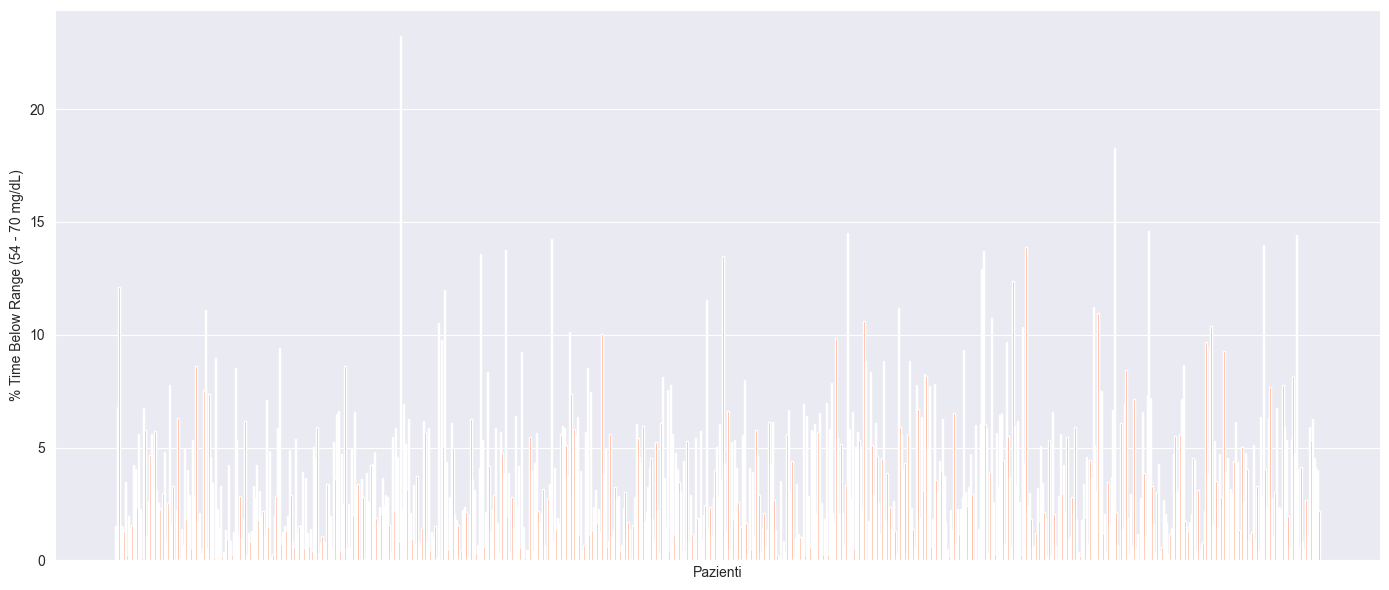

count    736.000000
mean       3.530091
std        2.984482
min        0.000000
25%        1.300223
50%        2.822725
75%        5.269218
max       23.224713
Name: %TBRLV1, dtype: float64


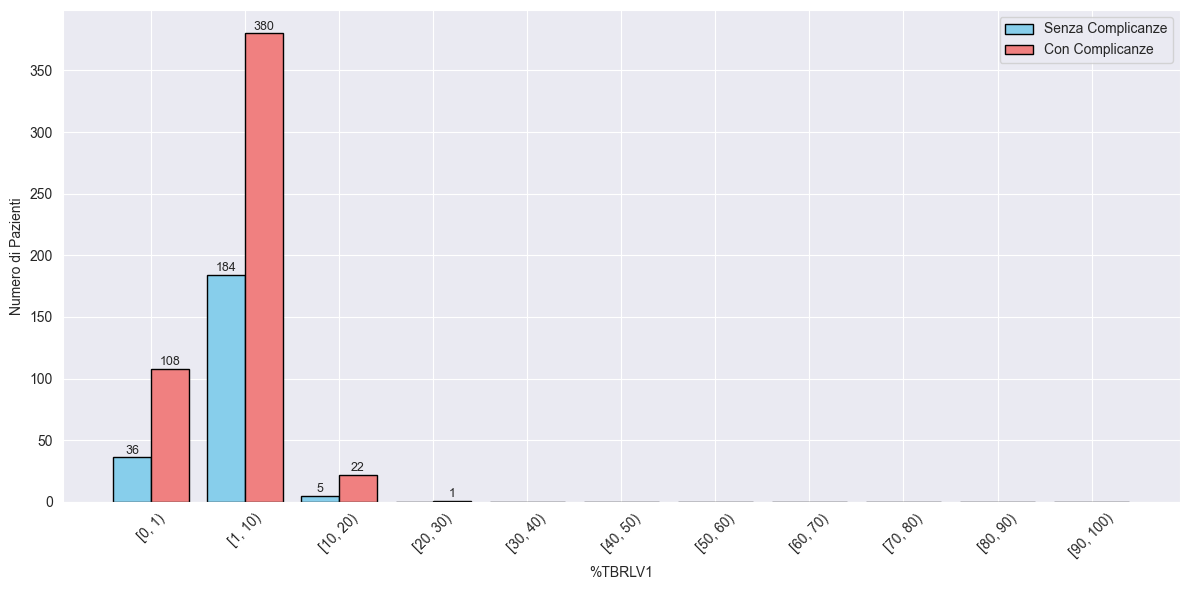

Q1 = 1.30%, Q3 = 5.27%, IQR = 3.97%
Soglia inferiore = -4.65%, soglia superiore = 11.22%
Valori TBRLV1 considerati outlier:
[11.234979006804691, 11.531755915317559, 11.997447351627313, 12.109240810717967, 12.367149758454106, 12.91466024612092, 13.490443496010391, 13.55568018762792, 13.700807159884572, 13.761763757366092, 13.903316020775069, 13.961799626732319, 14.222865412445731, 14.416522347912597, 14.513589658601258, 14.59965187119234, 18.262235649546827, 23.224712751930685]
Media: 3.53
Mediana: 2.82
Asimmetria (skewness): 1.60
Curtosi (kurtosis): 4.29
Numero di outlier: 18
Moda: [1.0]


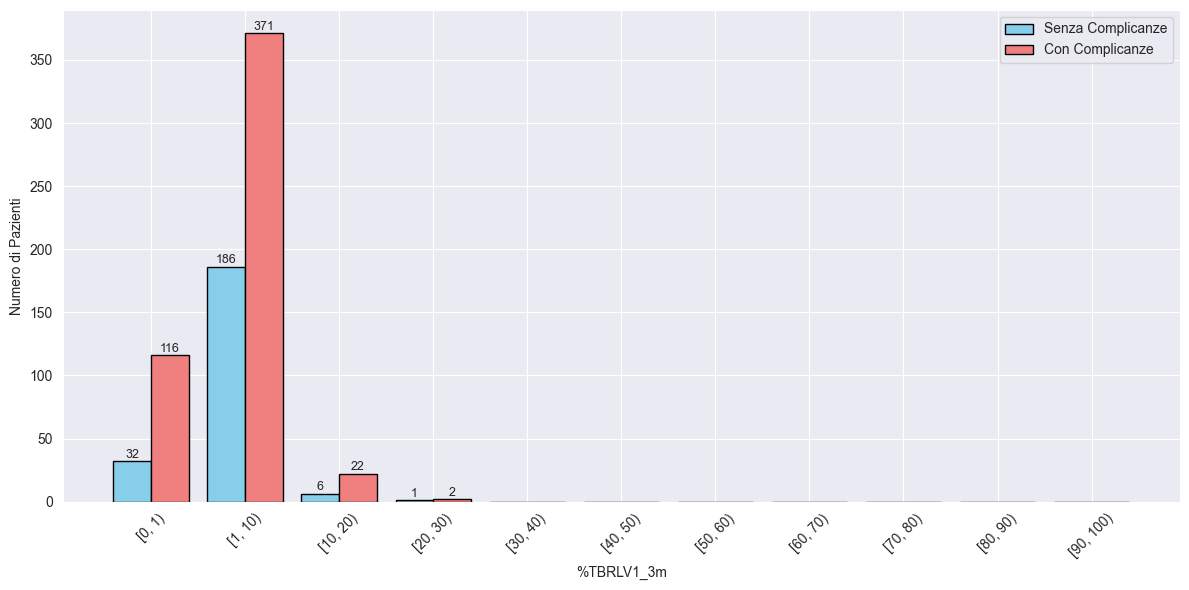

count    736.000000
mean       3.735095
std        3.186964
min        0.000000
25%        1.276710
50%        3.001930
75%        5.566171
max       24.649791
Name: %TBRLV1_3m, dtype: float64


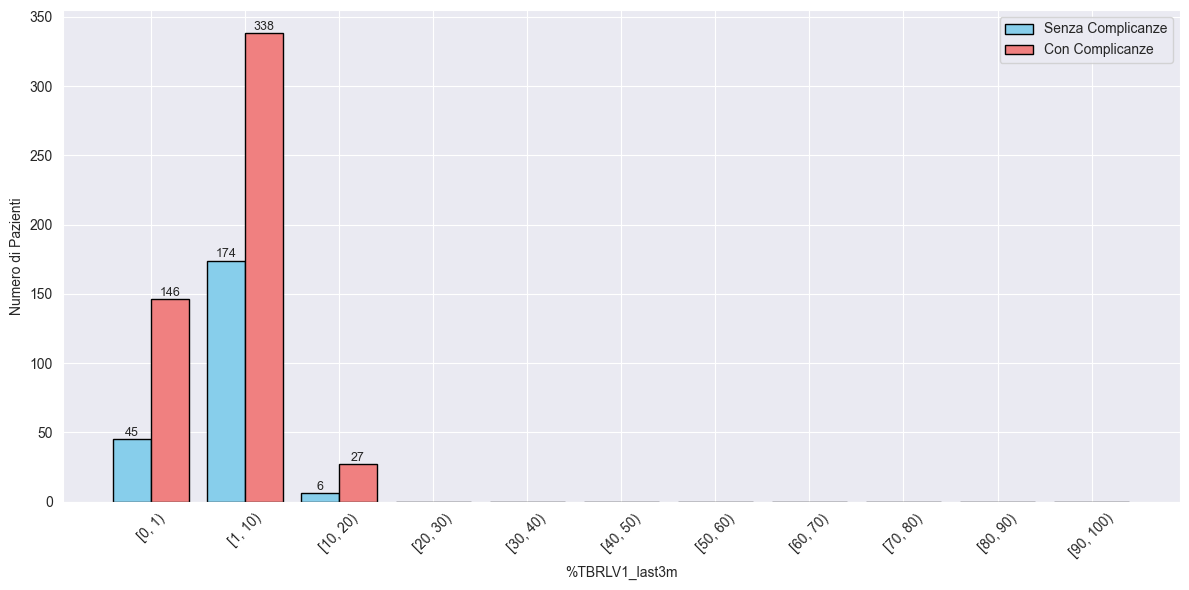

count    736.000000
mean       3.266788
std        3.076013
min        0.000000
25%        0.907440
50%        2.451768
75%        4.763425
max       19.865006
Name: %TBRLV1_last3m, dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

df = pd.read_csv("Excel/Glucose_measurements.csv")
diagnostics = pd.read_csv("Excel/Diagnostics.csv")

# ANALISI TBR LV1
############################################################################################
# Funzione per calcolare il TBRLV1 di un paziente
def calculate_tbr(misurazioni): # Prende in ingresso l'insieme di misurazioni di un singolo paziente
    totale = len(misurazioni)   # Calcola il numero totale di misurazioni del paziente
    righe_valide = misurazioni[(misurazioni['Measurement'] >= 54) & (misurazioni['Measurement'] < 70)] # Seleziona solo le righe che nel campo Measurement hanno un valore compreso tra 54 e 70 mg/dL
    tbr = len(righe_valide)/totale * 100 # Calcola il %TBRLV1 facendo Misurazioni Valide/Misurazioni Totali
    return tbr

pazienti = df.groupby('Patient_ID') # Dividiamo il dataset per paziente, ogni gruppo contiene le misurazioni di un singolo paziente
tbr_by_paziente = pazienti.apply(calculate_tbr, include_groups=False ).reset_index(name='%TBRLV1') # Calcoliamo il TBRLV1 di ogni paziente e creiamo un nuovo dataset con 2 colonne: Ptient_ID e %TBRLV1
# tbr_by_paziente = tbr_by_paziente.sort_values(by='%TBRLV1', ascending=False)
print(tbr_by_paziente)

# Grafico per la percentuale di ogni paziente
plt.figure(figsize=(14, 6))
plt.bar(tbr_by_paziente['Patient_ID'], tbr_by_paziente['%TBRLV1'], color='#ffa07a')
plt.xticks([])
plt.ylabel('% Time Below Range (54 - 70 mg/dL)')
plt.xlabel('Pazienti')
plt.title('')
plt.tight_layout()
plt.show()

# Statistiche descrittive di %TBRLV1
print(tbr_by_paziente['%TBRLV1'].describe())

bins = [0, 1] + list(range(10, 110, 10))
tbr_intervals = pd.cut(tbr_by_paziente['%TBRLV1'], bins=bins, right=False)
#Notazione [0,10) 0 é incluso ma 10 no

# Aggiungiamo colonna per sapere se il paziente ha almeno una diagnosi
pazienti_con_diagnosi = set(diagnostics['Patient_ID'])
tbr_by_paziente['Has_Diagnosis'] = tbr_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)

# Aggiungiamo anche gli intervalli nel dataframe
tbr_by_paziente['Interval'] = tbr_intervals

# Calcoliamo il numero di pazienti CON e SENZA diagnosi per ogni intervallo
conta_per_interval = tbr_by_paziente.groupby(['Interval', 'Has_Diagnosis'], observed=False).size().unstack(fill_value=0)
conta_per_interval = conta_per_interval.sort_index()

# Istogramma con due barre affiancate per ogni intervallo, con etichette
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = range(len(conta_per_interval))

bar1 = plt.bar([i - bar_width/2 for i in index], conta_per_interval[False], width=bar_width, label='Senza Complicanze', color='skyblue', edgecolor='black')
bar2 = plt.bar([i + bar_width/2 for i in index], conta_per_interval[True], width=bar_width, label='Con Complicanze', color='lightcoral', edgecolor='black')

# Aggiunta delle etichette numeriche sopra ogni barra
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)), ha='center', va='bottom', fontsize=9)


plt.xticks(index, [str(i) for i in conta_per_interval.index], rotation=45)
plt.xlabel('%TBRLV1')
plt.ylabel('Numero di Pazienti')
plt.title('')
plt.legend()
plt.tight_layout()
plt.show()


tbr_values = tbr_by_paziente['%TBRLV1']

# Statistiche descrittive
media = tbr_values.mean()
mediana = tbr_values.median()
asimmetria = skew(tbr_values) #skewness
curtosi = kurtosis(tbr_values)

tar_arrotondato = tbr_values.round()
moda = tar_arrotondato.mode()

# Outlier con metodo IQR (Interquartile Range)
# calcola Q1, Q3 e IQR
q1 = tbr_values.quantile(0.25)
q3 = tbr_values.quantile(0.75)
iqr = q3 - q1

# soglie per outlier
lower_thr = q1 - 1.5 * iqr
upper_thr = q3 + 1.5 * iqr

print(f"Q1 = {q1:.2f}%, Q3 = {q3:.2f}%, IQR = {iqr:.2f}%")
print(f"Soglia inferiore = {lower_thr:.2f}%, soglia superiore = {upper_thr:.2f}%")
outliers = tbr_values[(tbr_values < lower_thr) | (tbr_values > upper_thr)]
print("Valori TBRLV1 considerati outlier:")
print(outliers.sort_values().to_list())



# Output
print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Asimmetria (skewness): {asimmetria:.2f}")
print(f"Curtosi (kurtosis): {curtosi:.2f}")
print(f"Numero di outlier: {len(outliers)}")
print("Moda:", moda.tolist())


# ------------------------------------------------------------------------------------------------
# CALCOLO TBR SUI PRIMI 3 MESI
# ------------------------------------------------------------------------------------------------

# 1) Converto Measurement_date in datetime
df['Measurement_date'] = pd.to_datetime(df['Measurement_date'])

# 2) Calcolo la prima data di misurazione per ogni paziente
first_dates = df.groupby('Patient_ID')['Measurement_date'].min().rename('FirstDate')
df = df.join(first_dates, on='Patient_ID')

# 3) Seleziono misurazioni entro 3 mesi dalla data iniziale
df_3m = df[df['Measurement_date'] <= df['FirstDate'] + pd.DateOffset(months=3)]

# 4) Calcolo il TIR sui primi 3 mesi
pazienti_3m = df_3m.groupby('Patient_ID')
tbr3m_by_paziente = pazienti_3m.apply(calculate_tbr, include_groups=False).reset_index(name='%TBRLV1_3m')

# 5) Aggiungo il flag di diagnosi
tbr3m_by_paziente['Has_Diagnosis'] = tbr3m_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)

# 6) Creo gli stessi intervalli usati prima su %TIR_3m
tbr3m_by_paziente['Interval'] = pd.cut(tbr3m_by_paziente['%TBRLV1_3m'], bins=bins, right=False)

# 7) Raggruppo e conto
conta_per_interval_3m = tbr3m_by_paziente.groupby(['Interval', 'Has_Diagnosis'], observed=False).size().unstack(fill_value=0).sort_index()

# 8) Disegno l’istogramma a barre affiancate
plt.figure(figsize=(12, 6))
bar_width = 0.4
index_3m = range(len(conta_per_interval_3m))

bar1_3m = plt.bar([i - bar_width/2 for i in index_3m], conta_per_interval_3m[False],
                   width=bar_width, label='Senza Complicanze', color='skyblue', edgecolor='black')
bar2_3m = plt.bar([i + bar_width/2 for i in index_3m], conta_per_interval_3m[True],
                   width=bar_width, label='Con Complicanze', color='lightcoral', edgecolor='black')

for bars in (bar1_3m, bar2_3m):
    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(bar.get_x() + bar.get_width()/2, h + 0.5, str(int(h)),
                     ha='center', va='bottom', fontsize=9)

plt.xticks(index_3m, [str(i) for i in conta_per_interval_3m.index], rotation=45)
plt.xlabel('%TBRLV1_3m')
plt.ylabel('Numero di Pazienti')
plt.title('')
plt.legend()
plt.tight_layout()
plt.show()

# 9) Statistiche descrittive per %TIR_3m (facoltativo)
print(tbr3m_by_paziente['%TBRLV1_3m'].describe())



# ------------------------------------------------------------------------------------------------
# CALCOLO TBR SUGLI ULTIMI 3 MESI
# ------------------------------------------------------------------------------------------------

# 1) Converto Measurement_date in datetime
df['Measurement_date'] = pd.to_datetime(df['Measurement_date'])

# 2) Calcolo l'ultima data di misurazione per ogni paziente
first_dates = df.groupby('Patient_ID')['Measurement_date'].max().rename('LastDate')
df = df.join(first_dates, on='Patient_ID')

# 3) Seleziono misurazioni entro 3 mesi dalla data finale
df_3m = df[df['Measurement_date'] >= df['LastDate'] - pd.DateOffset(months=3)]

# 4) Calcolo il TIR sugli ultimi 3 mesi
pazienti_3m = df_3m.groupby('Patient_ID')
tbr3m_by_paziente = pazienti_3m.apply(calculate_tbr, include_groups=False).reset_index(name='%TBRLV1_last3m')

# 5) Aggiungo il flag di diagnosi
tbr3m_by_paziente['Has_Diagnosis'] = tbr3m_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)

# 6) Creo gli stessi intervalli usati prima su %TIR_3m
tbr3m_by_paziente['Interval'] = pd.cut(tbr3m_by_paziente['%TBRLV1_last3m'], bins=bins, right=False)

# 7) Raggruppo e conto
conta_per_interval_3m = tbr3m_by_paziente.groupby(['Interval', 'Has_Diagnosis'], observed=False).size().unstack(fill_value=0).sort_index()

# 8) Disegno l’istogramma a barre affiancate
plt.figure(figsize=(12, 6))
bar_width = 0.4
index_3m = range(len(conta_per_interval_3m))

bar1_3m = plt.bar([i - bar_width/2 for i in index_3m], conta_per_interval_3m[False],
                   width=bar_width, label='Senza Complicanze', color='skyblue', edgecolor='black')
bar2_3m = plt.bar([i + bar_width/2 for i in index_3m], conta_per_interval_3m[True],
                   width=bar_width, label='Con Complicanze', color='lightcoral', edgecolor='black')

for bars in (bar1_3m, bar2_3m):
    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(bar.get_x() + bar.get_width()/2, h + 0.5, str(int(h)),
                     ha='center', va='bottom', fontsize=9)

plt.xticks(index_3m, [str(i) for i in conta_per_interval_3m.index], rotation=45)
plt.xlabel('%TBRLV1_last3m')
plt.ylabel('Numero di Pazienti')
plt.title('')
plt.legend()
plt.tight_layout()
plt.show()

# 9) Statistiche descrittive per %TIR_3m (facoltativo)
print(tbr3m_by_paziente['%TBRLV1_last3m'].describe())
############################################################################################

    Patient_ID   %TBRLV2
0    LIB193263  0.420979
1    LIB193264  1.243140
2    LIB193265  3.555479
3    LIB193266  0.148261
4    LIB193267  0.126124
..         ...       ...
731  LIB194162  1.303828
732  LIB194163  0.377358
733  LIB194164  0.269066
734  LIB194165  0.490299
735  LIB194166  0.188781

[736 rows x 2 columns]


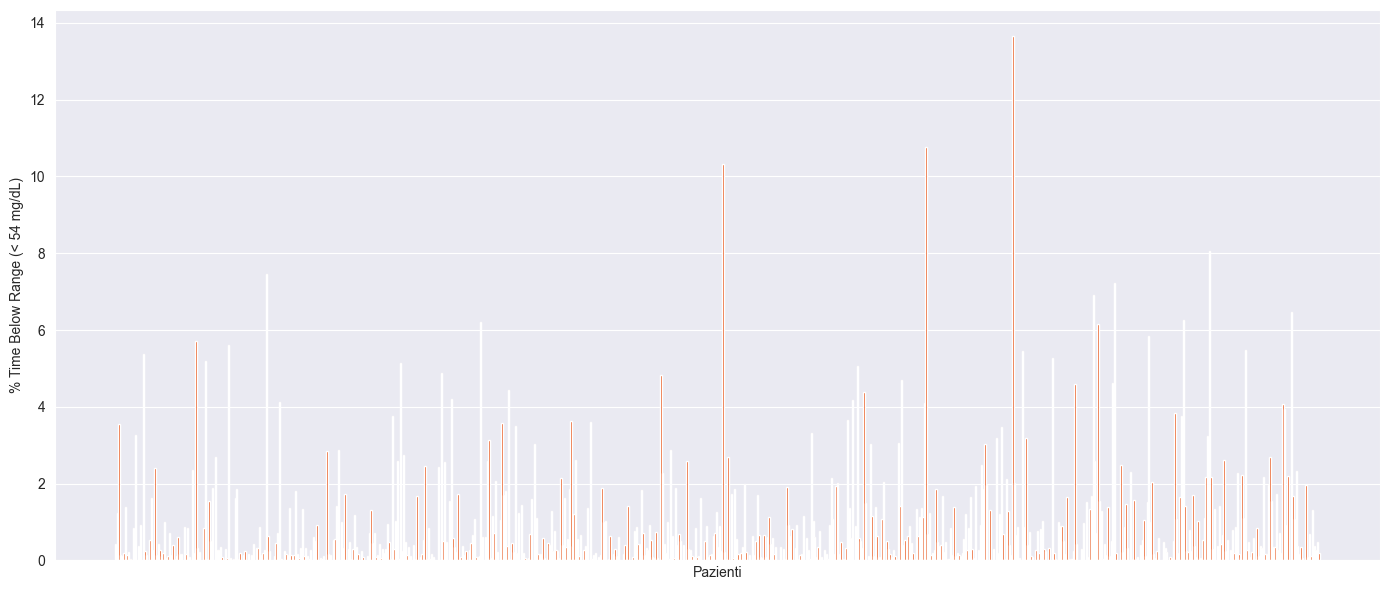

count    736.000000
mean       0.889286
std        1.429142
min        0.000000
25%        0.099240
50%        0.337024
75%        1.058319
max       13.652174
Name: %TBRLV2, dtype: float64


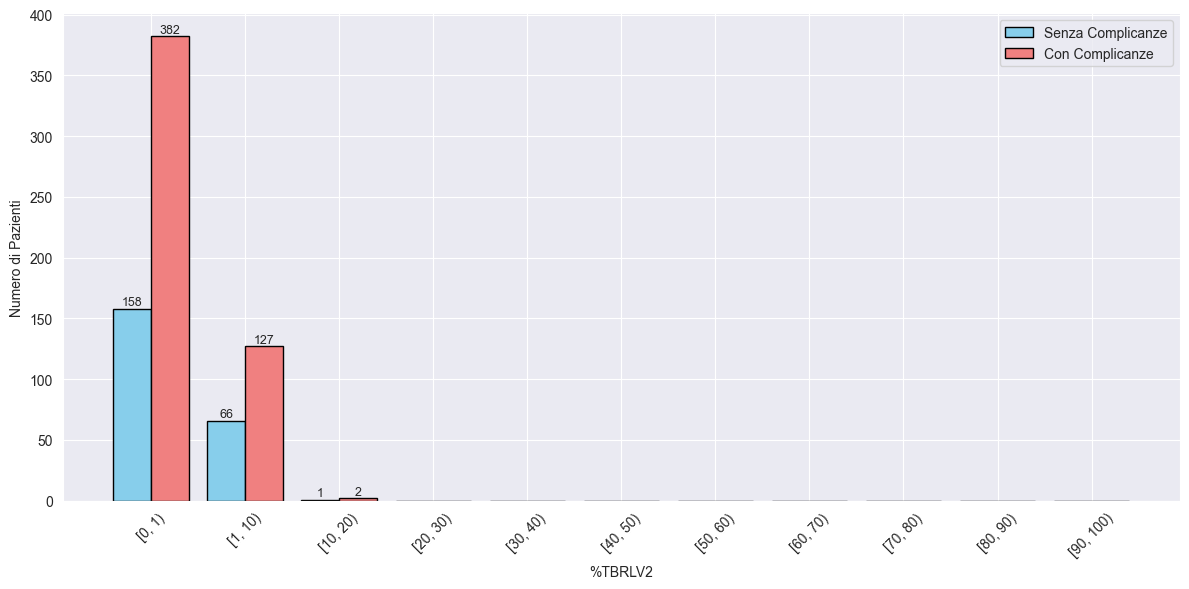

Q1 = 0.10%, Q3 = 1.06%, IQR = 0.96%
Soglia inferiore = -1.34%, soglia superiore = 2.50%
Valori TBRLV2 considerati outlier:
[2.5526483726866624, 2.5771183131589224, 2.589671401861125, 2.597584948048301, 2.6018808777429467, 2.6037029076729405, 2.6134425110883654, 2.6891081447088414, 2.7027027027027026, 2.7042381547551413, 2.7559055118110236, 2.8508077288565095, 2.8660017061486975, 2.8859660324351935, 3.0264817150063053, 3.0268869222507258, 3.040150044708089, 3.0543230086589412, 3.12540248143219, 3.1866162119099783, 3.1961646024770274, 3.232049545190633, 3.2661175802328883, 3.3271719038817005, 3.473639455782313, 3.504825054762892, 3.555479216763999, 3.5793161221536822, 3.606643817558661, 3.6198401401511004, 3.650149154789526, 3.7582069277790358, 3.7672100684179406, 3.833380183444212, 3.951686571708901, 4.069050554870531, 4.100838304046429, 4.136307588835332, 4.173627131227958, 4.195817418598495, 4.392471321973494, 4.432652409830833, 4.6080000000000005, 4.626559292594347, 4.698917768939044

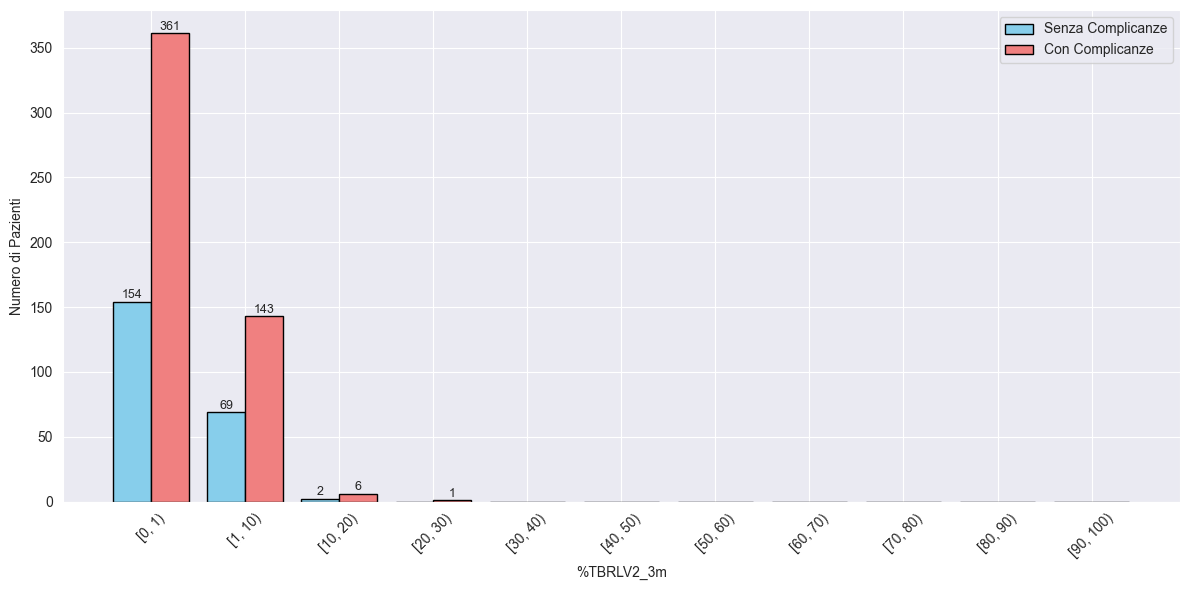

count    736.000000
mean       1.177414
std        2.162856
min        0.000000
25%        0.080005
50%        0.358561
75%        1.313960
max       25.065274
Name: %TBRLV2_3m, dtype: float64


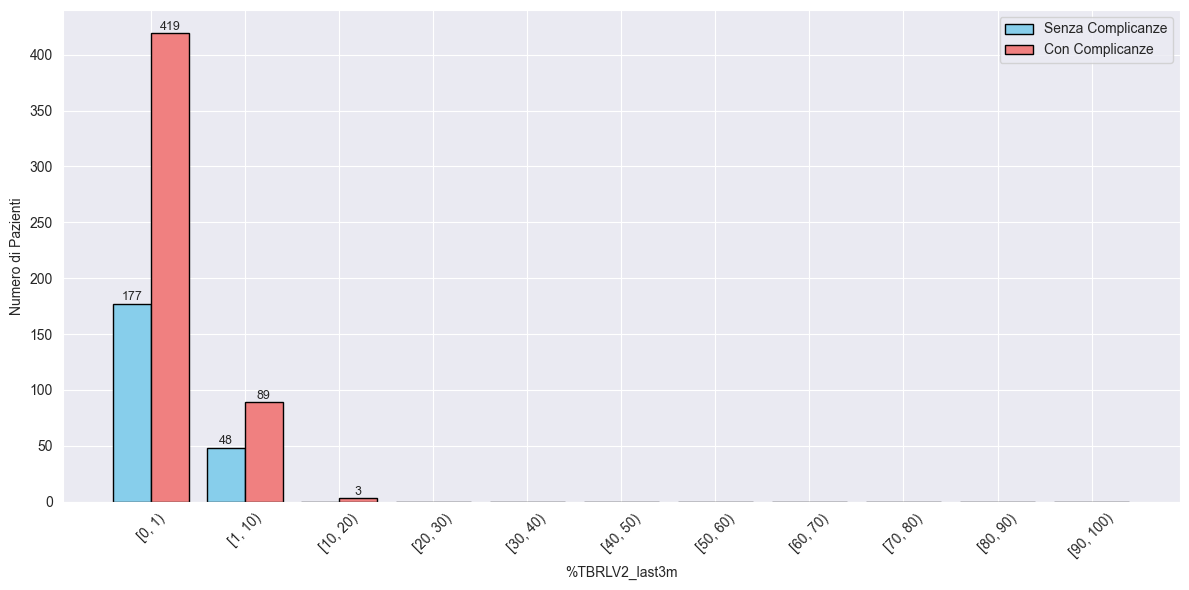

count    736.000000
mean       0.697476
std        1.345893
min        0.000000
25%        0.025985
50%        0.214082
75%        0.689269
max       11.890328
Name: %TBRLV2_last3m, dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

df = pd.read_csv("Excel/Glucose_measurements.csv")
diagnostics = pd.read_csv("Excel/Diagnostics.csv")

# ANALISI TBR LV2
############################################################################################
# Funzione per calcolare il TBRLV2 di un paziente
def calculate_tbr(misurazioni): # Prende in ingresso l'insieme di misurazioni di un singolo paziente
    totale = len(misurazioni)   # Calcola il numero totale di misurazioni del paziente
    righe_valide = misurazioni[(misurazioni['Measurement'] < 54)] # Seleziona solo le righe che nel campo Measurement hanno un valore minore di 54 mg/dL
    tbr = len(righe_valide)/totale * 100 # Calcola il %TBRLV2 facendo Misurazioni Valide/Misurazioni Totali
    return tbr

pazienti = df.groupby('Patient_ID') # Dividiamo il dataset per paziente, ogni gruppo contiene le misurazioni di un singolo paziente
tbr_by_paziente = pazienti.apply(calculate_tbr, include_groups=False).reset_index(name='%TBRLV2') # Calcoliamo il TBRLV2 di ogni paziente e creiamo un nuovo dataset con 2 colonne: Ptient_ID e %TBRLV2
# tbr_by_paziente = tbr_by_paziente.sort_values(by='%TBRLV2', ascending=False)
print(tbr_by_paziente)

# Grafico per la percentuale di ogni paziente
plt.figure(figsize=(14, 6))
plt.bar(tbr_by_paziente['Patient_ID'], tbr_by_paziente['%TBRLV2'], color='#e64100')
plt.xticks([])
plt.ylabel('% Time Below Range (< 54 mg/dL)')
plt.xlabel('Pazienti')
plt.title('')
plt.tight_layout()
plt.show()

# Statistiche descrittive di %TBRLV2
print(tbr_by_paziente['%TBRLV2'].describe())

bins = [0, 1] + list(range(10, 110, 10))
tbr_intervals = pd.cut(tbr_by_paziente['%TBRLV2'], bins=bins, right=False)
#Notazione [0,10) 0 é incluso ma 10 no

# Aggiungiamo colonna per sapere se il paziente ha almeno una diagnosi
pazienti_con_diagnosi = set(diagnostics['Patient_ID'])
tbr_by_paziente['Has_Diagnosis'] = tbr_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)

# Aggiungiamo anche gli intervalli nel dataframe
tbr_by_paziente['Interval'] = tbr_intervals

# Calcoliamo il numero di pazienti CON e SENZA diagnosi per ogni intervallo
conta_per_interval = tbr_by_paziente.groupby(['Interval', 'Has_Diagnosis'], observed=False).size().unstack(fill_value=0)
conta_per_interval = conta_per_interval.sort_index()

# Istogramma con due barre affiancate per ogni intervallo, con etichette
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = range(len(conta_per_interval))

bar1 = plt.bar([i - bar_width/2 for i in index], conta_per_interval[False], width=bar_width, label='Senza Complicanze', color='skyblue', edgecolor='black')
bar2 = plt.bar([i + bar_width/2 for i in index], conta_per_interval[True], width=bar_width, label='Con Complicanze', color='lightcoral', edgecolor='black')

# Aggiunta delle etichette numeriche sopra ogni barra
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)), ha='center', va='bottom', fontsize=9)


plt.xticks(index, [str(i) for i in conta_per_interval.index], rotation=45)
plt.xlabel('%TBRLV2')
plt.ylabel('Numero di Pazienti')
plt.title('')
plt.legend()
plt.tight_layout()
plt.show()


tbr_values = tbr_by_paziente['%TBRLV2']

# Statistiche descrittive
media = tbr_values.mean()
mediana = tbr_values.median()
asimmetria = skew(tbr_values) #skewness
curtosi = kurtosis(tbr_values)

tar_arrotondato = tbr_values.round()
moda = tar_arrotondato.mode()

# Outlier con metodo IQR (Interquartile Range)
# calcola Q1, Q3 e IQR
q1 = tbr_values.quantile(0.25)
q3 = tbr_values.quantile(0.75)
iqr = q3 - q1

# soglie per outlier
lower_thr = q1 - 1.5 * iqr
upper_thr = q3 + 1.5 * iqr

print(f"Q1 = {q1:.2f}%, Q3 = {q3:.2f}%, IQR = {iqr:.2f}%")
print(f"Soglia inferiore = {lower_thr:.2f}%, soglia superiore = {upper_thr:.2f}%")
outliers = tbr_values[(tbr_values < lower_thr) | (tbr_values > upper_thr)]
print("Valori TBRLV2 considerati outlier:")
print(outliers.sort_values().to_list())



# Output
print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Asimmetria (skewness): {asimmetria:.2f}")
print(f"Curtosi (kurtosis): {curtosi:.2f}")
print(f"Numero di outlier: {len(outliers)}")
print("Moda:", moda.tolist())



# ------------------------------------------------------------------------------------------------
# CALCOLO TBR SUI PRIMI 3 MESI
# ------------------------------------------------------------------------------------------------

# 1) Converto Measurement_date in datetime
df['Measurement_date'] = pd.to_datetime(df['Measurement_date'])

# 2) Calcolo la prima data di misurazione per ogni paziente
first_dates = df.groupby('Patient_ID')['Measurement_date'].min().rename('FirstDate')
df = df.join(first_dates, on='Patient_ID')

# 3) Seleziono misurazioni entro 3 mesi dalla data iniziale
df_3m = df[df['Measurement_date'] <= df['FirstDate'] + pd.DateOffset(months=3)]

# 4) Calcolo il TIR sui primi 3 mesi
pazienti_3m = df_3m.groupby('Patient_ID')
tbr3m_by_paziente = pazienti_3m.apply(calculate_tbr, include_groups=False).reset_index(name='%TBRLV2_3m')

# 5) Aggiungo il flag di diagnosi
tbr3m_by_paziente['Has_Diagnosis'] = tbr3m_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)

# 6) Creo gli stessi intervalli usati prima su %TIR_3m
tbr3m_by_paziente['Interval'] = pd.cut(tbr3m_by_paziente['%TBRLV2_3m'], bins=bins, right=False)

# 7) Raggruppo e conto
conta_per_interval_3m = tbr3m_by_paziente.groupby(['Interval', 'Has_Diagnosis'], observed=False).size().unstack(fill_value=0).sort_index()

# 8) Disegno l’istogramma a barre affiancate
plt.figure(figsize=(12, 6))
bar_width = 0.4
index_3m = range(len(conta_per_interval_3m))

bar1_3m = plt.bar([i - bar_width/2 for i in index_3m], conta_per_interval_3m[False],
                   width=bar_width, label='Senza Complicanze', color='skyblue', edgecolor='black')
bar2_3m = plt.bar([i + bar_width/2 for i in index_3m], conta_per_interval_3m[True],
                   width=bar_width, label='Con Complicanze', color='lightcoral', edgecolor='black')

for bars in (bar1_3m, bar2_3m):
    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(bar.get_x() + bar.get_width()/2, h + 0.5, str(int(h)),
                     ha='center', va='bottom', fontsize=9)

plt.xticks(index_3m, [str(i) for i in conta_per_interval_3m.index], rotation=45)
plt.xlabel('%TBRLV2_3m')
plt.ylabel('Numero di Pazienti')
plt.title('')
plt.legend()
plt.tight_layout()
plt.show()

# 9) Statistiche descrittive per %TIR_3m (facoltativo)
print(tbr3m_by_paziente['%TBRLV2_3m'].describe())



# ------------------------------------------------------------------------------------------------
# CALCOLO TBR SUGLI ULTIMI 3 MESI
# ------------------------------------------------------------------------------------------------

# 1) Converto Measurement_date in datetime
df['Measurement_date'] = pd.to_datetime(df['Measurement_date'])

# 2) Calcolo l'ultima data di misurazione per ogni paziente
first_dates = df.groupby('Patient_ID')['Measurement_date'].max().rename('LastDate')
df = df.join(first_dates, on='Patient_ID')

# 3) Seleziono misurazioni entro 3 mesi dalla data finale
df_3m = df[df['Measurement_date'] >= df['LastDate'] - pd.DateOffset(months=3)]

# 4) Calcolo il TIR sugli ultimi 3 mesi
pazienti_3m = df_3m.groupby('Patient_ID')
tbr3m_by_paziente = pazienti_3m.apply(calculate_tbr, include_groups=False).reset_index(name='%TBRLV2_last3m')

# 5) Aggiungo il flag di diagnosi
tbr3m_by_paziente['Has_Diagnosis'] = tbr3m_by_paziente['Patient_ID'].isin(pazienti_con_diagnosi)

# 6) Creo gli stessi intervalli usati prima su %TIR_3m
tbr3m_by_paziente['Interval'] = pd.cut(tbr3m_by_paziente['%TBRLV2_last3m'], bins=bins, right=False)

# 7) Raggruppo e conto
conta_per_interval_3m = tbr3m_by_paziente.groupby(['Interval', 'Has_Diagnosis'], observed=False).size().unstack(fill_value=0).sort_index()

# 8) Disegno l’istogramma a barre affiancate
plt.figure(figsize=(12, 6))
bar_width = 0.4
index_3m = range(len(conta_per_interval_3m))

bar1_3m = plt.bar([i - bar_width/2 for i in index_3m], conta_per_interval_3m[False],
                   width=bar_width, label='Senza Complicanze', color='skyblue', edgecolor='black')
bar2_3m = plt.bar([i + bar_width/2 for i in index_3m], conta_per_interval_3m[True],
                   width=bar_width, label='Con Complicanze', color='lightcoral', edgecolor='black')

for bars in (bar1_3m, bar2_3m):
    for bar in bars:
        h = bar.get_height()
        if h > 0:
            plt.text(bar.get_x() + bar.get_width()/2, h + 0.5, str(int(h)),
                     ha='center', va='bottom', fontsize=9)

plt.xticks(index_3m, [str(i) for i in conta_per_interval_3m.index], rotation=45)
plt.xlabel('%TBRLV2_last3m')
plt.ylabel('Numero di Pazienti')
plt.title('')
plt.legend()
plt.tight_layout()
plt.show()

# 9) Statistiche descrittive per %TIR_3m (facoltativo)
print(tbr3m_by_paziente['%TBRLV2_last3m'].describe())
############################################################################################
############################################################################################

In [ ]:
import pandas as pd
from datetime import timedelta
from tqdm import tqdm


#CREAZIONE DATASET CON DATA E VALORE DEI PARAMETRI BIOCHIMICI E NUMERO DI MISURAZIONI DEL GLUCOSIO CON RELATIVO VALORE MEDIO FATTO IN UN INTORNO DI 3 GIORNI DA QUELLA DATA
############################################################################################
# Carica e prepara i dati
df_glucose = pd.read_csv("Excel/Glucose_measurements.csv", parse_dates=["Measurement_date"])
df_bio = pd.read_csv("Excel/Biochemical_parameters.csv", parse_dates=["Reception_date"])

records = []

# Ottieni i pazienti presenti in entrambi i dataset
common_patients = set(df_bio['Patient_ID']).intersection(set(df_glucose['Patient_ID']))

# Loop per paziente
for pid in tqdm(common_patients): #per ogni paziente in comune, mostrando la barra di avanzamento
    glucose_p = df_glucose[df_glucose['Patient_ID'] == pid].copy() #prendi tutte le righe di glucosio e di parametri biochimici per quel paziente
    bio_p = df_bio[df_bio['Patient_ID'] == pid].copy()

    # Ordina le misurazioni di glucosio cronologicamente
    glucose_p.sort_values("Measurement_date", inplace=True)

    #per ogni parametro biochimico del paziente estrae la data ed il valore
    for _, bio_row in bio_p.iterrows():
        reception_date = bio_row["Reception_date"]
        param_name = bio_row["Name"]
        param_value = bio_row["Value"]

        # Trova misurazioni di glucosio entro ±3 giorni
        # Costruisce una mask che é TRUE per tutte le righe in glucose_p la cui data é compresa entro 3 giorni da reception_date di bio_p
        mask = (
                (glucose_p["Measurement_date"] >= reception_date - timedelta(days=3)) &
                (glucose_p["Measurement_date"] <= reception_date + timedelta(days=3))
        )
        #crea un sotto-dataset contenente solo le letture di glucosio che rispettano la mashera, cioe l'intervallo di 3 giorni
        nearby = glucose_p[mask]

        #se il dataframe creato non é vuoto si aggiungono anche gli altri parametri e si fa l'append di questo a records definito prima
        if not nearby.empty:
            records.append({
                "Patient_ID": pid,
                "Parameter": param_name,
                "Parameter_Value": param_value,
                "Reception_Date": reception_date,
                "Avg_Glucose": nearby["Measurement"].mean(),
                "Num_Glucose_Readings": len(nearby)
            })

# 1) Trasforma records in DataFrame
df_results = pd.DataFrame(records)

# 2) Salvalo in CSV nella cartella Excel
output_path = "Excel/glucose_bio_correlated.csv"
df_results.to_csv(output_path, index=False)

print(f"Saved {len(df_results)} rows to {output_path}")
############################################################################################

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#SCATTERPLOT - RELAZIONE TRA VALORI DI GLUCOSIO E VALORI DELLE ANALISI FATTE
############################################################################################
df2 = pd.read_csv("Excel/glucose_bio_correlated.csv", parse_dates=["Reception_Date"])
diagnostics = pd.read_csv("Excel/Diagnostics.csv")

max_param_value = df2["Parameter_Value"].max()  #Valore massimo
row_max_param = df2.loc[df2["Parameter_Value"].idxmax()] #Indice di riga del valore massimo, .loc estrae l'intera riga

max_avg_glucose = df2["Avg_Glucose"].max()
row_max_gluc = df2.loc[df2["Avg_Glucose"].idxmax()]

#Stampa dei valori massimi e relativi indici di riga
print(f"Massimo Parameter_Value: {max_param_value}")
print("Record corrispondente:")
print(row_max_param)
print(f"\nMassimo Avg_Glucose: {max_avg_glucose}")
print("Record corrispondente:")
print(row_max_gluc)

# trasforma la colonna Patient_ID di diagnostics in un insieme e crea una nuova colonna di booleani
# se il paziente preso in considerazione si trova nel dataset diagnostics allora la nuova colonna Has_Diagnosis diventa True, altrimenti False
diagnosed_patients = set(diagnostics["Patient_ID"])
df2["Has_Diagnosis"] = df2["Patient_ID"].isin(diagnosed_patients)

#Preparazione diagrammi, n indica il numero di diagrammi da stampare (17), e poi vengono messe righe e colonne
params = df2["Parameter"].unique()
n = len(params)
cols = 4
rows = (n + cols - 1) // cols

#Calcoliamo minimi e massimi dei valori che dobbiamo rappresentare sugli scatterplot, in modo che nelle 3 rappresentazioni differenti
#l'asse delle scisse e quella delle ordinate abbia sempre gli stessi valori
limits = {}
for param in params:
    sub = df2[df2["Parameter"] == param]
    x_min, x_max = sub["Parameter_Value"].min(), sub["Parameter_Value"].max()
    y_min, y_max = sub["Avg_Glucose"].min(), sub["Avg_Glucose"].max()
    x_pad = (x_max - x_min) * 0.05
    y_pad = (y_max - y_min) * 0.05
    limits[param] = {
        "xlim": (x_min - x_pad, x_max + x_pad),
        "ylim": (y_min - y_pad, y_max + y_pad)
    }

#Funzione di plot per gruppi, con limiti fissi
def plot_group(df_subset, title, blue=True, red=True):
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = axes.flatten()
    for ax, param in zip(axes, params):
        sub = df_subset[df_subset["Parameter"] == param]
        if blue:
            ax.scatter(
                sub[~sub["Has_Diagnosis"]]["Parameter_Value"], #Seleziona solo le righe di sub con pazienti senza complicanze
                sub[~sub["Has_Diagnosis"]]["Avg_Glucose"],
                facecolors='none', edgecolors='blue', marker='o',
                linewidths=1, label='No Complicanze'
            )
        if red:
            ax.scatter(
                sub[sub["Has_Diagnosis"]]["Parameter_Value"], #Seleziona solo le righe di sub con pazienti con complicanze
                sub[sub["Has_Diagnosis"]]["Avg_Glucose"],
                facecolors='none', edgecolors='red', marker='o',
                linewidths=1, label='Con Complicanze'
            )
        # Applica limiti calcolati
        ax.set_xlim(limits[param]["xlim"])
        ax.set_ylim(limits[param]["ylim"])
        ax.set_title(param, fontsize=8)
        ax.set_xlabel("Param value", fontsize=6)
        ax.set_ylabel("Avg Glucose", fontsize=6)
        ax.legend(fontsize=6)
    # Nascondi assi in eccesso
    for ax in axes[n:]:
        ax.set_visible(False)
    fig.suptitle(title, fontsize=12, y=1.02)
    plt.tight_layout()
    return fig

#Figura 1: combinato blu+rosso
plot_group(df2, "Tutti i pazienti: Con e Senza complicanze", blue=True, red=True)

#Figura 2: solo CON diagnosi (rosso)
plot_group(df2, "Solo pazienti CON complicanze", blue=False, red=True)

#Figura 3: solo SENZA diagnosi (blu)
plot_group(df2, "Solo pazienti SENZA complicanze", blue=True, red=False)

plt.show()
############################################################################################

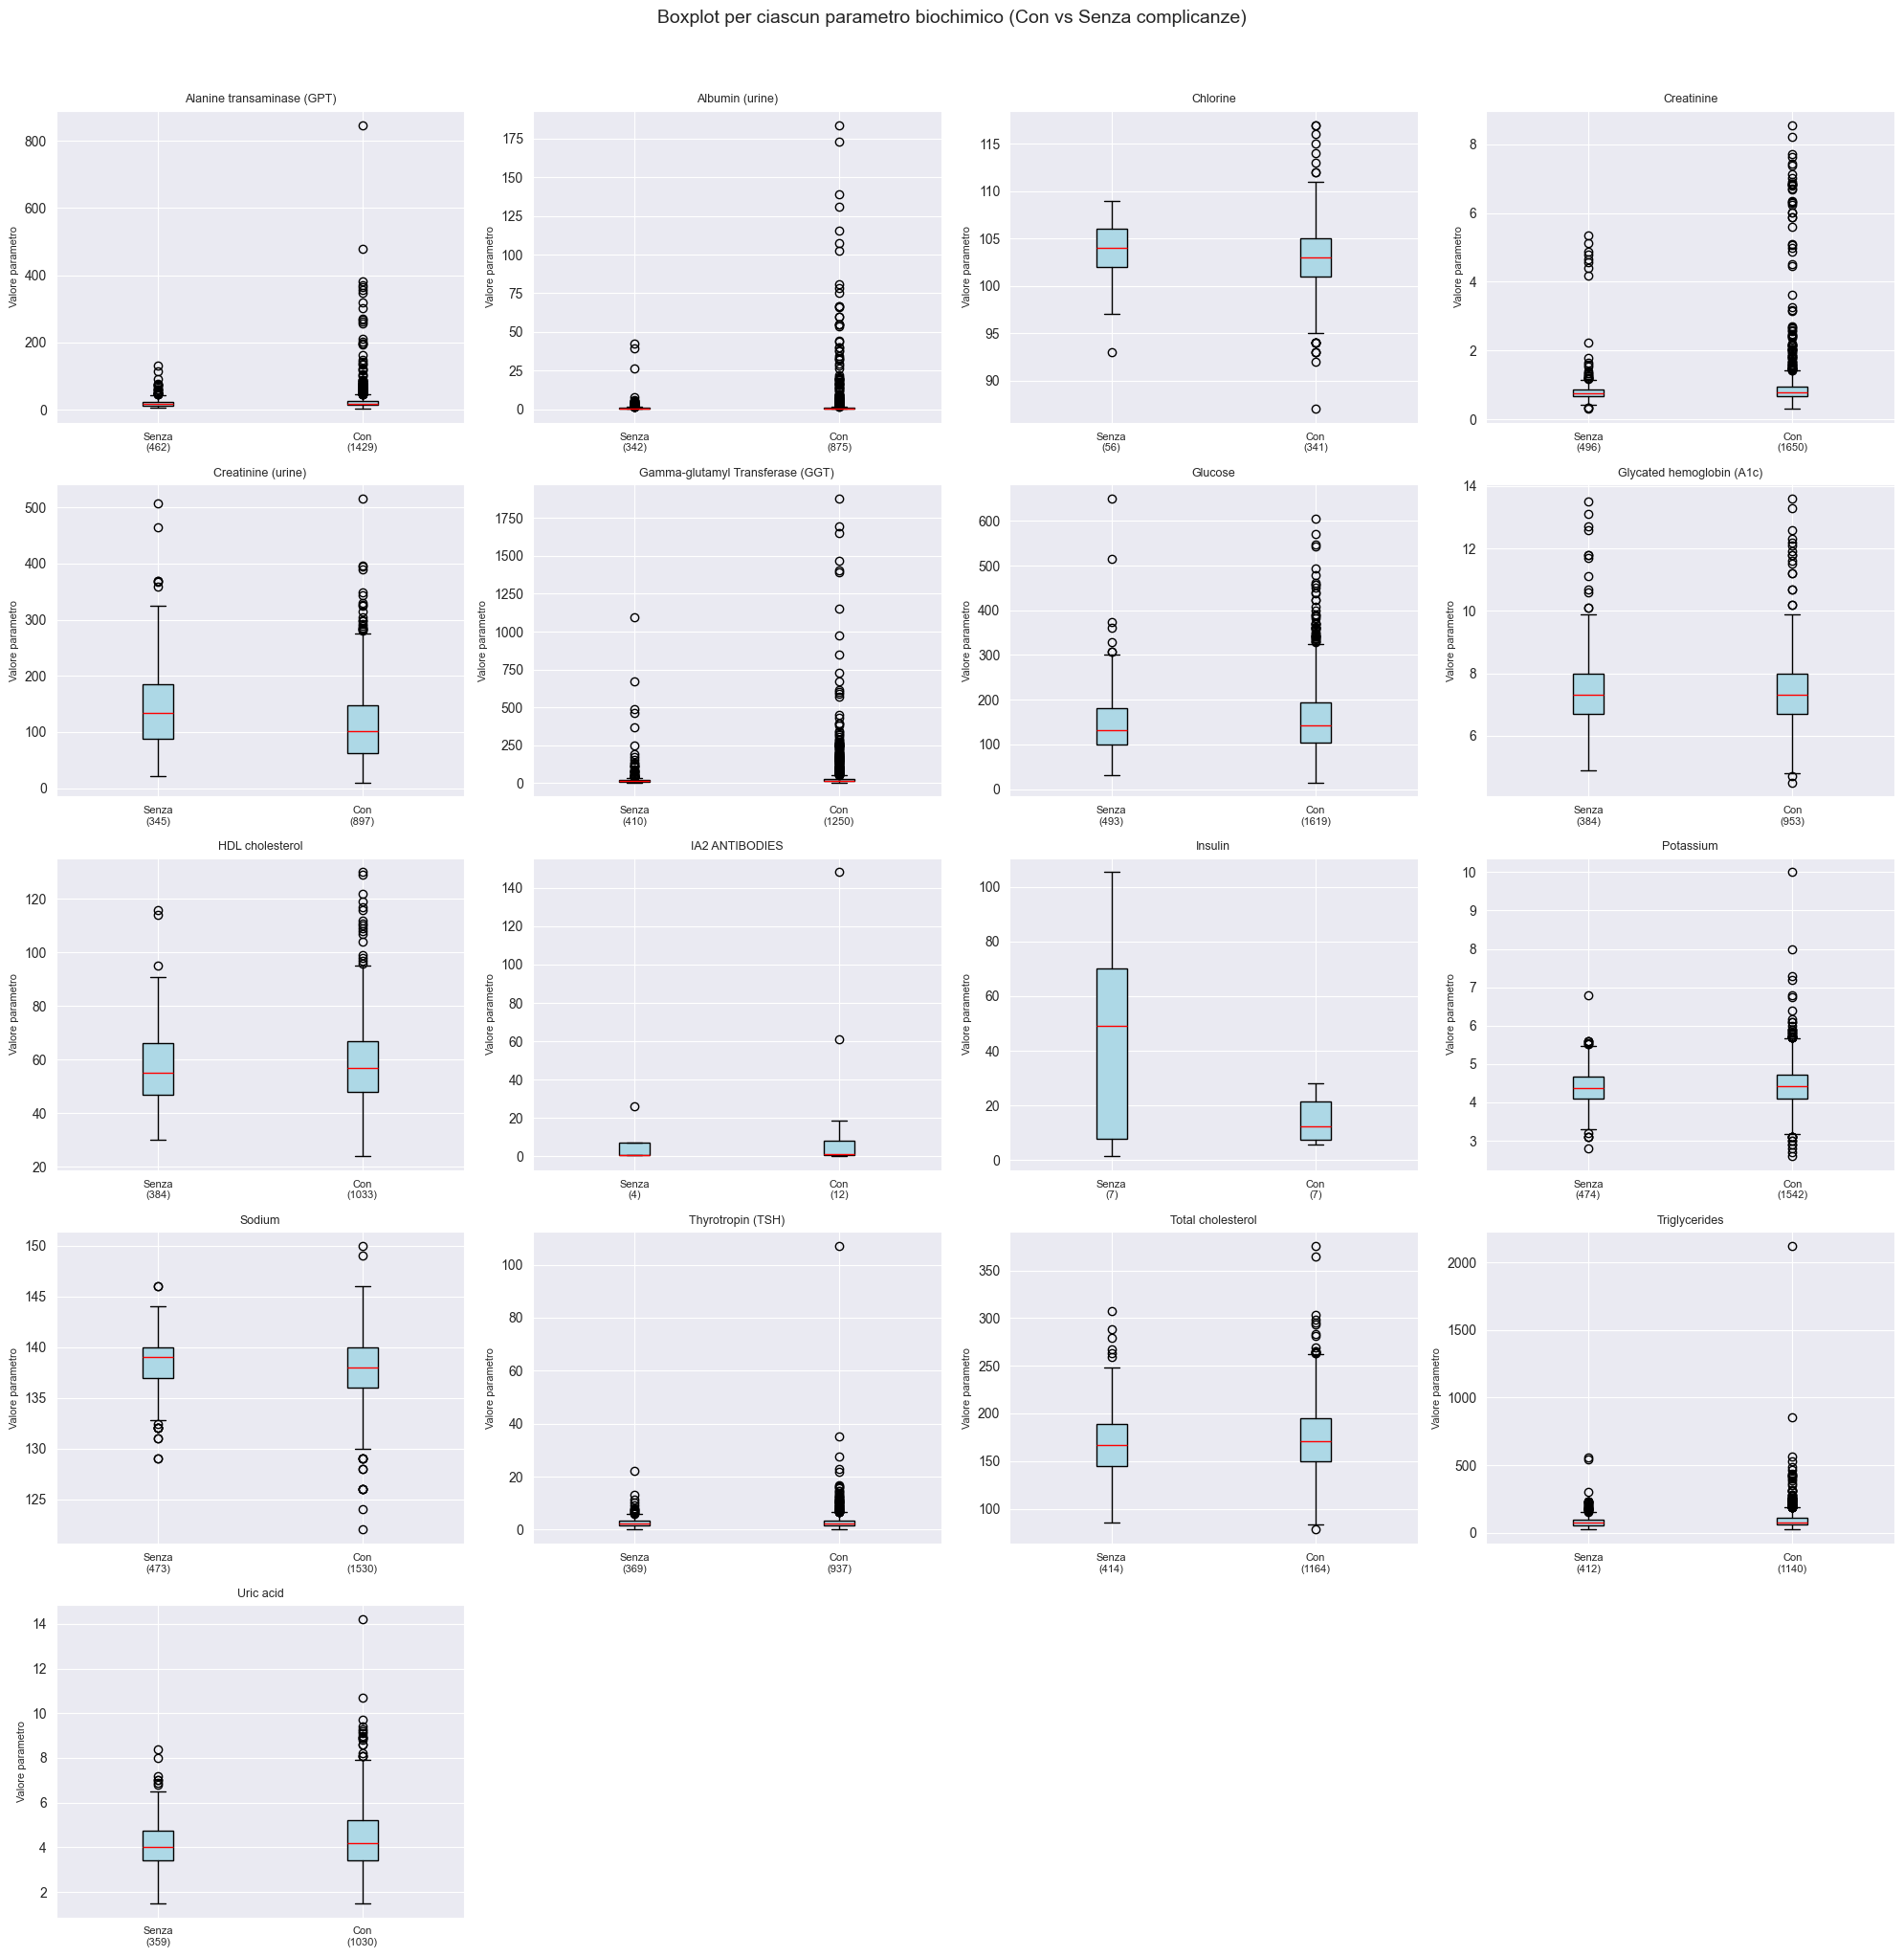

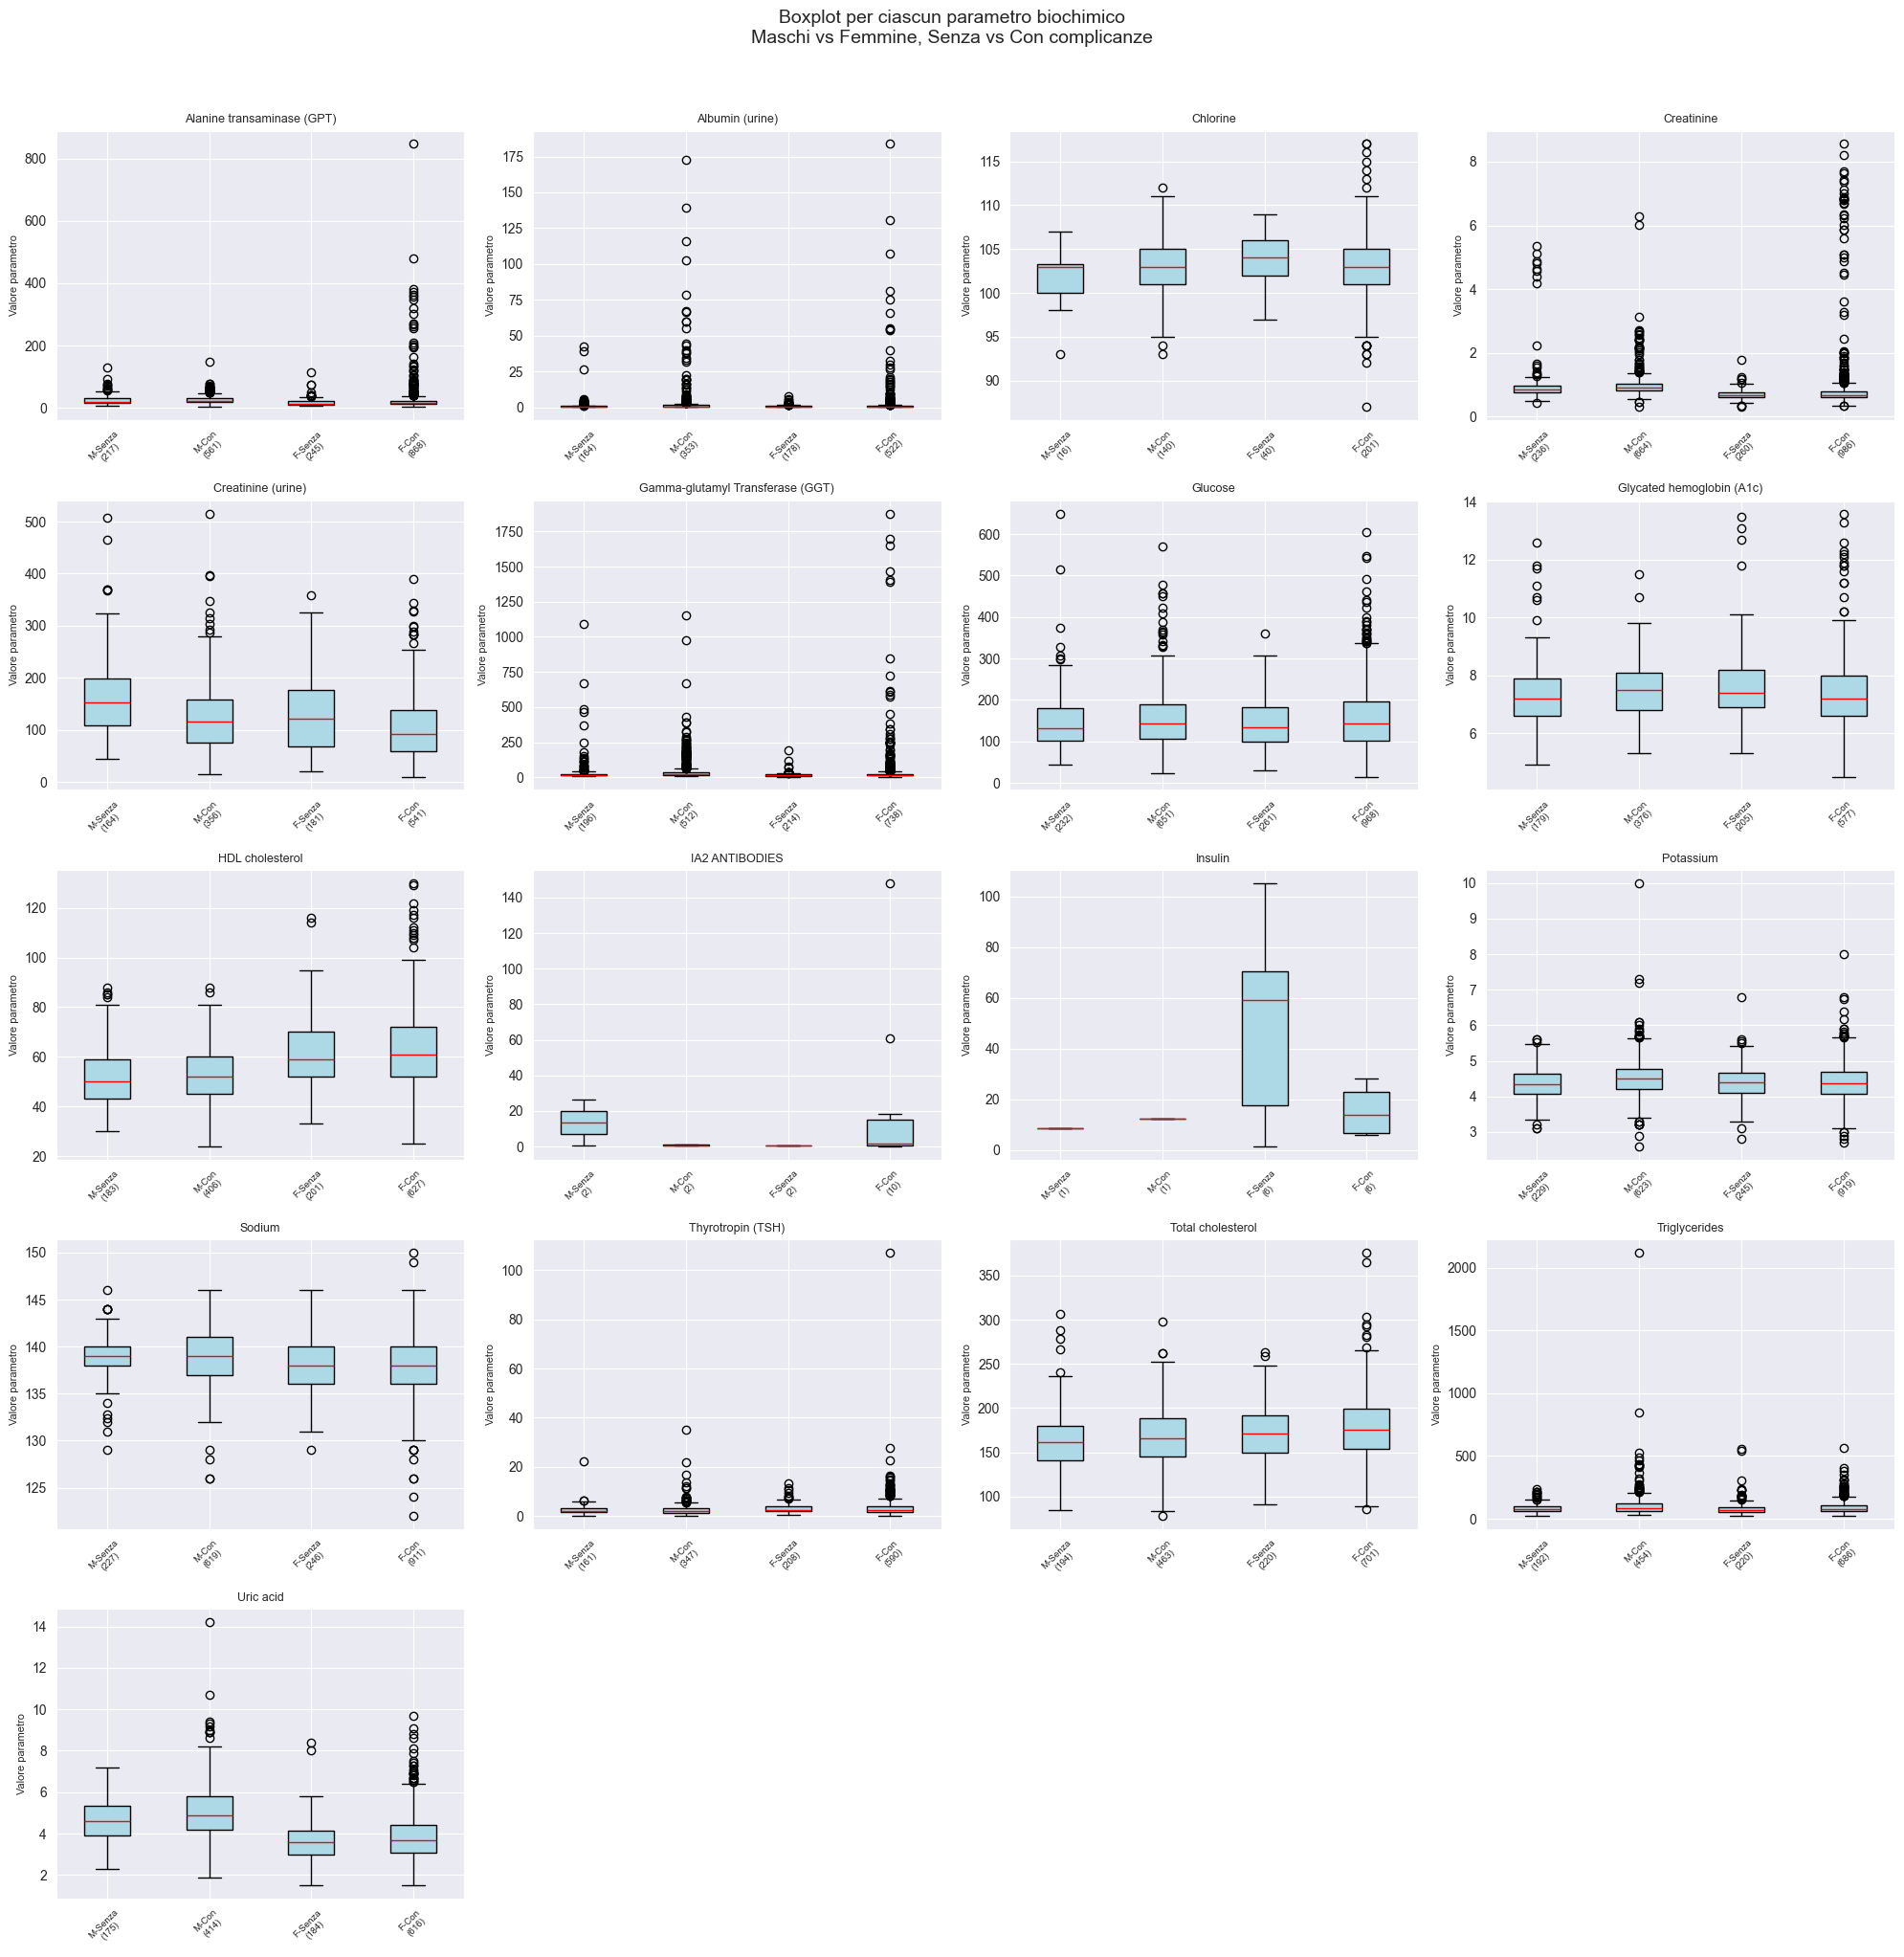

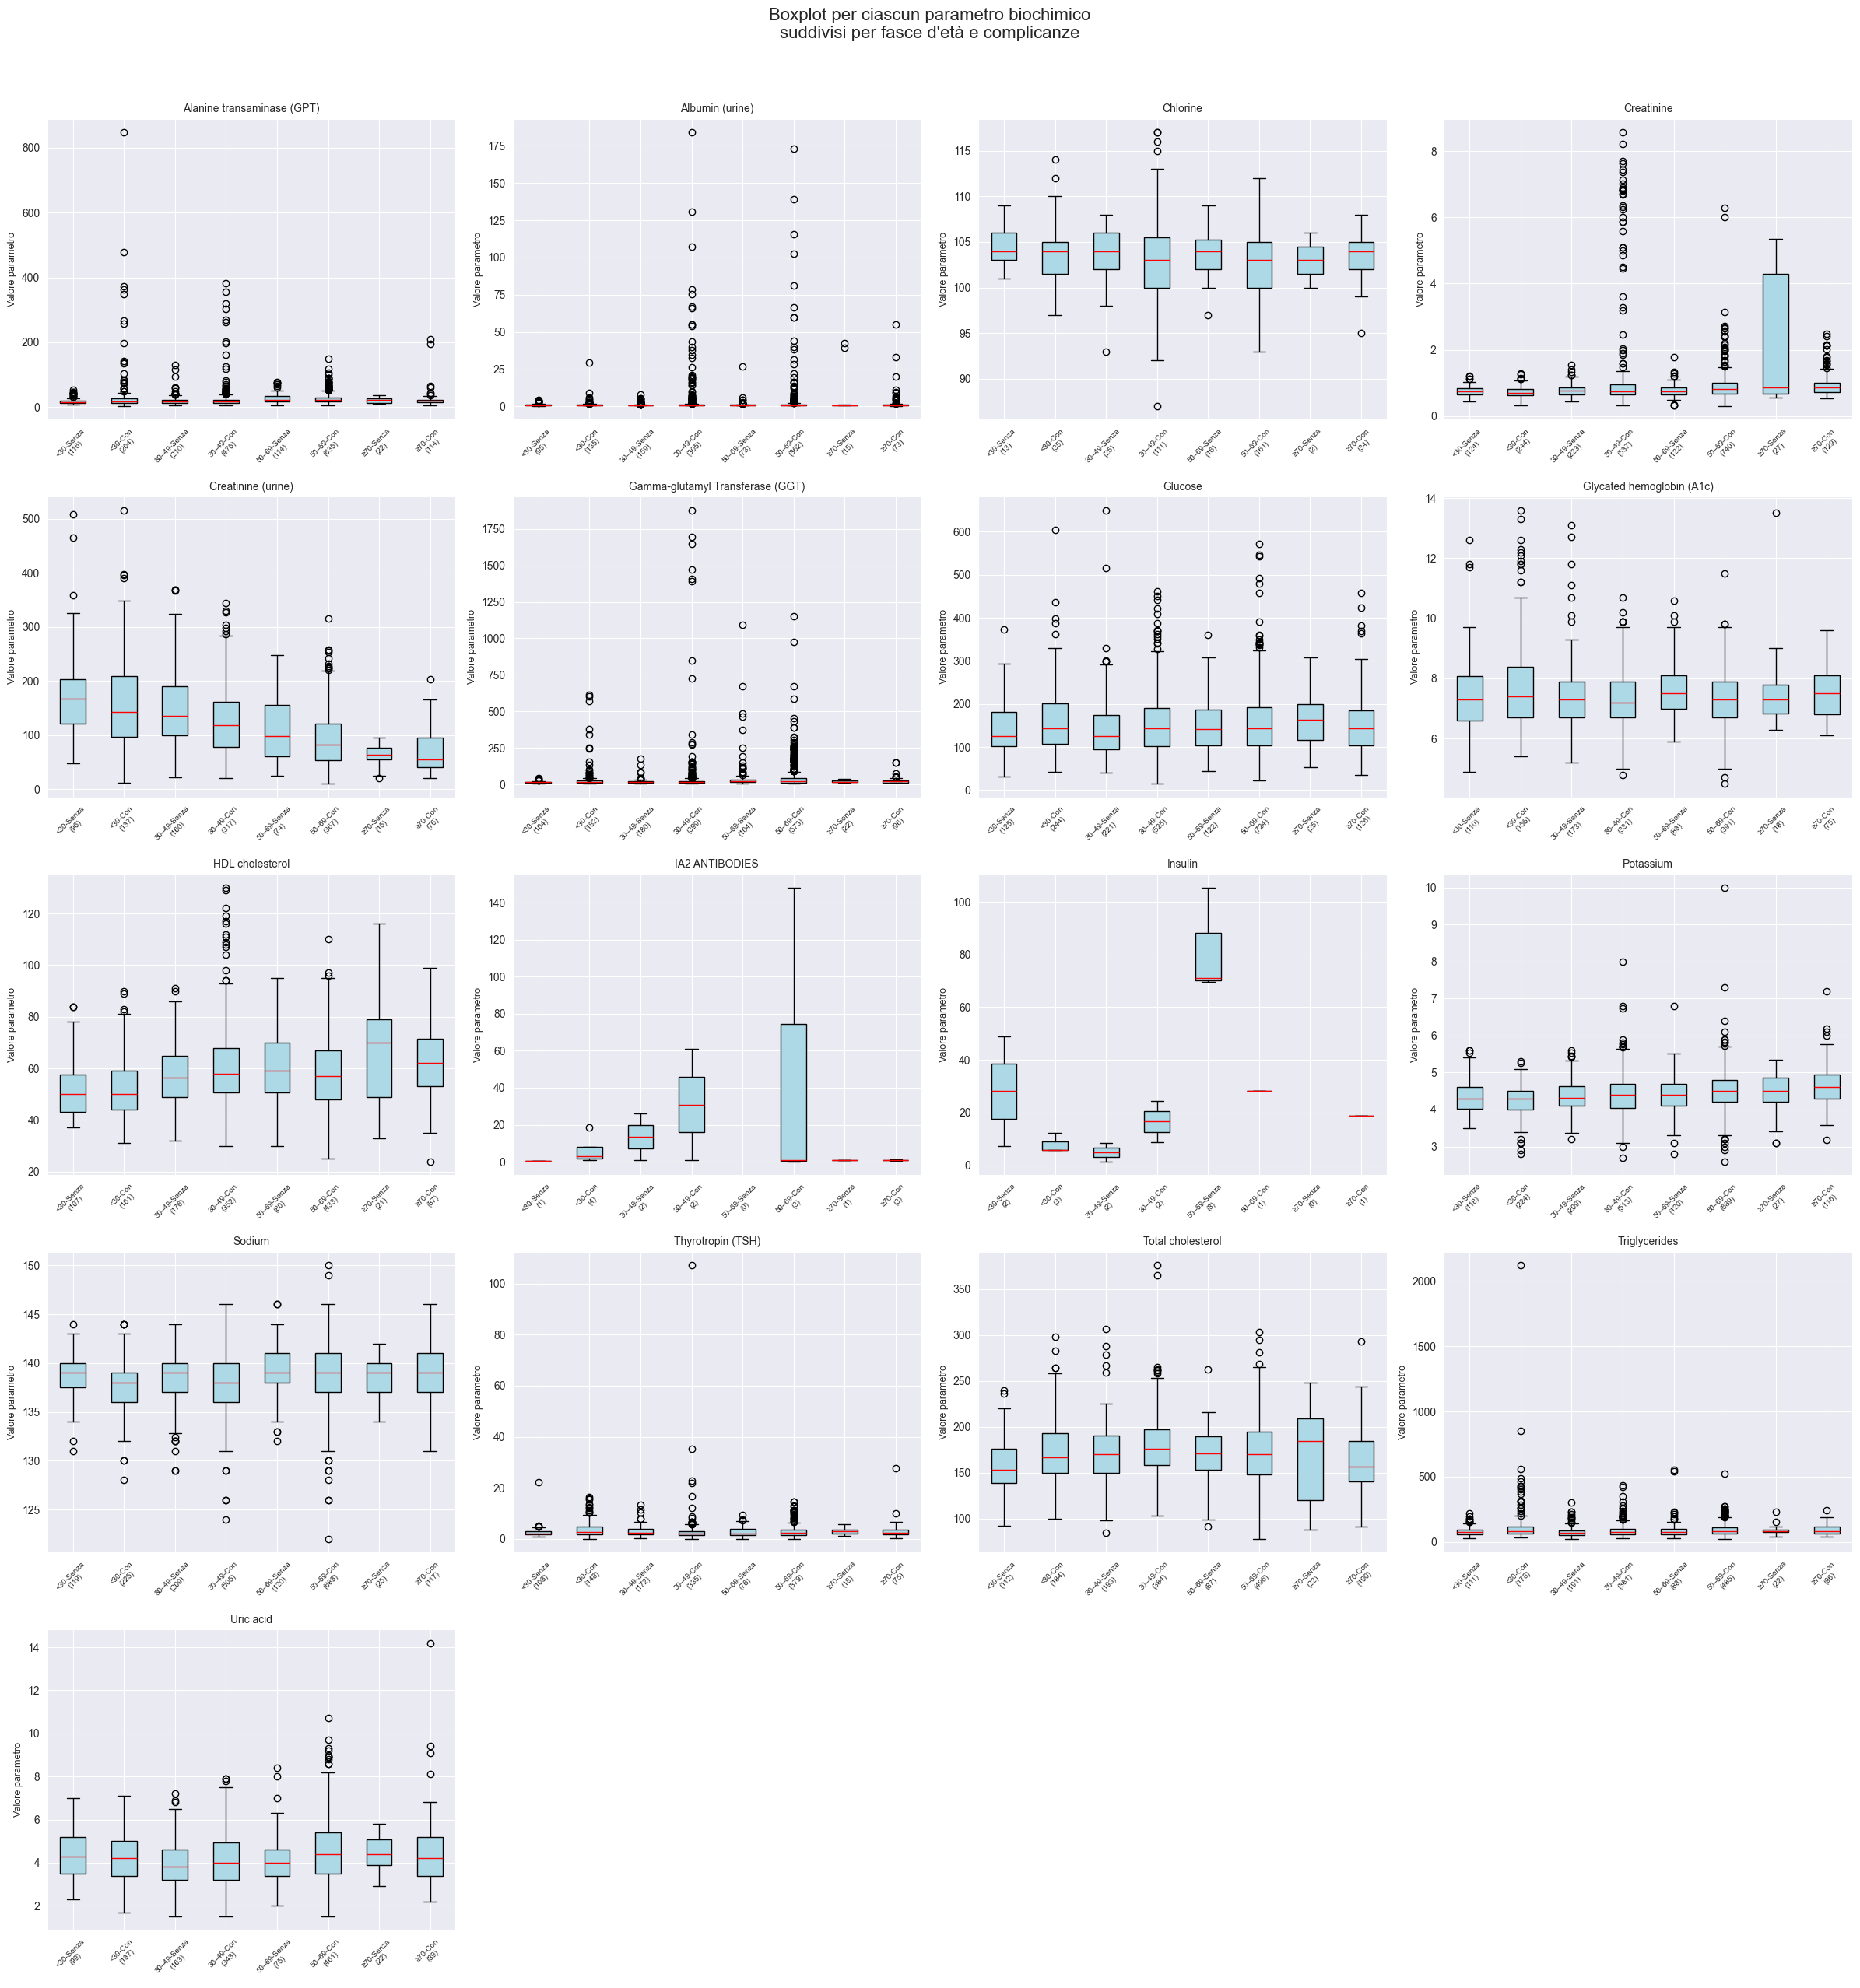

                       Parameter  Has_Diagnosis  count       mean        std  median      q25      q75     IQR
      Alanine transaminase (GPT)          False    462  21.202165  13.935334  17.500  13.0000  25.0000 12.0000
      Alanine transaminase (GPT)           True   1429  26.684605  40.653041  19.000  14.0000  27.0000 13.0000
                 Albumin (urine)          False    342   1.392339   3.470868   0.700   0.7000   1.0100  0.3100
                 Albumin (urine)           True    875   4.095566  15.035588   0.700   0.7000   1.1950  0.4950
                        Chlorine          False     56 103.500000   3.057034 104.000 102.0000 106.0000  4.0000
                        Chlorine           True    341 102.944282   3.988196 103.000 101.0000 105.0000  4.0000
                      Creatinine          False    496   0.839415   0.535838   0.760   0.6600   0.8625  0.2025
                      Creatinine           True   1650   0.942618   0.831057   0.780   0.6600   0.9600  0.3000
 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

#BOXPLOT - RELAZIONE TRA VALORI DELLE ANALISI FATTE E COMPLICANZE - COMPLESSIVO
############################################################################################

df2 = pd.read_csv("Excel/glucose_bio_correlated.csv", parse_dates=["Reception_Date"])
diagnostics = pd.read_csv("Excel/Diagnostics.csv")


df2["Has_Diagnosis"] = df2["Patient_ID"].isin(diagnostics["Patient_ID"])

# Parametri in ordine alfabetico
params = sorted(df2["Parameter"].unique())
n = len(params)

cols = 4
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, param in enumerate(params):
    sub = df2[df2["Parameter"] == param]
    no_diag = sub[~sub["Has_Diagnosis"]]["Parameter_Value"]
    yes_diag = sub[sub["Has_Diagnosis"]]["Parameter_Value"]
    data_to_plot = [no_diag, yes_diag]

    # conteggi
    counts = [len(no_diag), len(yes_diag)]
    tick_labels = [f"Senza\n({counts[0]})", f"Con\n({counts[1]})"]

    # qui uso labels= e non l'argomento posizionale
    bp = axes[i].boxplot(
        data_to_plot,
        tick_labels=tick_labels,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue'),
        medianprops=dict(color='red')
    )
    axes[i].set_title(param, fontsize=9)
    axes[i].set_ylabel("Valore parametro", fontsize=8)
    axes[i].tick_params(axis='x', labelsize=8)

# Nasconde eventuali assi vuoti
for ax in axes[n:]:
    ax.set_visible(False)

fig.suptitle(
    "Boxplot per ciascun parametro biochimico (Con vs Senza complicanze)",
    fontsize=14, y=1.02
)
fig.subplots_adjust(hspace=0.6, top=0.92)
plt.tight_layout()
plt.show()




#BOX PLOT SESSO
########################################
# 1) Leggi il file con le informazioni di sesso
patient_info = pd.read_csv("Excel/Patient_info.csv")  # contiene Patient_ID e Sex (M/F)

# 2) Fai il merge con df2
df2 = df2.merge(patient_info[['Patient_ID', 'Sex']], on='Patient_ID', how='left')

# 3) Mappa M/F in etichette italiane
df2['Sex_label'] = df2['Sex'].map({'M': 'Maschio', 'F': 'Femmina'})

# 4) Prepara parametri e dimensioni della griglia
params = sorted(df2["Parameter"].unique())  # ← ordinamento alfabetico
n = len(params)
cols = 4
rows = (n + cols - 1) // cols

# 5) Definisci l'ordine dei gruppi e le etichette
group_combinations = [
    ("Maschio", False),
    ("Maschio", True),
    ("Femmina", False),
    ("Femmina", True),
]

# 6) Crea la figura e gli assi
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

# 7) Per ciascun parametro, disegna il boxplot con 4 gruppi
for i, param in enumerate(params):
    sub = df2[df2["Parameter"] == param]
    # prepara i dati e i conteggi
    data_to_plot = []
    counts = []
    for sex, diag in group_combinations:
        vals = sub[(sub["Sex_label"] == sex) & (sub["Has_Diagnosis"] == diag)]["Parameter_Value"]
        data_to_plot.append(vals)
        counts.append(len(vals))
    # etichette con conteggio
    tick_labels = [
        f"M-Senza\n({counts[0]})",
        f"M-Con\n({counts[1]})",
        f"F-Senza\n({counts[2]})",
        f"F-Con\n({counts[3]})",
    ]

    axes[i].boxplot(
        data_to_plot,
        tick_labels=tick_labels,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue'),
        medianprops=dict(color='red')
    )
    axes[i].set_title(param, fontsize=9)
    axes[i].set_ylabel("Valore parametro", fontsize=8)
    # Ruota le etichette se servono
    axes[i].tick_params(axis='x', rotation=45, labelsize=7)

# 8) Nascondi eventuali assi vuoti
for ax in axes[n:]:
    ax.set_visible(False)

# 9) Titolo e spacing verticale
fig.suptitle(
    "Boxplot per ciascun parametro biochimico\nMaschi vs Femmine, Senza vs Con complicanze",
    fontsize=14, y=1.02
)
fig.subplots_adjust(hspace=0.8, top=0.92)

# 10) Mostra
plt.tight_layout()
plt.show()


#BOX PLOT ETA
########################################
# --- 1) Calcola l'età al 2025 basandoti sul Birth_year ---
current_year = 2025
patient_info['Age'] = current_year - patient_info['Birth_year']

# --- 2) Definisci le fasce d'età ---
bins = [0, 30, 50, 70, 120]
labels = ['<30', '30–49', '50–69', '≥70']
patient_info['Age_group'] = pd.cut(
    patient_info['Age'],
    bins=bins,
    labels=labels,
    right=False
)

# --- 3) Associa le fasce d'età a df2 (merge se non già fatto) ---
df2 = df2.merge(
    patient_info[['Patient_ID', 'Age_group']],
    on='Patient_ID',
    how='left'
)

# --- 4) Prepara parametri e dimensioni della griglia ---
params = sorted(df2["Parameter"].unique())  # ← ordinamento alfabetico
n = len(params)
cols = 4
rows = (n + cols - 1) // cols

# --- 5) Prepara le combinazioni Age × Diagnosi e le relative etichette ---
group_combinations = [
    (age, diag)
    for age in labels
    for diag in [False, True]
]

# 6) Crea la figura e gli assi
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
axes = axes.flatten()

# --- 7) Disegna il boxplot per ciascun parametro e ciascuna combinazione ---
for i, param in enumerate(params):
    sub = df2[df2["Parameter"] == param]
    # prepara i dati e i conteggi
    data_to_plot = []
    counts = []
    for age_group, diag in group_combinations:
        vals = sub[
            (sub["Age_group"] == age_group) &
            (sub["Has_Diagnosis"] == diag)
        ]["Parameter_Value"]
        data_to_plot.append(vals)
        counts.append(len(vals))

    # etichette con conteggio
    tick_labels = [
        f"{age_group}-{'Con' if diag else 'Senza'}\n({cnt})"
        for (age_group, diag), cnt in zip(group_combinations, counts)
    ]

    axes[i].boxplot(
        data_to_plot,
        tick_labels=tick_labels,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue'),
        medianprops=dict(color='red')
    )
    axes[i].set_title(param, fontsize=10)
    axes[i].set_ylabel("Valore parametro", fontsize=9)
    axes[i].tick_params(axis='x', rotation=45, labelsize=7)

# --- 8) Nascondi eventuali assi vuoti ---
for ax in axes[n:]:
    ax.set_visible(False)

# --- 9) Titolo e layout ---
fig.suptitle(
    "Boxplot per ciascun parametro biochimico\n"
    "suddivisi per fasce d'età e complicanze",
    fontsize=16, y=1.02
)
fig.subplots_adjust(hspace=0.8, top=0.92)
plt.tight_layout()

# --- 10) Mostra la figura ---
plt.show()


def compute_stats(df, group_cols):
    """
    Restituisce un DataFrame con, per ogni gruppo:
      - count
      - mean
      - std
      - median
      - q25 (25° percentile)
      - q75 (75° percentile)
      - IQR (q75 - q25)
    """
    # Raggruppa e calcola tutte le statistiche in un colpo solo
    agg = df.groupby(group_cols, observed=True)["Parameter_Value"].agg(
        count   = "count",
        mean    = "mean",
        std     = "std",
        median  = "median",
        q25     = lambda x: x.quantile(0.25),
        q75     = lambda x: x.quantile(0.75),
    )

    # Calcola l'IQR
    agg["IQR"] = agg["q75"] - agg["q25"]

    # Porta indici di gruppo in colonne
    return agg.reset_index()

# 1) Statistiche per COMPLESSIVO, Parameter × Has_Diagnosis
stats_overall_diag = compute_stats(df2, ["Parameter", "Has_Diagnosis"])
print(stats_overall_diag.to_string(index=False))

# 2) COMPLESSIVO, Parameter × Sex_label × Has_Diagnosis
stats_overall_sex  = compute_stats(df2, ["Parameter", "Sex_label", "Has_Diagnosis"])
print(stats_overall_sex.to_string(index=False))

# 3) COMPLESSIVO, Parameter × Age_group × Has_Diagnosis
stats_overall_age  = compute_stats(df2, ["Parameter", "Age_group", "Has_Diagnosis"])
print(stats_overall_age.to_string(index=False))

# 4) Sotto‐insieme “ultimi 3 mesi”
cutoff     = pd.Timestamp.today() - pd.Timedelta(days=90)
df_recent  = df2[df2["Reception_Date"] >= cutoff]

# 5) Stesse statistiche su RECENTI
stats_recent_diag = compute_stats(df_recent, ["Parameter", "Has_Diagnosis"])
stats_recent_sex  = compute_stats(df_recent, ["Parameter", "Sex_label", "Has_Diagnosis"])
stats_recent_age  = compute_stats(df_recent, ["Parameter", "Age_group", "Has_Diagnosis"])

# 6) Delta percentuali (esempio per mediana)
merge = stats_overall_diag.merge(
    stats_recent_diag,
    on=["Parameter", "Has_Diagnosis"],
    suffixes=("_all", "_3m")
)
merge["delta_mediana_%"] = 100 * (merge["median_3m"] - merge["median_all"]) / merge["median_all"]
print(merge[["Parameter", "Has_Diagnosis", "delta_mediana_%"]])


############################################################################################

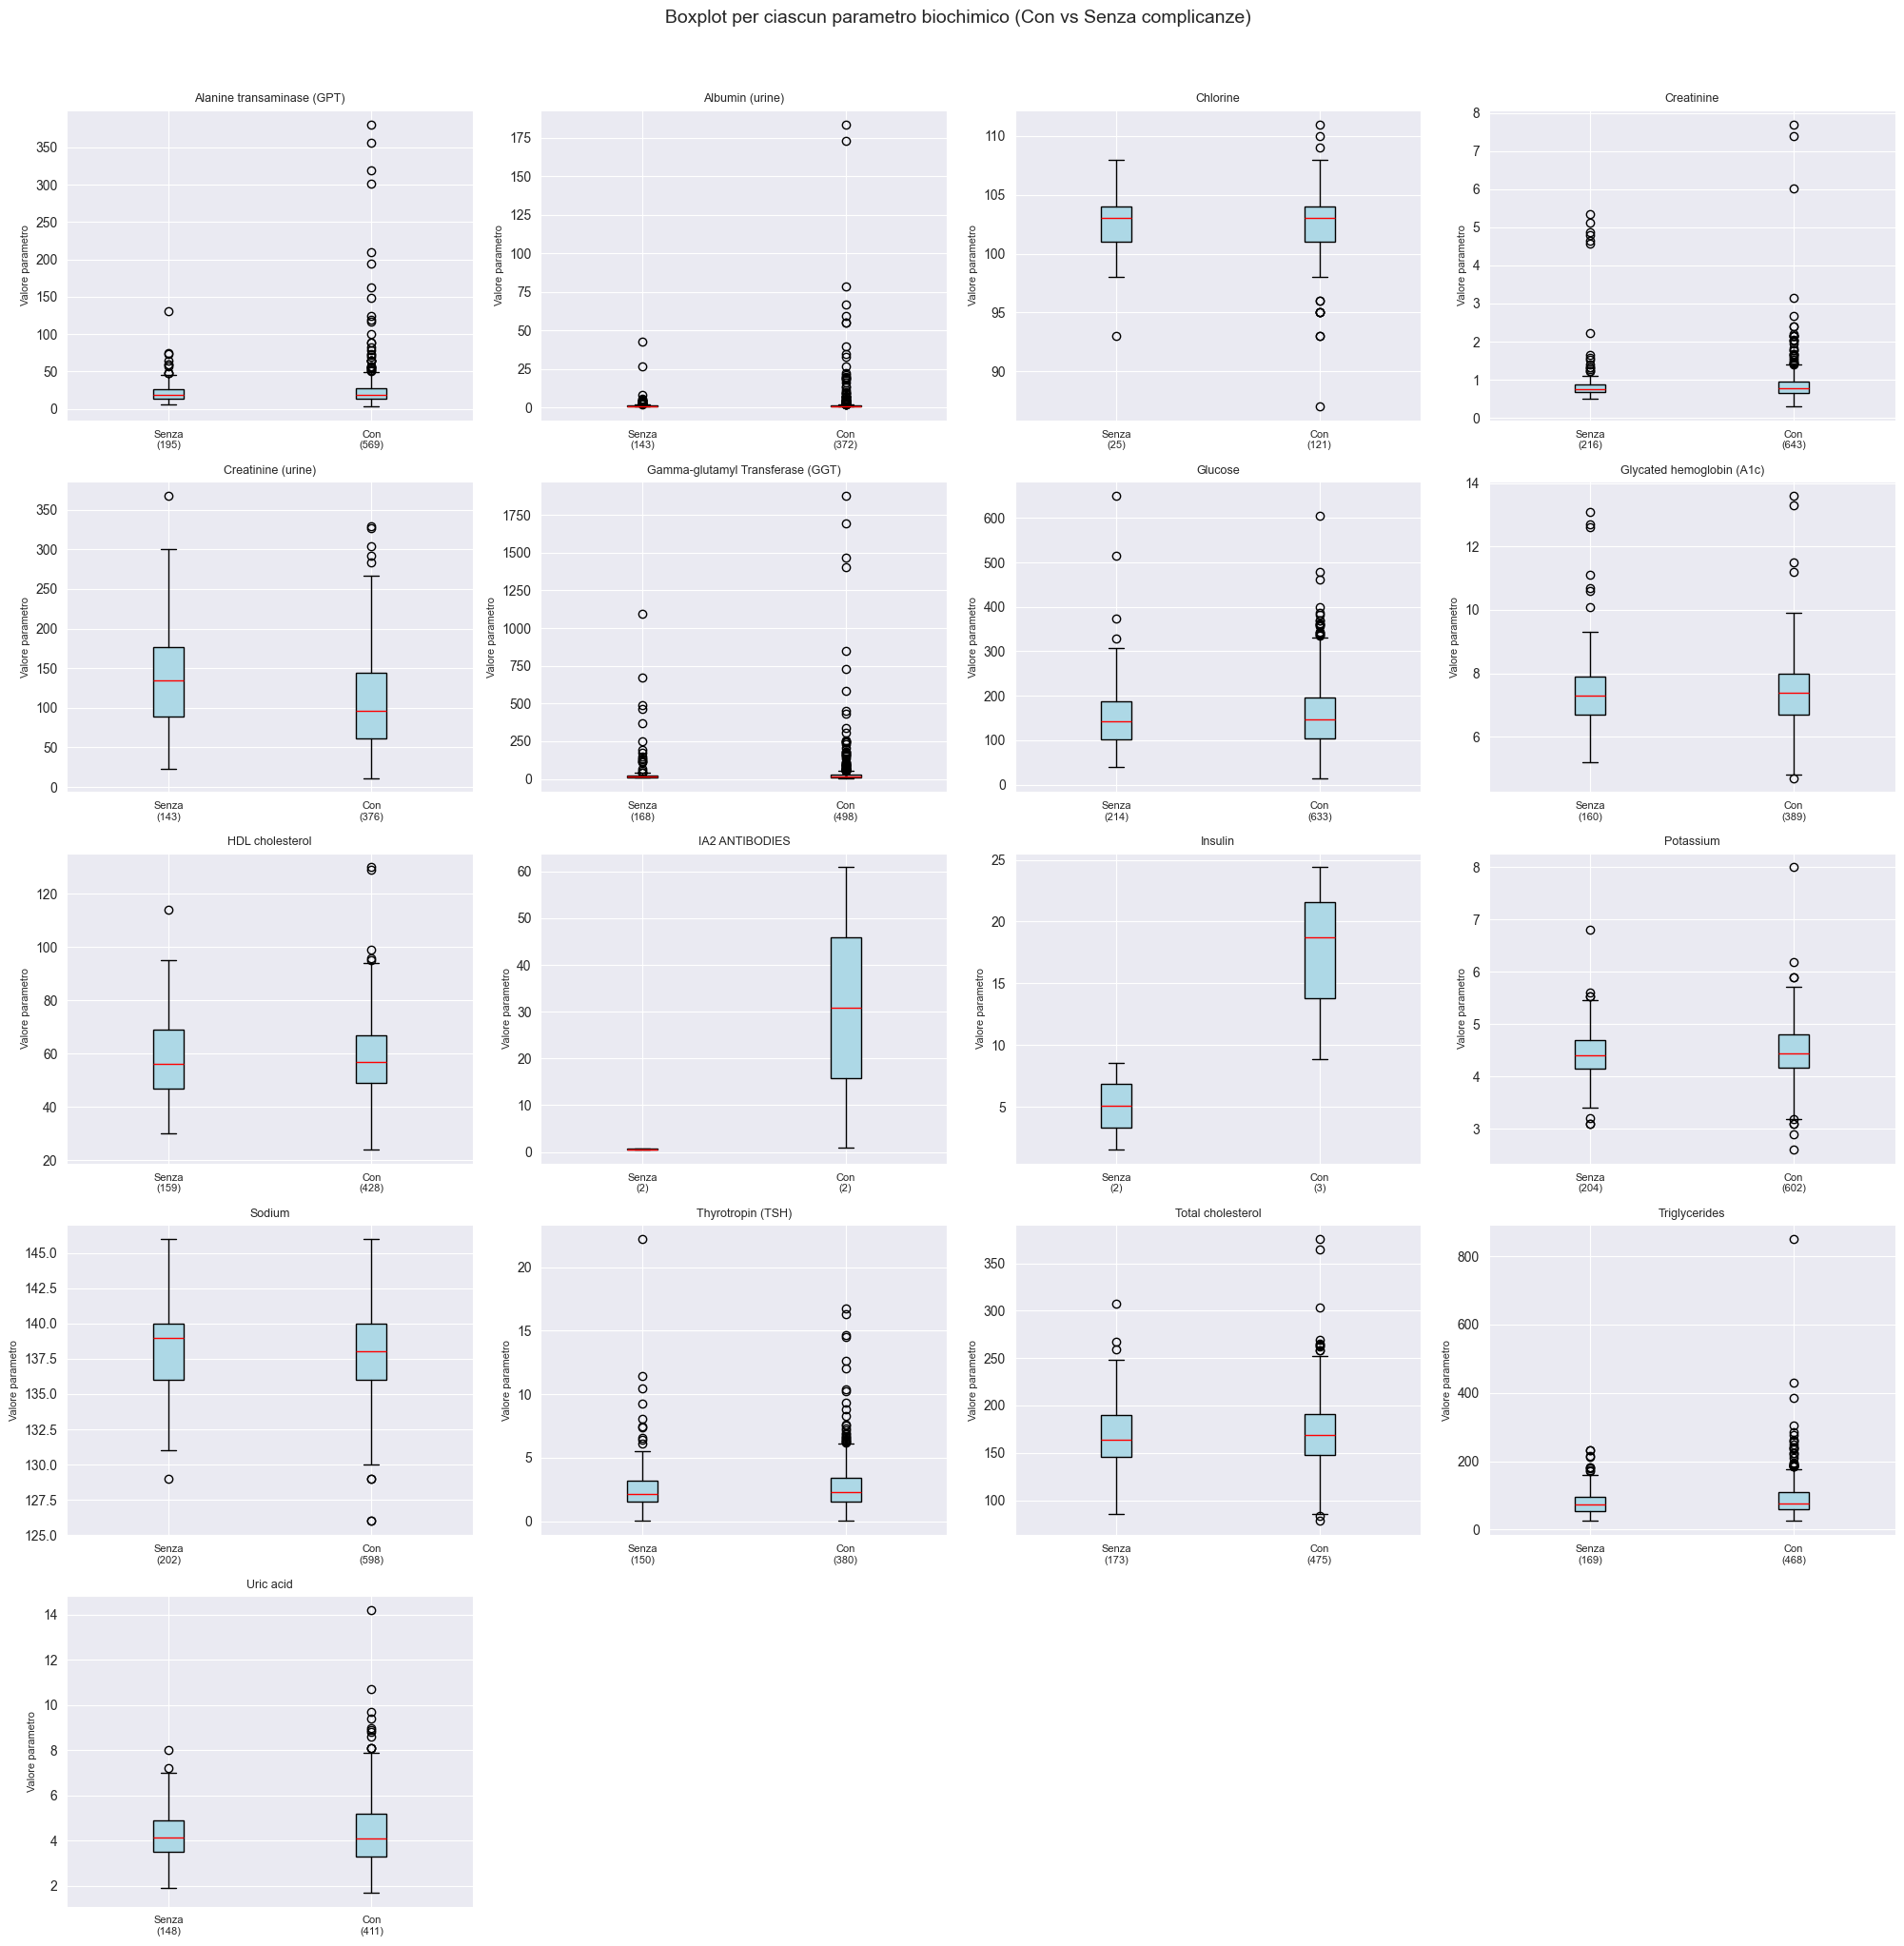

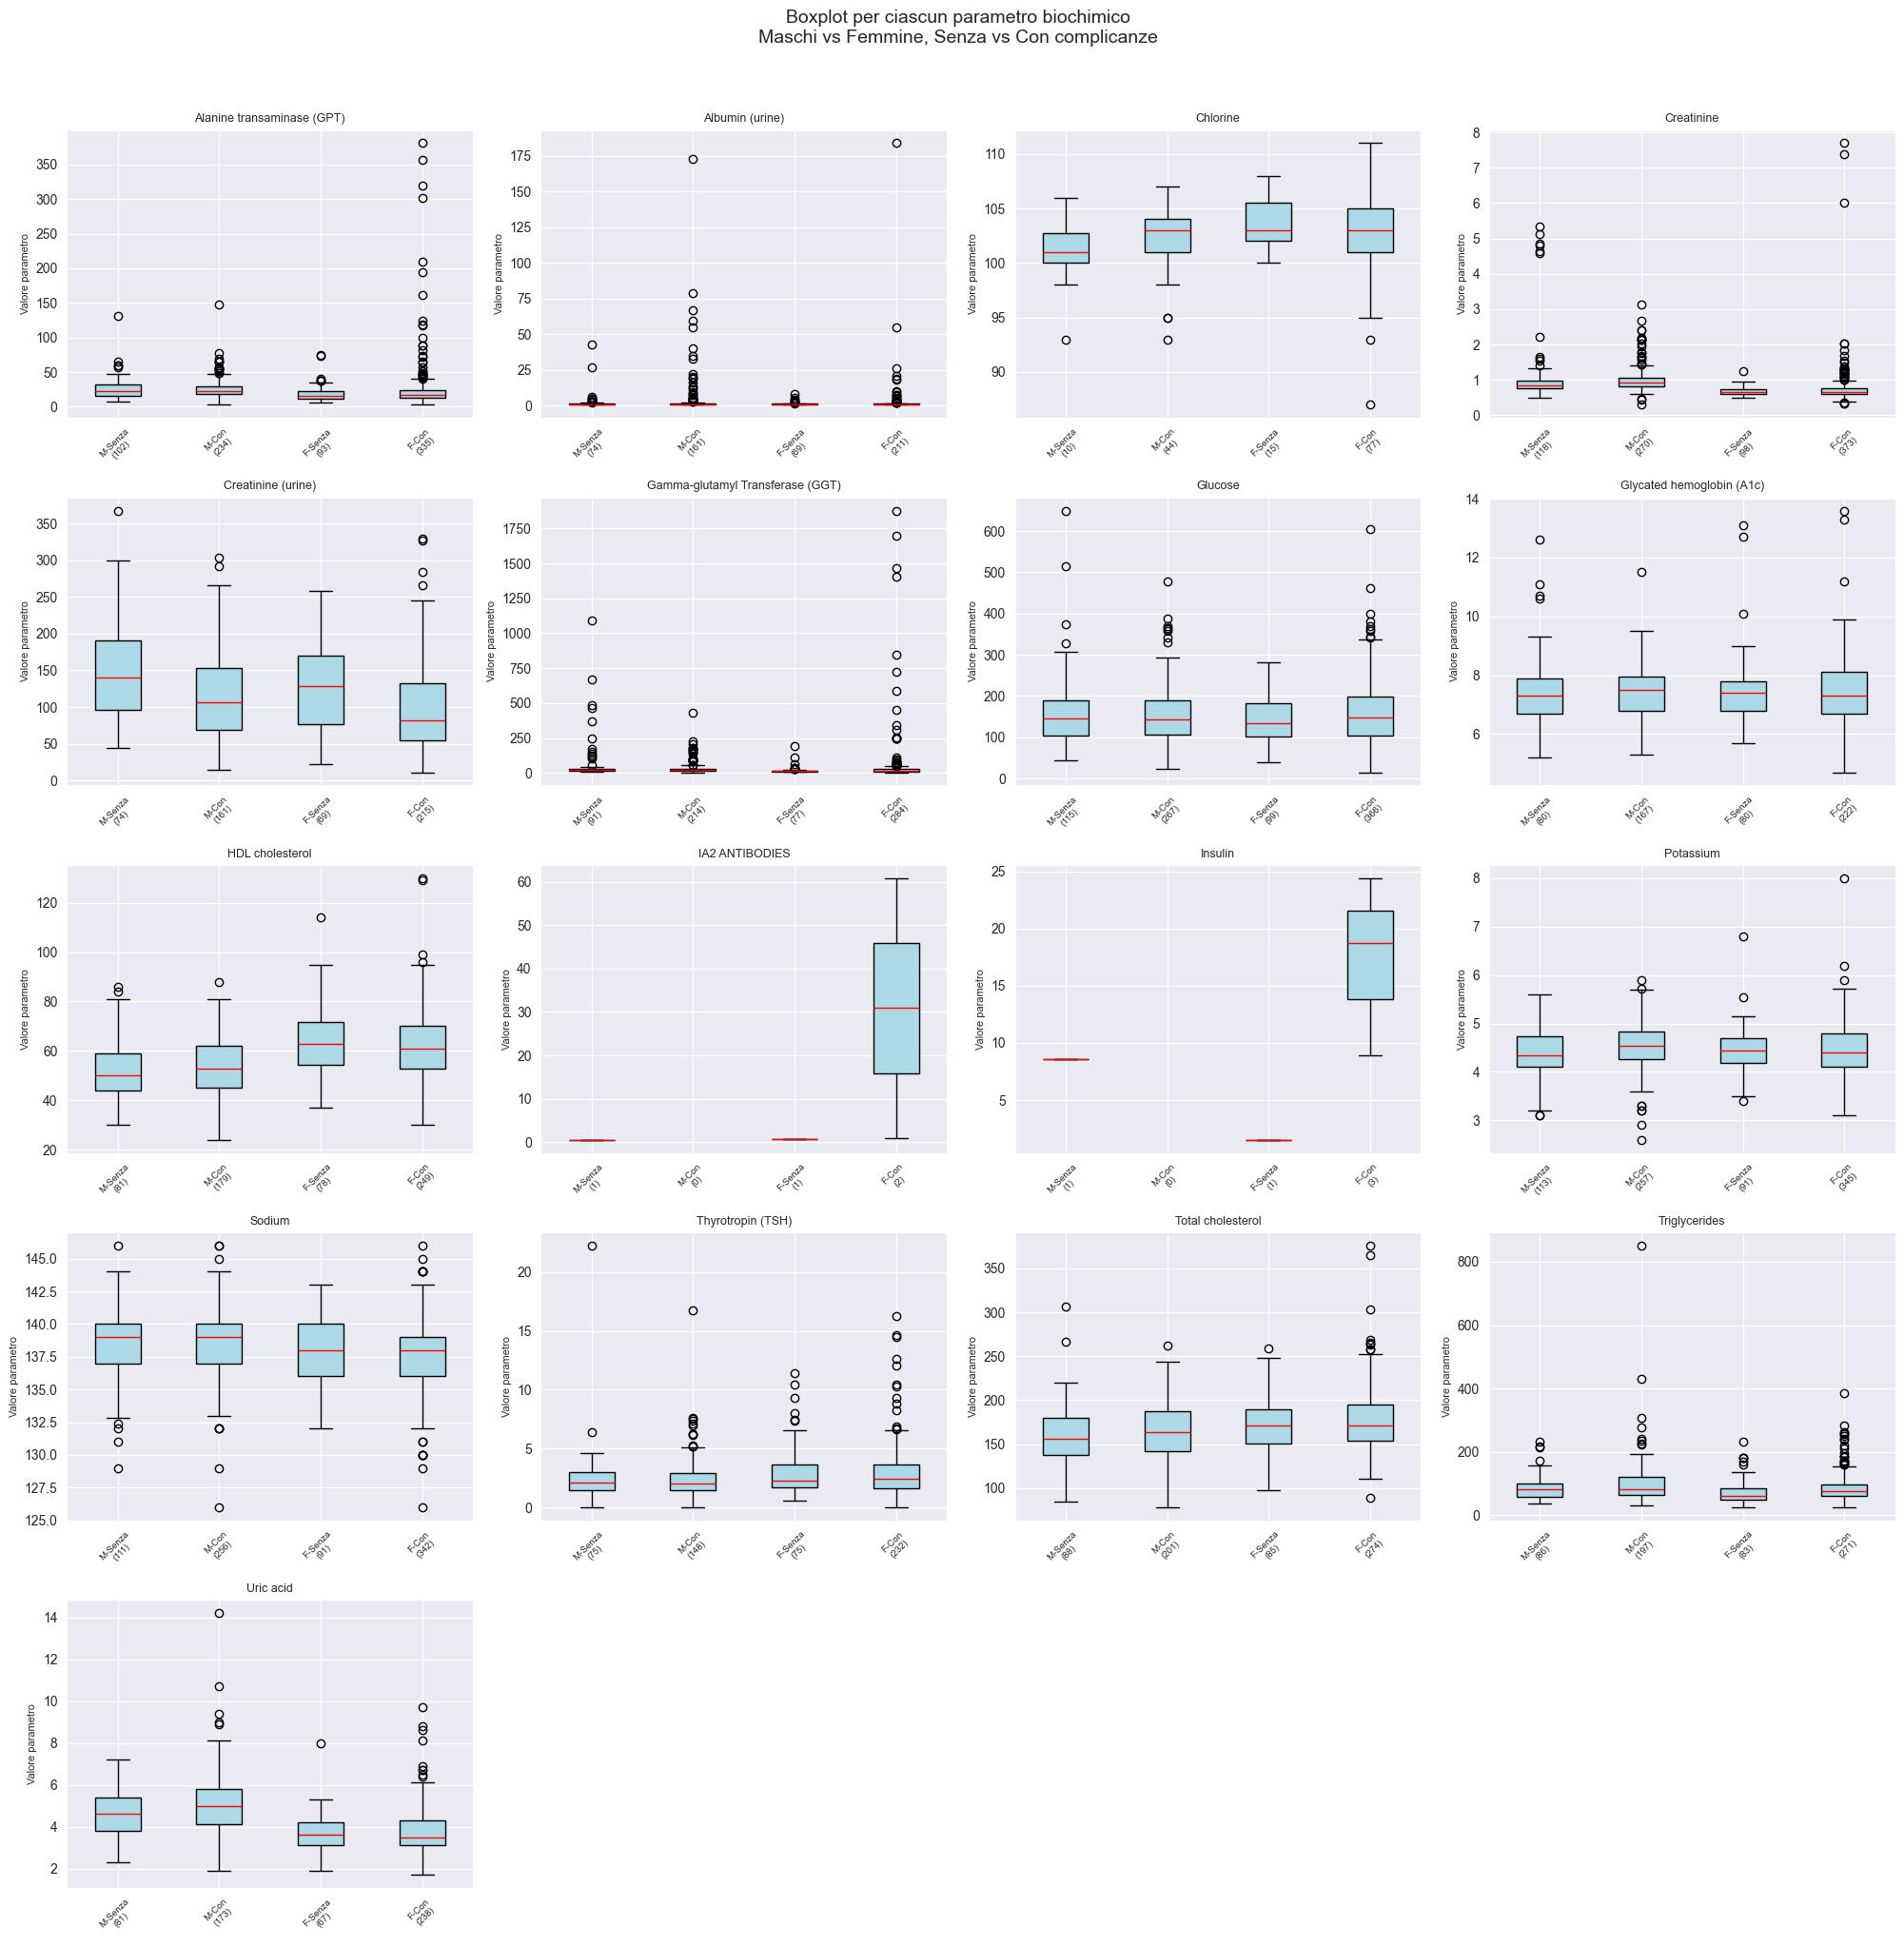

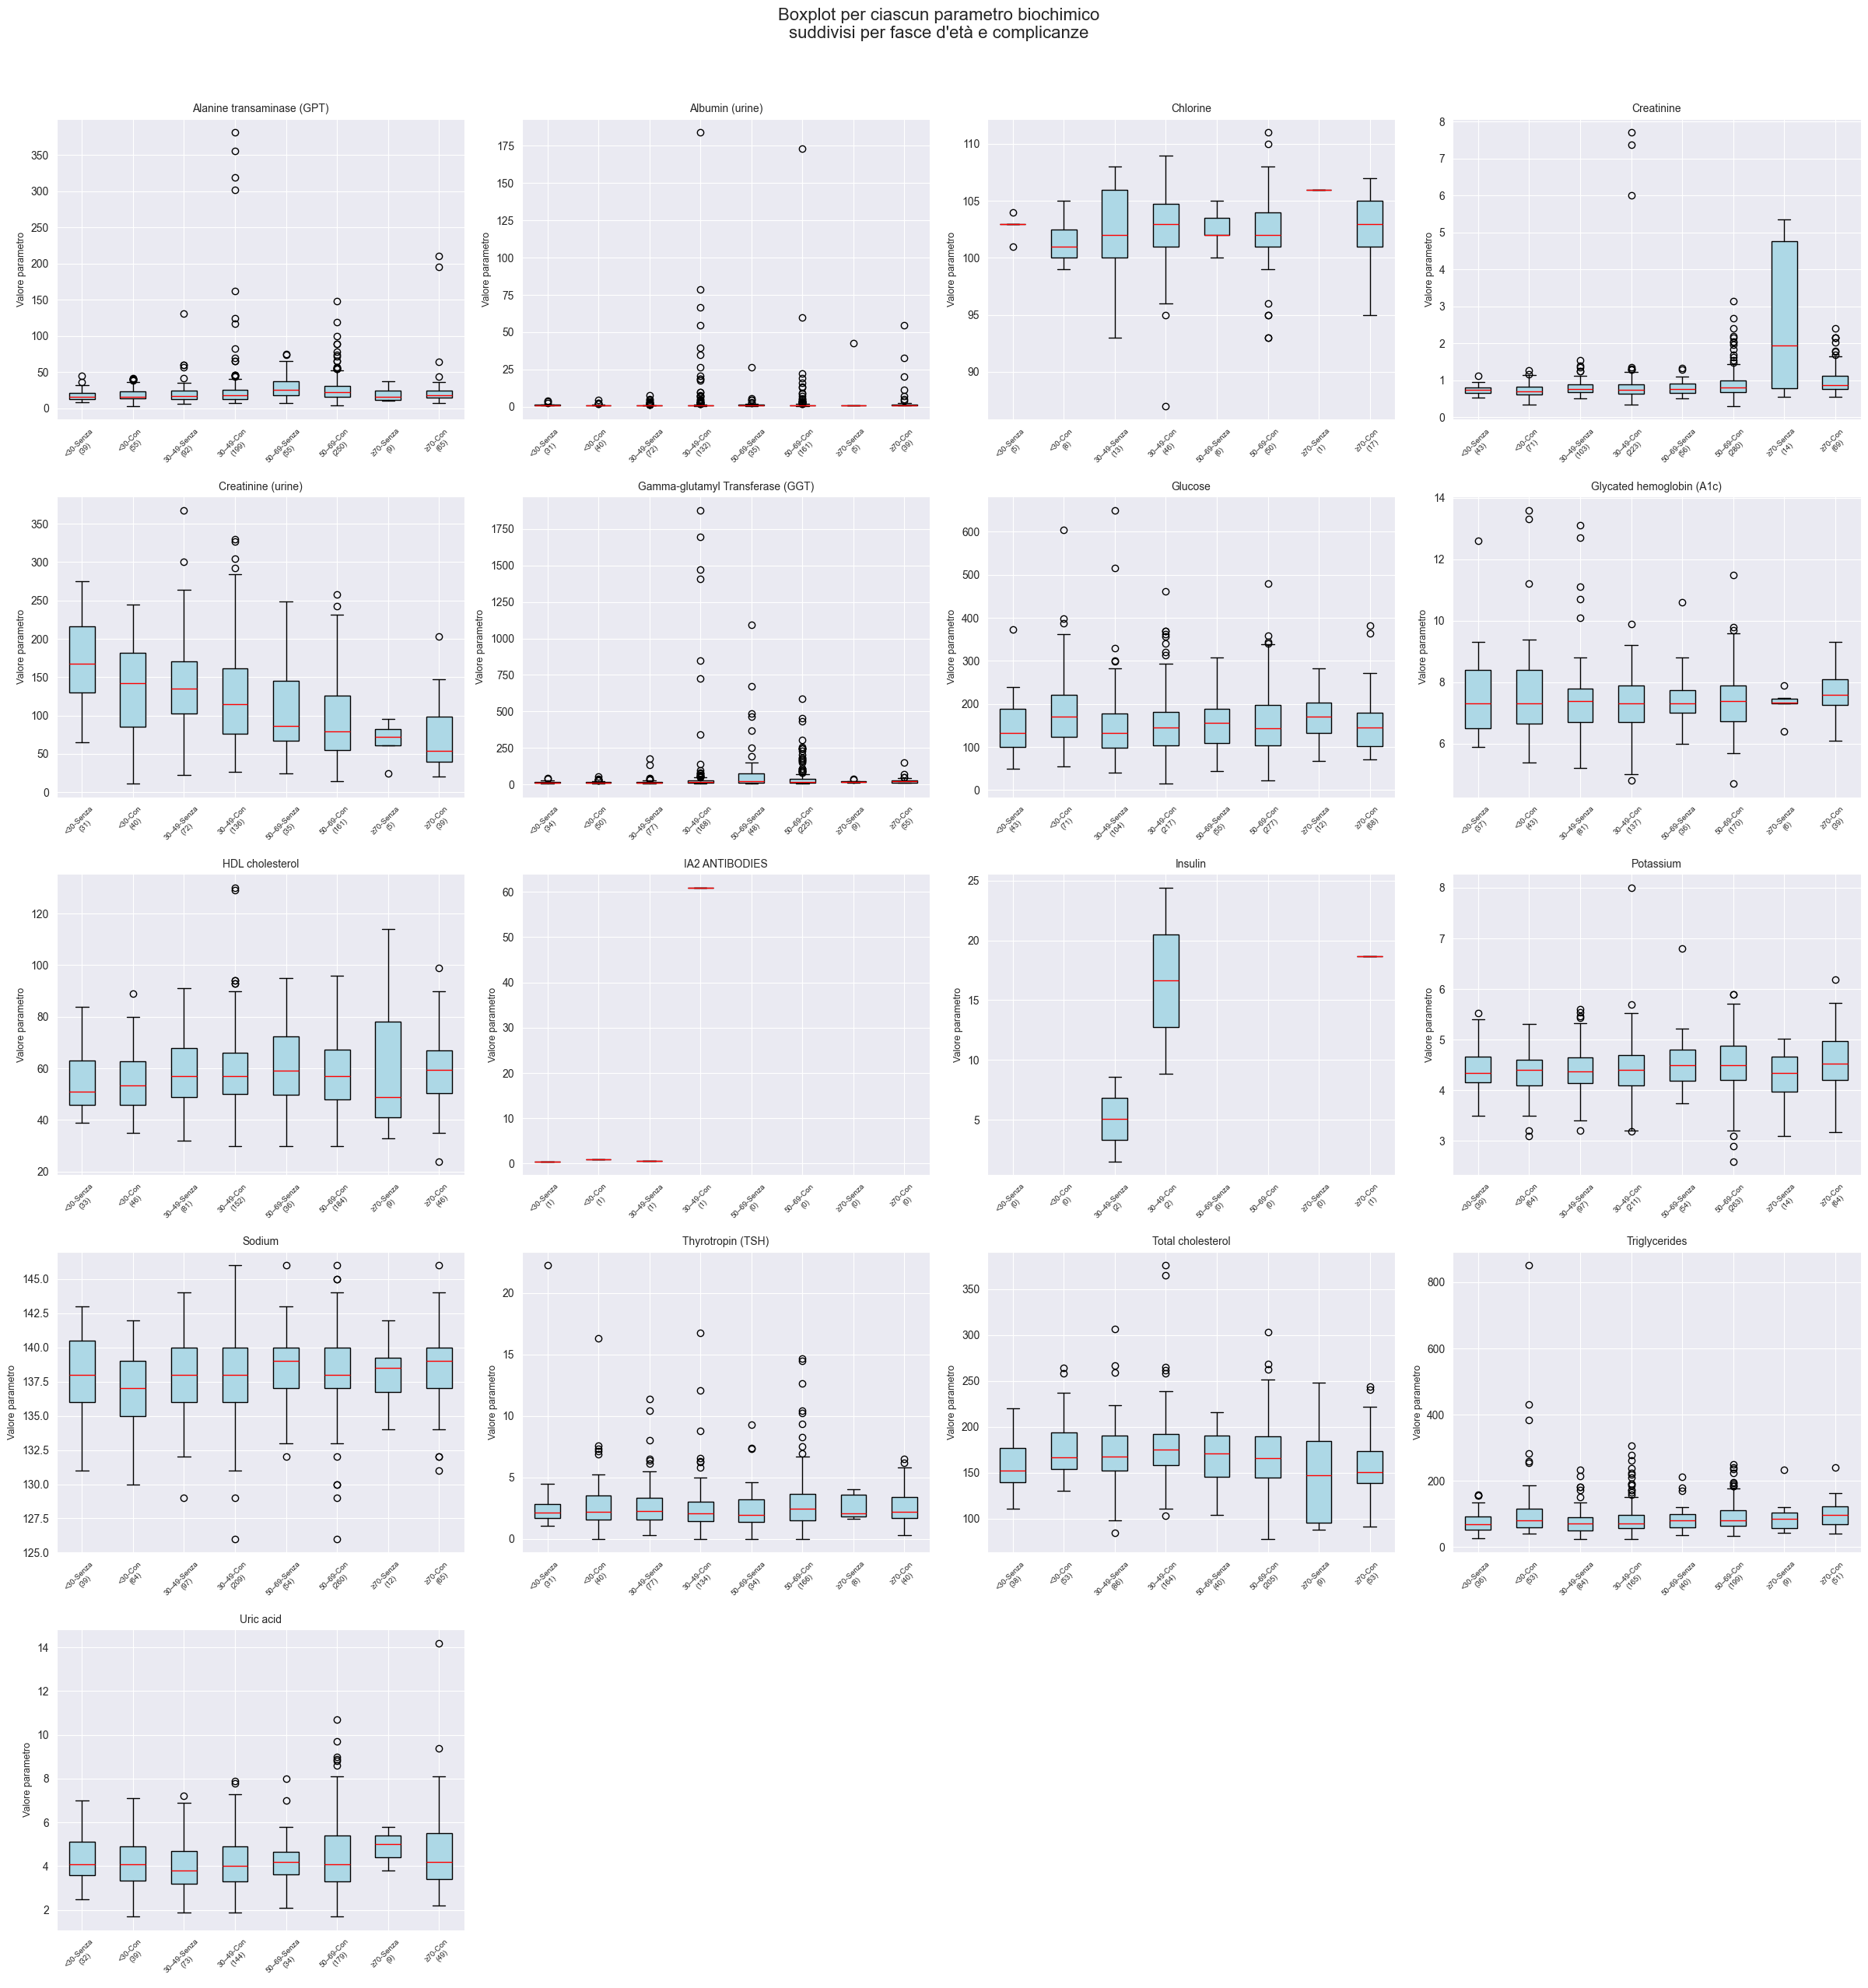

                       Parameter  Has_Diagnosis  count       mean        std   median       q25       q75      IQR
      Alanine transaminase (GPT)          False    195  22.220513  14.379524  18.0000  13.00000  26.00000 13.00000
      Alanine transaminase (GPT)           True    569  26.498770  32.997890  19.0000  14.00000  28.00000 14.00000
                 Albumin (urine)          False    143   1.665664   4.208429   0.7000   0.70000   1.15000  0.45000
                 Albumin (urine)           True    372   3.850000  15.370969   0.7000   0.70000   1.16000  0.46000
                        Chlorine          False     25 102.480000   3.097311 103.0000 101.00000 104.00000  3.00000
                        Chlorine           True    121 102.371901   3.521676 103.0000 101.00000 104.00000  3.00000
                      Creatinine          False    216   0.907083   0.709125   0.7600   0.67000   0.89000  0.22000
                      Creatinine           True    643   0.866081   0.527797   0

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

#BOXPLOT - RELAZIONE TRA VALORI DELLE ANALISI FATTE E COMPLICANZE - ULTIMI 3 MESI
############################################################################################

df2 = pd.read_csv("Excel/glucose_bio_correlated.csv", parse_dates=["Reception_Date"])
diagnostics = pd.read_csv("Excel/Diagnostics.csv")

# --- FILTRO: ultimi 3 mesi dall'ultima analisi per ciascun paziente ---
last_dates = df2.groupby('Patient_ID')['Reception_Date'].transform('max')
threshold = last_dates - pd.DateOffset(months=3)
df2 = df2[df2['Reception_Date'] >= threshold]

df2["Has_Diagnosis"] = df2["Patient_ID"].isin(diagnostics["Patient_ID"])

# Parametri in ordine alfabetico
params = sorted(df2["Parameter"].unique())
n = len(params)

cols = 4
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, param in enumerate(params):
    sub = df2[df2["Parameter"] == param]
    no_diag = sub[~sub["Has_Diagnosis"]]["Parameter_Value"]
    yes_diag = sub[sub["Has_Diagnosis"]]["Parameter_Value"]
    data_to_plot = [no_diag, yes_diag]

    # conteggi
    counts = [len(no_diag), len(yes_diag)]
    tick_labels = [f"Senza\n({counts[0]})", f"Con\n({counts[1]})"]

    # qui uso labels= e non l'argomento posizionale
    bp = axes[i].boxplot(
        data_to_plot,
        tick_labels=tick_labels,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue'),
        medianprops=dict(color='red')
    )
    axes[i].set_title(param, fontsize=9)
    axes[i].set_ylabel("Valore parametro", fontsize=8)
    axes[i].tick_params(axis='x', labelsize=8)

# Nasconde eventuali assi vuoti
for ax in axes[n:]:
    ax.set_visible(False)

fig.suptitle(
    "Boxplot per ciascun parametro biochimico (Con vs Senza complicanze)",
    fontsize=14, y=1.02
)
fig.subplots_adjust(hspace=0.6, top=0.92)
plt.tight_layout()
plt.show()




#BOX PLOT SESSO
########################################
# 1) Leggi il file con le informazioni di sesso
patient_info = pd.read_csv("Excel/Patient_info.csv")  # contiene Patient_ID e Sex (M/F)

# 2) Fai il merge con df2
df2 = df2.merge(patient_info[['Patient_ID', 'Sex']], on='Patient_ID', how='left')

# 3) Mappa M/F in etichette italiane
df2['Sex_label'] = df2['Sex'].map({'M': 'Maschio', 'F': 'Femmina'})

# 4) Prepara parametri e dimensioni della griglia
params = sorted(df2["Parameter"].unique())  # ← ordinamento alfabetico
n = len(params)
cols = 4
rows = (n + cols - 1) // cols

# 5) Definisci l'ordine dei gruppi e le etichette
group_combinations = [
    ("Maschio", False),
    ("Maschio", True),
    ("Femmina", False),
    ("Femmina", True),
]

# 6) Crea la figura e gli assi
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

# 7) Per ciascun parametro, disegna il boxplot con 4 gruppi
for i, param in enumerate(params):
    sub = df2[df2["Parameter"] == param]
    # prepara i dati e i conteggi
    data_to_plot = []
    counts = []
    for sex, diag in group_combinations:
        vals = sub[(sub["Sex_label"] == sex) & (sub["Has_Diagnosis"] == diag)]["Parameter_Value"]
        data_to_plot.append(vals)
        counts.append(len(vals))
    # etichette con conteggio
    tick_labels = [
        f"M-Senza\n({counts[0]})",
        f"M-Con\n({counts[1]})",
        f"F-Senza\n({counts[2]})",
        f"F-Con\n({counts[3]})",
    ]

    axes[i].boxplot(
        data_to_plot,
        tick_labels=tick_labels,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue'),
        medianprops=dict(color='red')
    )
    axes[i].set_title(param, fontsize=9)
    axes[i].set_ylabel("Valore parametro", fontsize=8)
    # Ruota le etichette se servono
    axes[i].tick_params(axis='x', rotation=45, labelsize=7)

# 8) Nascondi eventuali assi vuoti
for ax in axes[n:]:
    ax.set_visible(False)

# 9) Titolo e spacing verticale
fig.suptitle(
    "Boxplot per ciascun parametro biochimico\nMaschi vs Femmine, Senza vs Con complicanze",
    fontsize=14, y=1.02
)
fig.subplots_adjust(hspace=0.8, top=0.92)

# 10) Mostra
plt.tight_layout()
plt.show()


#BOX PLOT ETA
########################################
# --- 1) Calcola l'età al 2025 basandoti sul Birth_year ---
current_year = 2025
patient_info['Age'] = current_year - patient_info['Birth_year']

# --- 2) Definisci le fasce d'età ---
bins = [0, 30, 50, 70, 120]
labels = ['<30', '30–49', '50–69', '≥70']
patient_info['Age_group'] = pd.cut(
    patient_info['Age'],
    bins=bins,
    labels=labels,
    right=False
)

# --- 3) Associa le fasce d'età a df2 (merge se non già fatto) ---
df2 = df2.merge(
    patient_info[['Patient_ID', 'Age_group']],
    on='Patient_ID',
    how='left'
)

# --- 4) Prepara parametri e dimensioni della griglia ---
params = sorted(df2["Parameter"].unique())  # ← ordinamento alfabetico
n = len(params)
cols = 4
rows = (n + cols - 1) // cols

# --- 5) Prepara le combinazioni Age × Diagnosi e le relative etichette ---
group_combinations = [
    (age, diag)
    for age in labels
    for diag in [False, True]
]

# 6) Crea la figura e gli assi
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
axes = axes.flatten()

# --- 7) Disegna il boxplot per ciascun parametro e ciascuna combinazione ---
for i, param in enumerate(params):
    sub = df2[df2["Parameter"] == param]
    # prepara i dati e i conteggi
    data_to_plot = []
    counts = []
    for age_group, diag in group_combinations:
        vals = sub[
            (sub["Age_group"] == age_group) &
            (sub["Has_Diagnosis"] == diag)
        ]["Parameter_Value"]
        data_to_plot.append(vals)
        counts.append(len(vals))

    # etichette con conteggio
    tick_labels = [
        f"{age_group}-{'Con' if diag else 'Senza'}\n({cnt})"
        for (age_group, diag), cnt in zip(group_combinations, counts)
    ]

    axes[i].boxplot(
        data_to_plot,
        tick_labels=tick_labels,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue'),
        medianprops=dict(color='red')
    )
    axes[i].set_title(param, fontsize=10)
    axes[i].set_ylabel("Valore parametro", fontsize=9)
    axes[i].tick_params(axis='x', rotation=45, labelsize=7)

# --- 8) Nascondi eventuali assi vuoti ---
for ax in axes[n:]:
    ax.set_visible(False)

# --- 9) Titolo e layout ---
fig.suptitle(
    "Boxplot per ciascun parametro biochimico\n"
    "suddivisi per fasce d'età e complicanze",
    fontsize=16, y=1.02
)
fig.subplots_adjust(hspace=0.8, top=0.92)
plt.tight_layout()

# --- 10) Mostra la figura ---
plt.show()


def compute_stats(df, group_cols):
    """
    Restituisce un DataFrame con, per ogni gruppo:
      - count
      - mean
      - std
      - median
      - q25 (25° percentile)
      - q75 (75° percentile)
      - IQR (q75 - q25)
    """
    # Raggruppa e calcola tutte le statistiche in un colpo solo
    agg = df.groupby(group_cols, observed=True)["Parameter_Value"].agg(
        count   = "count",
        mean    = "mean",
        std     = "std",
        median  = "median",
        q25     = lambda x: x.quantile(0.25),
        q75     = lambda x: x.quantile(0.75),
    )

    # Calcola l'IQR
    agg["IQR"] = agg["q75"] - agg["q25"]

    # Porta indici di gruppo in colonne
    return agg.reset_index()

# 1) Statistiche per COMPLESSIVO, Parameter × Has_Diagnosis
stats_overall_diag = compute_stats(df2, ["Parameter", "Has_Diagnosis"])
print(stats_overall_diag.to_string(index=False))

# 2) COMPLESSIVO, Parameter × Sex_label × Has_Diagnosis
stats_overall_sex  = compute_stats(df2, ["Parameter", "Sex_label", "Has_Diagnosis"])
print(stats_overall_sex.to_string(index=False))

# 3) COMPLESSIVO, Parameter × Age_group × Has_Diagnosis
stats_overall_age  = compute_stats(df2, ["Parameter", "Age_group", "Has_Diagnosis"])
print(stats_overall_age.to_string(index=False))

# 4) Sotto‐insieme “ultimi 3 mesi”
cutoff     = pd.Timestamp.today() - pd.Timedelta(days=90)
df_recent  = df2[df2["Reception_Date"] >= cutoff]

# 5) Stesse statistiche su RECENTI
stats_recent_diag = compute_stats(df_recent, ["Parameter", "Has_Diagnosis"])
stats_recent_sex  = compute_stats(df_recent, ["Parameter", "Sex_label", "Has_Diagnosis"])
stats_recent_age  = compute_stats(df_recent, ["Parameter", "Age_group", "Has_Diagnosis"])

# 6) Delta percentuali (esempio per mediana)
merge = stats_overall_diag.merge(
    stats_recent_diag,
    on=["Parameter", "Has_Diagnosis"],
    suffixes=("_all", "_3m")
)
merge["delta_mediana_%"] = 100 * (merge["median_3m"] - merge["median_all"]) / merge["median_all"]
print(merge[["Parameter", "Has_Diagnosis", "delta_mediana_%"]])
############################################################################################